# DESCRIPTION

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data (including telco and transactional information) to predict their clients' repayment abilities.

Find more about this project here : https://www.kaggle.com/c/home-credit-default-risk/

# DATA PRESENTATION

In [1]:
# IMPORTATION DES LIBRAIRIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
data_path = "D://TRAININGS//CREDIT_RISK_ANALYSIS//DATA//"

application_data = pd.read_csv(data_path+'application_train.csv')
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [3]:
application_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

# RESUME DE LA TABLE

La table **application_data** est la table principale qui contient tous les crédits collectés. Chaque ligne est idéntifiée par la colonne **(SKR_ID_CURR)**, qui est l'identifiant d'un crédit. <br><br>
La table **application_data** contient **307511** lignes et **122** colonnes, soit **307511** crédits enregistrés.
La colonne **TARGET** étant la colonne cible, un crédit comporte **121** caractéristiques différentes.

## Remarque

En excluant la variable SK_ID_CURR qui est l'identifiant unique d'un crédit, la table application_data_X comprend : <br>
- **16** variables qualitatives <br>
- **104** variables quantitatives, dont **39** discrètes et **65** continues

### Recherche de doublons

In [4]:
application_data_duplicates = application_data.loc[np.where(application_data.duplicated().to_numpy()==True)]
application_data_duplicates

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

[0 rows x 122 columns]

**Conclusion** Il n'y a pas de doublons dans la table application_data

# ANALYSES DESCRIPTIVES

### La variable cible : TARGET
**TARGET** est une variable binaire qui vaut : <br>
- 1 si le client présente un défaut de paiement : des retards de paiement ont été observés sur plus de X jours sur au moins une échéance 
- 0 dans le cas contraire

In [5]:
# On vérifie s'il y a des données manquantes dans la colonne TARGET
application_data['TARGET'].isnull()[application_data['TARGET'].isnull() != False]

Series([], Name: TARGET, dtype: bool)

**Conclusion :** Il n'y a pas de données manquante dans la colonne TARGET

In [6]:
application_data['TARGET'] = application_data['TARGET'].astype("str")
application_data['TARGET'].dtype

dtype('O')

In [7]:
pd.crosstab(application_data['TARGET'], "TARGET")

col_0   TARGET
TARGET        
0       282686
1        24825

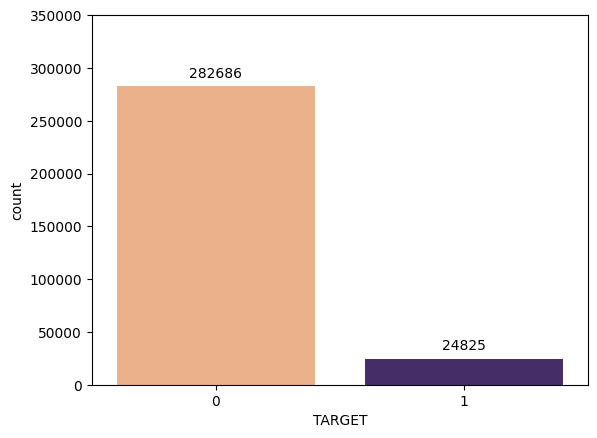

In [8]:
ax = sns.countplot(application_data, x="TARGET", hue = "TARGET", order = ["0", "1"], palette=['#432371',"#FAAE7B"])
ax.set_ylim(0, 350000)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()

On a 24825 dossiers de crédit en défaut contre 282686 dossiers de crédit sains, ce qui représente un taux de défaut de **8.78%**

# Etude de variables qualitatives

In [9]:
quali = application_data.select_dtypes(include=['object'])
quali

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0           1         Cash loans           M            N               Y   
1           0         Cash loans           F            N               N   
2           0    Revolving loans           M            Y               Y   
3           0         Cash loans           F            N               Y   
4           0         Cash loans           M            N               Y   
...       ...                ...         ...          ...             ...   
307506      0         Cash loans           M            N               N   
307507      0         Cash loans           F            N               Y   
307508      0         Cash loans           F            N               Y   
307509      1         Cash loans           F            N               Y   
307510      0         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government                NaN   
3                       WEDNESDAY  Business Entity Type 3                NaN   
4                        THURSDAY                Religion                NaN   
...                           ...                     ...                ...   
307506                   THURSDAY                Services   reg oper account   
307507                     MONDAY                     XNA   reg oper account   
307508                   THURSDAY                  School   reg oper account   
307509                  WEDNESDAY  Business Entity Type 1                NaN   
307510                   THURSDAY  Business Entity Type 3                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2                  NaN                NaN                 NaN  
3                  NaN                NaN                 NaN  
4                  NaN                NaN      

In [10]:
qual_var_df = quali.drop("TARGET", axis = 1)
qual_var_df

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
0                       WEDNESDAY  Business Entity Type 3   reg oper account   
1                          MONDAY                  School   reg oper account   
2                          MONDAY              Government                NaN   
3                       WEDNESDAY  Business Entity Type 3                NaN   
4                        THURSDAY                Religion                NaN   
...                           ...                     ...                ...   
307506                   THURSDAY                Services   reg oper account   
307507                     MONDAY                     XNA   reg oper account   
307508                   THURSDAY                  School   reg oper account   
307509                  WEDNESDAY  Business Entity Type 1                NaN   
307510                   THURSDAY  Business Entity Type 3                NaN   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
0       block of flats       Stone, brick                  No  
1       block of flats              Block                  No  
2                  NaN                NaN                 NaN  
3                  NaN                NaN                 NaN  
4                  NaN                NaN                 NaN  
...                ...                ...                 ...  
307

In [11]:
qual_var_df.describe(include = "all")

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [12]:
for col in qual_var_df.columns: 
    print(f"Number of nan values in {col} = {int(qual_var_df[col].isna().sum())}")

Number of nan values in NAME_CONTRACT_TYPE = 0
Number of nan values in CODE_GENDER = 0
Number of nan values in FLAG_OWN_CAR = 0
Number of nan values in FLAG_OWN_REALTY = 0
Number of nan values in NAME_TYPE_SUITE = 1292
Number of nan values in NAME_INCOME_TYPE = 0
Number of nan values in NAME_EDUCATION_TYPE = 0
Number of nan values in NAME_FAMILY_STATUS = 0
Number of nan values in NAME_HOUSING_TYPE = 0
Number of nan values in OCCUPATION_TYPE = 96391
Number of nan values in WEEKDAY_APPR_PROCESS_START = 0
Number of nan values in ORGANIZATION_TYPE = 0
Number of nan values in FONDKAPREMONT_MODE = 210295
Number of nan values in HOUSETYPE_MODE = 154297
Number of nan values in WALLSMATERIAL_MODE = 156341
Number of nan values in EMERGENCYSTATE_MODE = 145755


Les colonnes **NAME_TYPE_SUITE, OCCUPATION_TYPE, FONDKAPREMONT_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE** comportent des valeurs manquantes

### Analyse des variables entièrement renseignées

****************************************************VARIABLE NAME_CONTRACT_TYPE****************************************************
  NAME_CONTRACT_TYPE   count   percent
0         Cash loans  278232  0.904787
1    Revolving loans   29279  0.095213


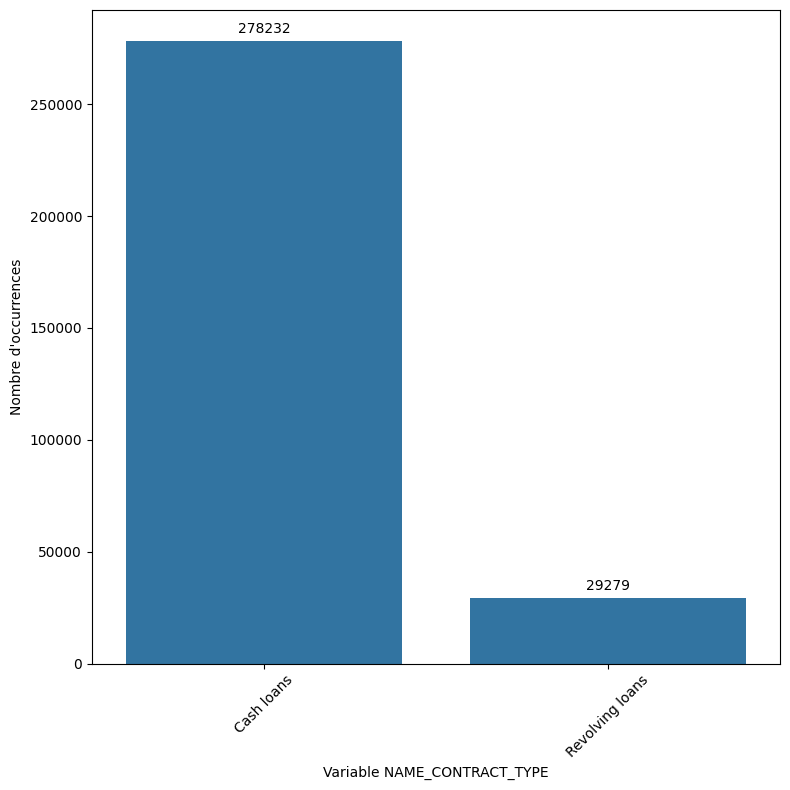

Le mode de cette variable est Cash loans



****************************************************VARIABLE CODE_GENDER****************************************************
  CODE_GENDER   count   percent
0           F  202448  0.658344
1           M  105059  0.341643
2         XNA       4  0.000013


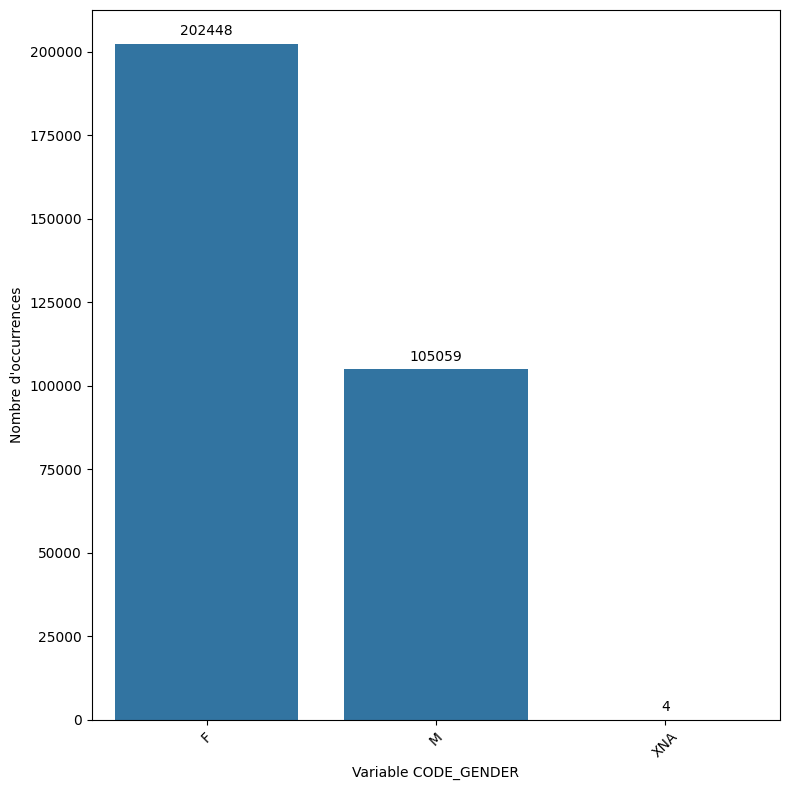

Le mode de cette variable est F



****************************************************VARIABLE FLAG_OWN_CAR****************************************************
  FLAG_OWN_CAR   count   percent
0            N  202924  0.659892
1            Y  104587  0.340108


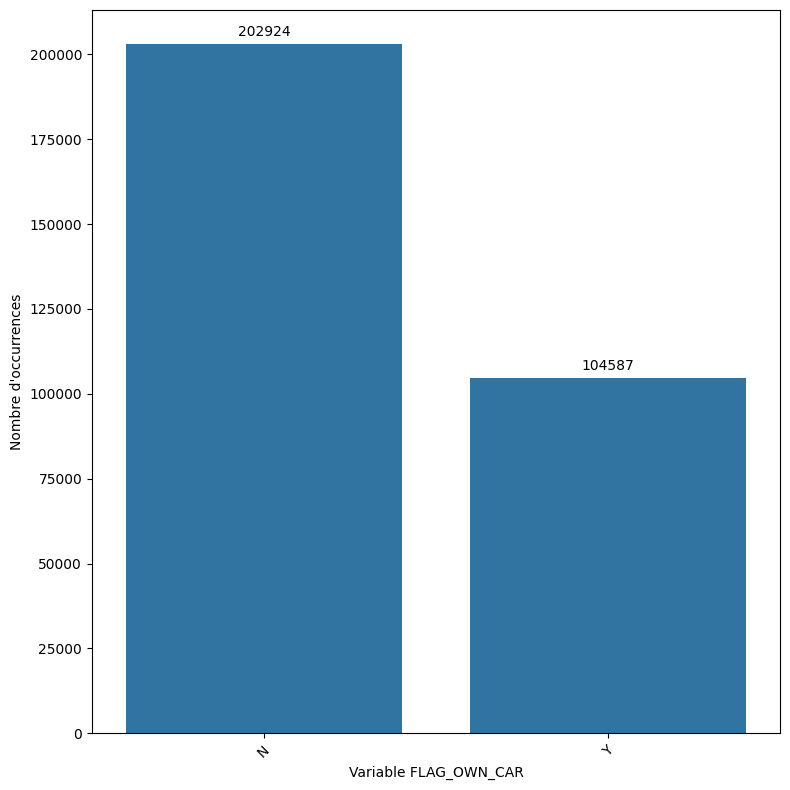

Le mode de cette variable est N



****************************************************VARIABLE FLAG_OWN_REALTY****************************************************
  FLAG_OWN_REALTY   count   percent
0               Y  213312  0.693673
1               N   94199  0.306327


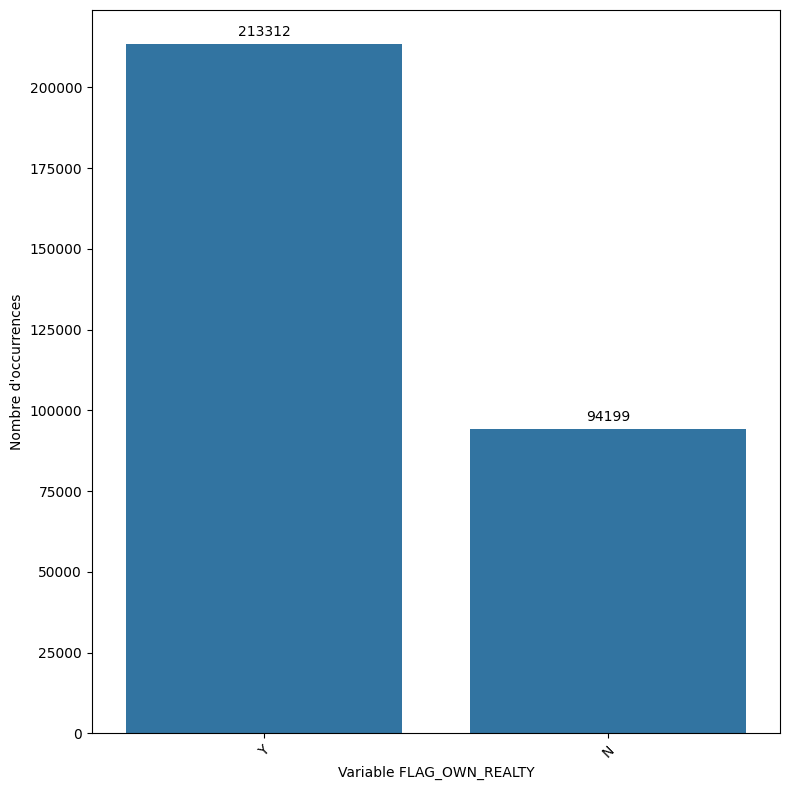

Le mode de cette variable est Y



****************************************************VARIABLE NAME_TYPE_SUITE****************************************************
   NAME_TYPE_SUITE   count   percent
0    Unaccompanied  248526  0.808186
1           Family   40149  0.130561
2  Spouse, partner   11370  0.036974
3         Children    3267  0.010624
4          Other_B    1770  0.005756
5       Not_filled    1292  0.004201
6          Other_A     866  0.002816
7  Group of people     271  0.000881


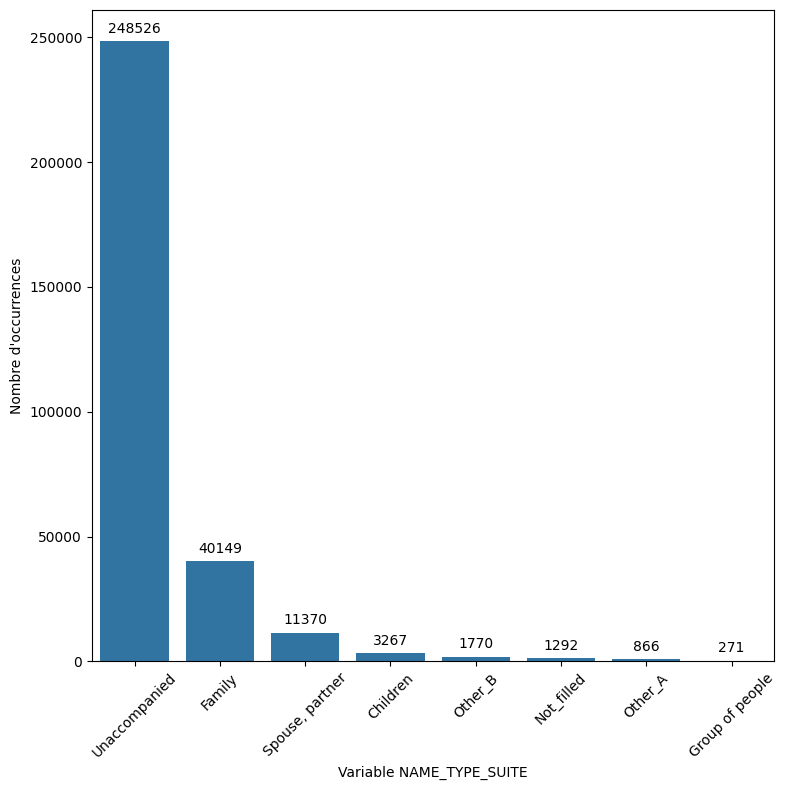

Le mode de cette variable est Unaccompanied



****************************************************VARIABLE NAME_INCOME_TYPE****************************************************
       NAME_INCOME_TYPE   count   percent
0               Working  158774   0.51632
1  Commercial associate   71617  0.232892
2             Pensioner   55362  0.180033
3         State servant   21703  0.070576
4            Unemployed      22  0.000072
5               Student      18  0.000059
6           Businessman      10  0.000033
7       Maternity leave       5  0.000016


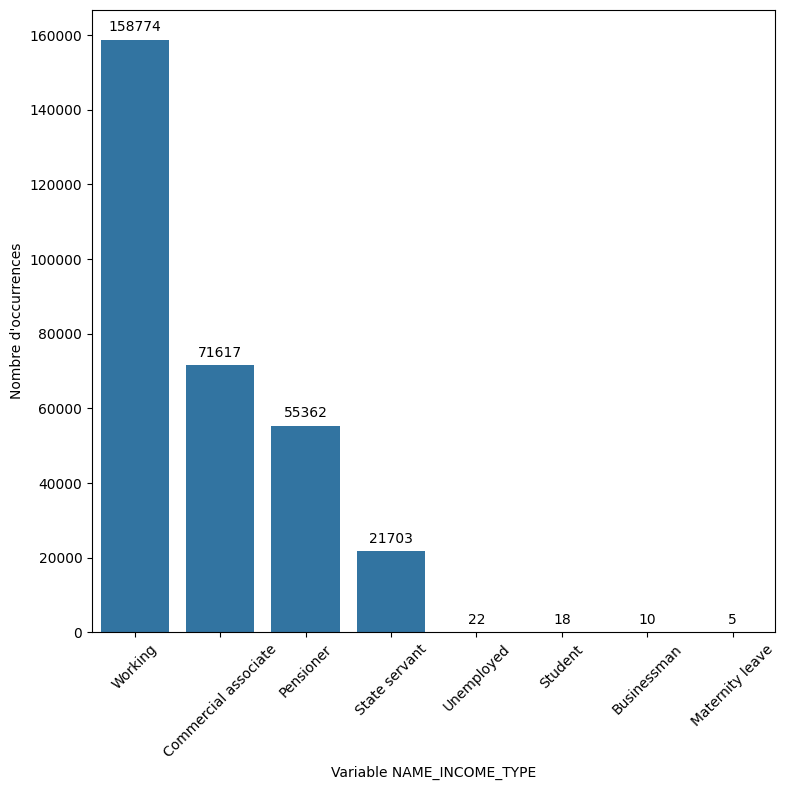

Le mode de cette variable est Working



****************************************************VARIABLE NAME_EDUCATION_TYPE****************************************************
             NAME_EDUCATION_TYPE   count   percent
0  Secondary / secondary special  218391  0.710189
1               Higher education   74863  0.243448
2              Incomplete higher   10277   0.03342
3                Lower secondary    3816  0.012409
4                Academic degree     164  0.000533


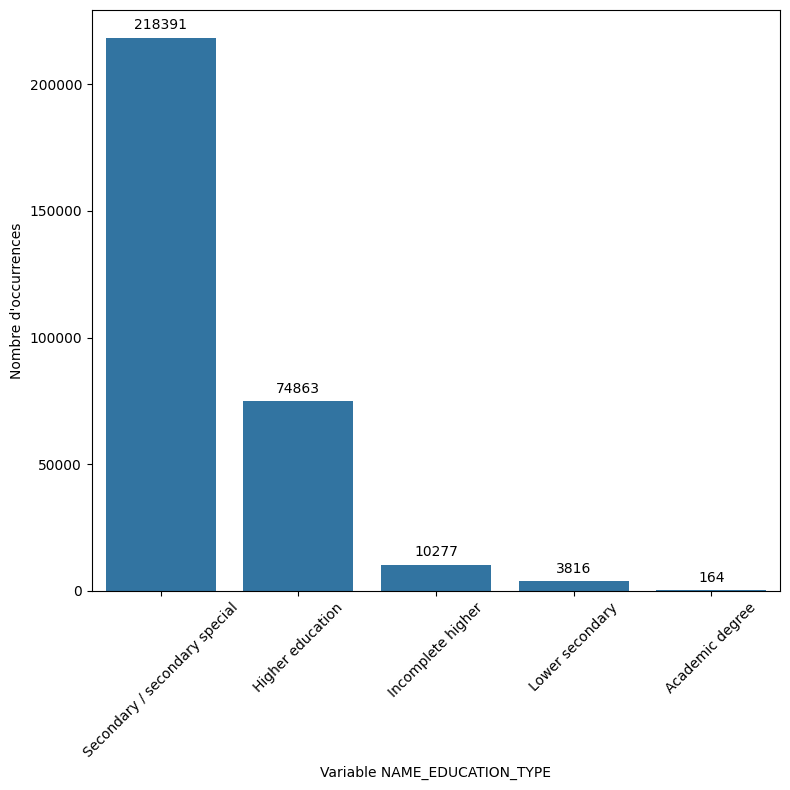

Le mode de cette variable est Secondary / secondary special



****************************************************VARIABLE NAME_FAMILY_STATUS****************************************************
     NAME_FAMILY_STATUS   count   percent
0               Married  196432   0.63878
1  Single / not married   45444   0.14778
2        Civil marriage   29775  0.096826
3             Separated   19770   0.06429
4                 Widow   16088  0.052317
5               Unknown       2  0.000007


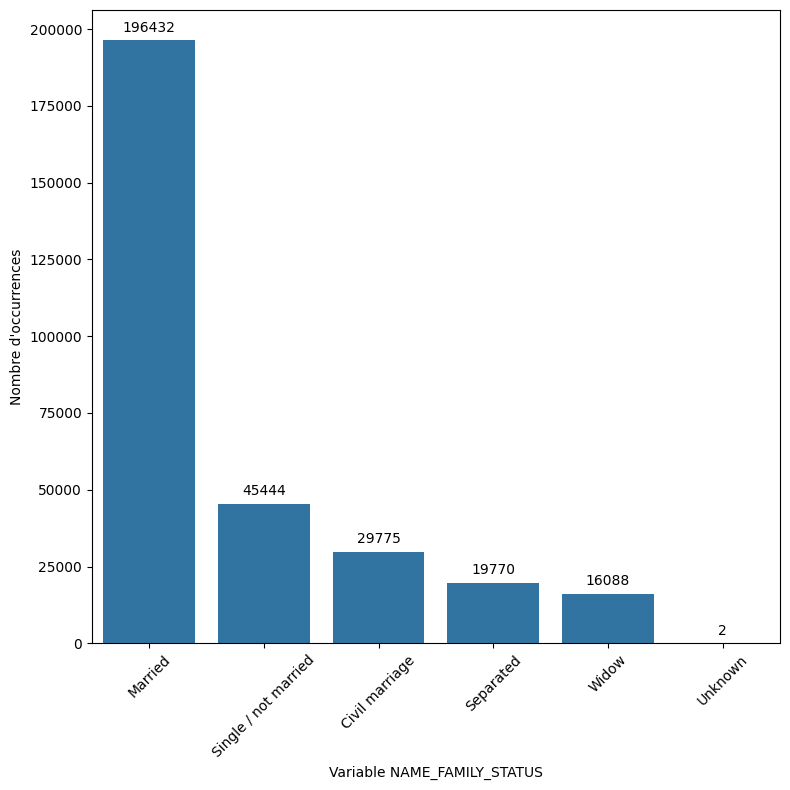

Le mode de cette variable est Married



****************************************************VARIABLE NAME_HOUSING_TYPE****************************************************
     NAME_HOUSING_TYPE   count   percent
0    House / apartment  272868  0.887344
1         With parents   14840  0.048258
2  Municipal apartment   11183  0.036366
3     Rented apartment    4881  0.015873
4     Office apartment    2617   0.00851
5      Co-op apartment    1122  0.003649


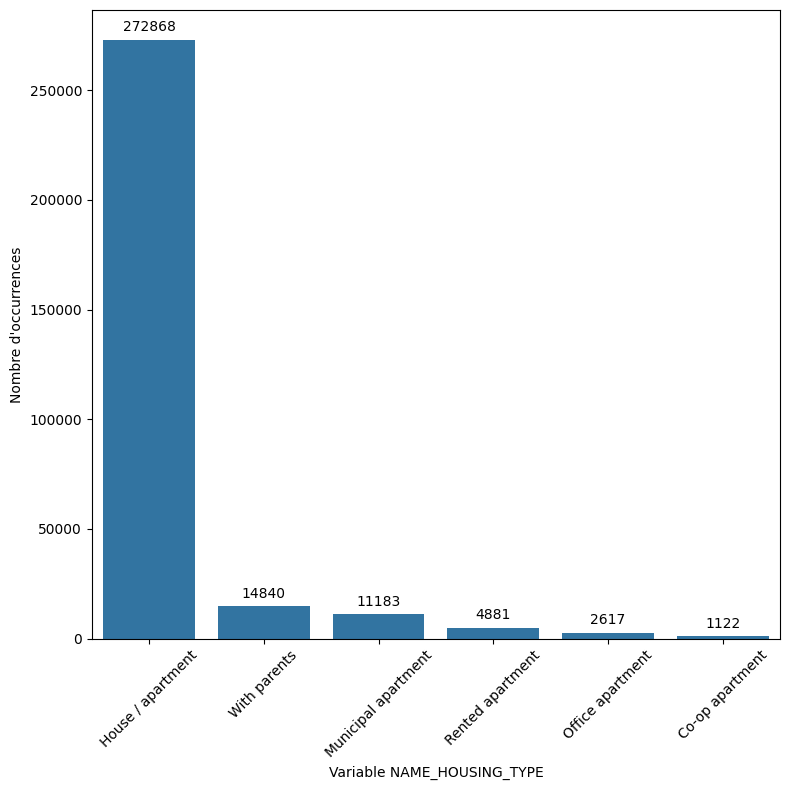

Le mode de cette variable est House / apartment



****************************************************VARIABLE OCCUPATION_TYPE****************************************************
          OCCUPATION_TYPE  count   percent
0              Not_filled  96391  0.313455
1                Laborers  55186   0.17946
2             Sales staff  32102  0.104393
3              Core staff  27570  0.089655
4                Managers  21371  0.069497
5                 Drivers  18603  0.060495
6   High skill tech staff  11380  0.037007
7             Accountants   9813  0.031911
8          Medicine staff   8537  0.027762
9          Security staff   6721  0.021856
10          Cooking staff   5946  0.019336
11         Cleaning staff   4653  0.015131
12  Private service staff   2652  0.008624
13     Low-skill Laborers   2093  0.006806
14   Waiters/barmen staff   1348  0.004384
15            Secretaries   1305  0.004244
16          Realty agents    751  0.002442
17               HR staff    563  0.001831
18 

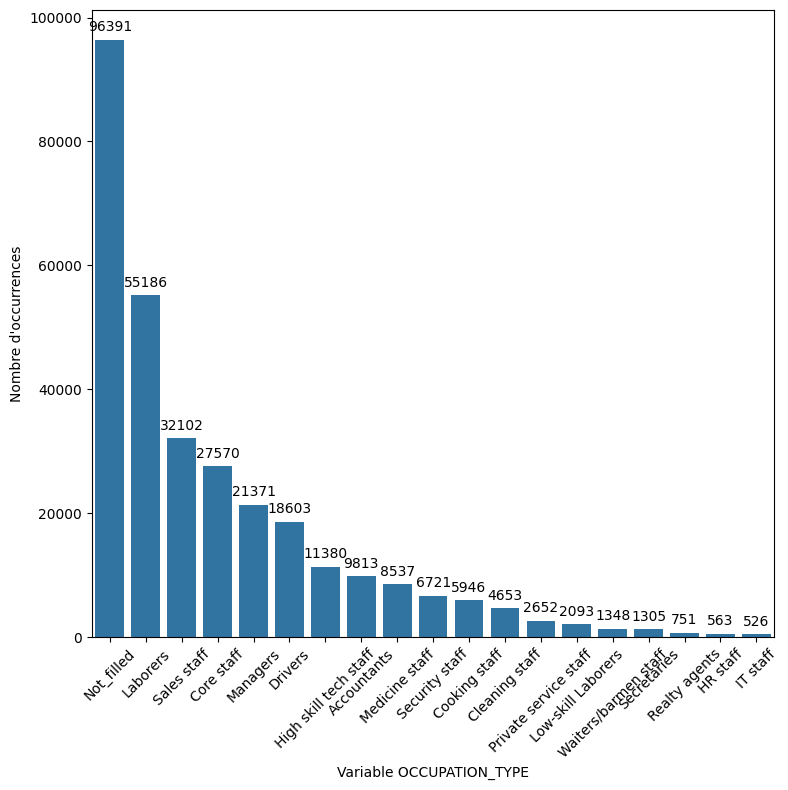

Le mode de cette variable est Not_filled



****************************************************VARIABLE WEEKDAY_APPR_PROCESS_START****************************************************
  WEEKDAY_APPR_PROCESS_START  count   percent
0                    TUESDAY  53901  0.175282
1                  WEDNESDAY  51934  0.168885
2                     MONDAY  50714  0.164918
3                   THURSDAY  50591  0.164518
4                     FRIDAY  50338  0.163695
5                   SATURDAY  33852  0.110084
6                     SUNDAY  16181  0.052619


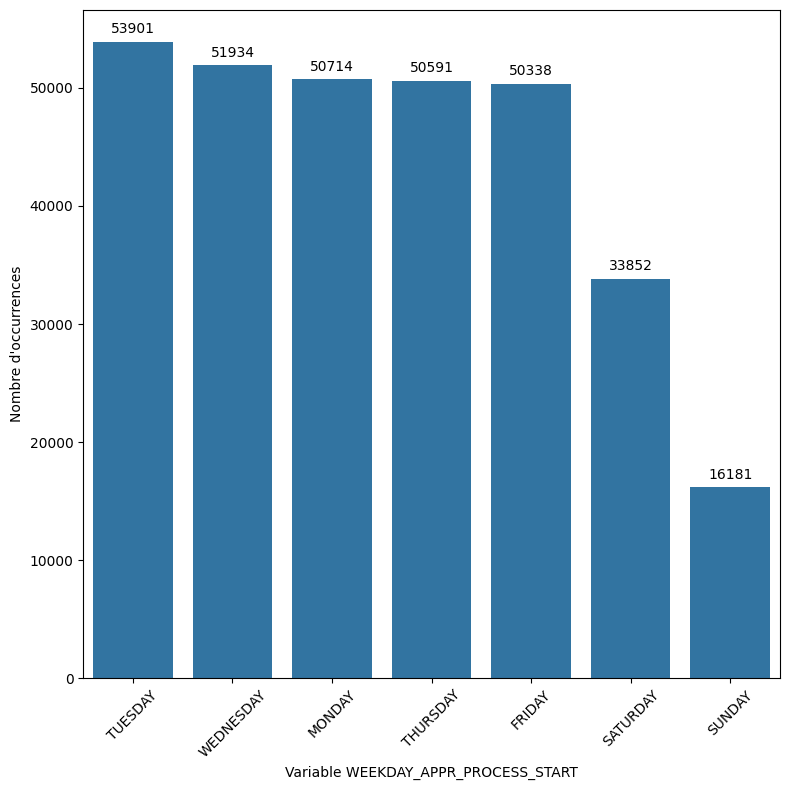

Le mode de cette variable est TUESDAY



****************************************************VARIABLE ORGANIZATION_TYPE****************************************************
         ORGANIZATION_TYPE  count   percent
0   Business Entity Type 3  67992  0.221104
1                      XNA  55374  0.180072
2            Self-employed  38412  0.124913
3                    Other  16683  0.054252
4                 Medicine  11193  0.036399
5   Business Entity Type 2  10553  0.034317
6               Government  10404  0.033833
7                   School   8893  0.028919
8            Trade: type 7   7831  0.025466
9             Kindergarten   6880  0.022373
10            Construction   6721  0.021856
11  Business Entity Type 1   5984  0.019459
12       Transport: type 4   5398  0.017554
13           Trade: type 3   3492  0.011356
14        Industry: type 9   3368  0.010952
15        Industry: type 3   3278   0.01066
16                Security   3247  0.010559
17                 Housing   2958  0

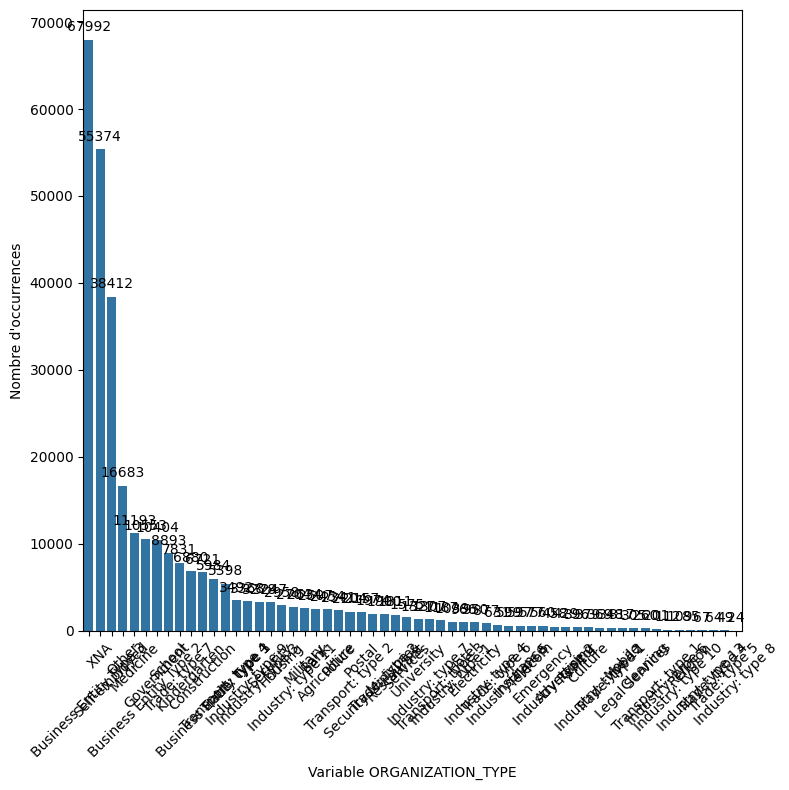

Le mode de cette variable est Business Entity Type 3



****************************************************VARIABLE FONDKAPREMONT_MODE****************************************************
      FONDKAPREMONT_MODE   count   percent
0             Not_filled  210295  0.683862
1       reg oper account   73830  0.240089
2  reg oper spec account   12080  0.039283
3          not specified    5687  0.018494
4       org spec account    5619  0.018273


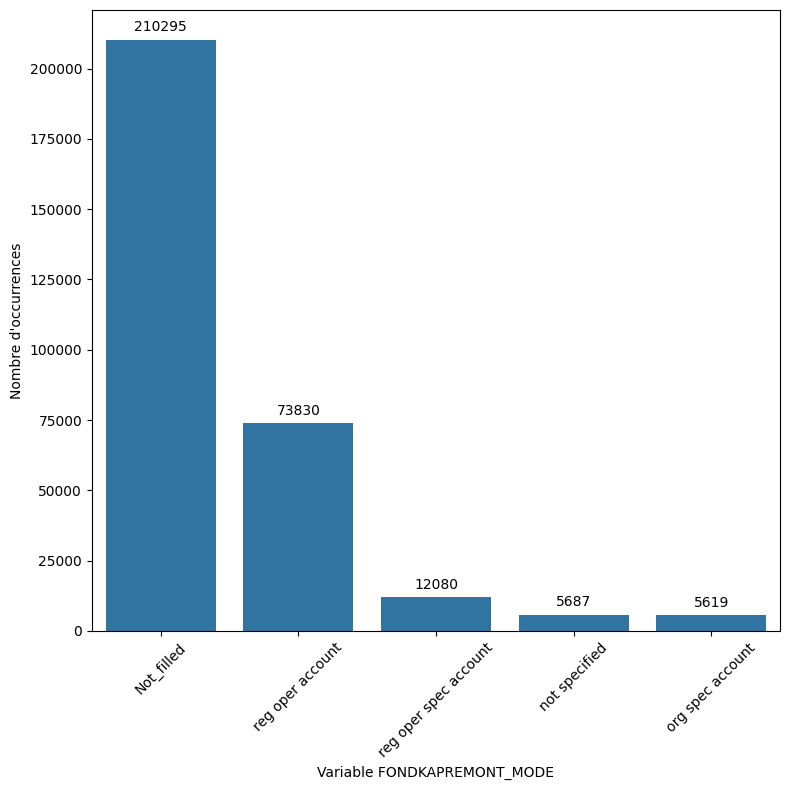

Le mode de cette variable est Not_filled



****************************************************VARIABLE HOUSETYPE_MODE****************************************************
     HOUSETYPE_MODE   count   percent
0        Not_filled  154297  0.501761
1    block of flats  150503  0.489423
2  specific housing    1499  0.004875
3    terraced house    1212  0.003941


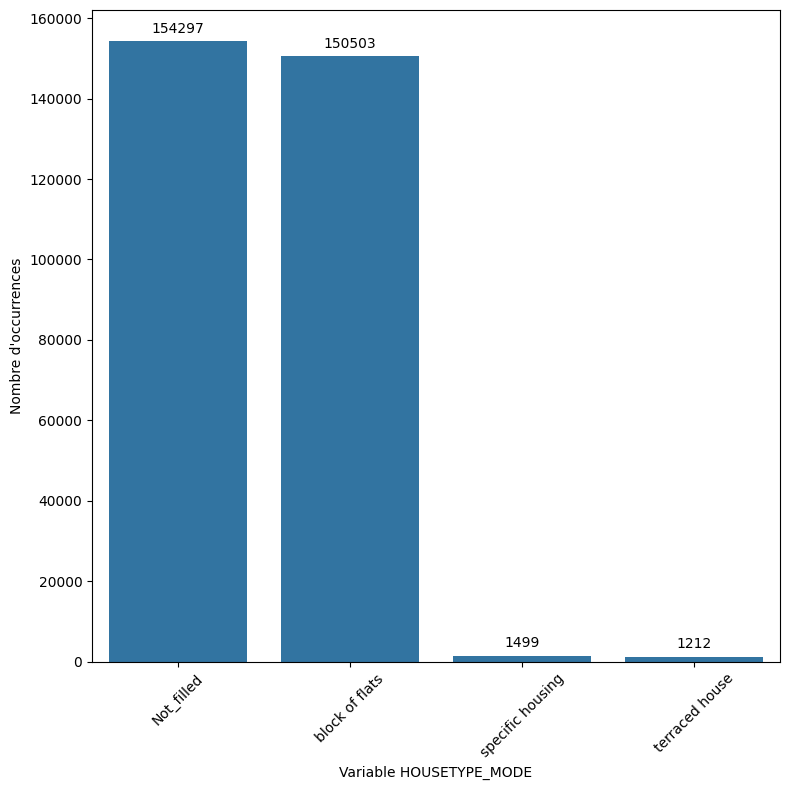

Le mode de cette variable est Not_filled



****************************************************VARIABLE WALLSMATERIAL_MODE****************************************************
  WALLSMATERIAL_MODE   count   percent
0         Not_filled  156341  0.508408
1              Panel   66040  0.214757
2       Stone, brick   64815  0.210773
3              Block    9253   0.03009
4             Wooden    5362  0.017437
5              Mixed    2296  0.007466
6         Monolithic    1779  0.005785
7             Others    1625  0.005284


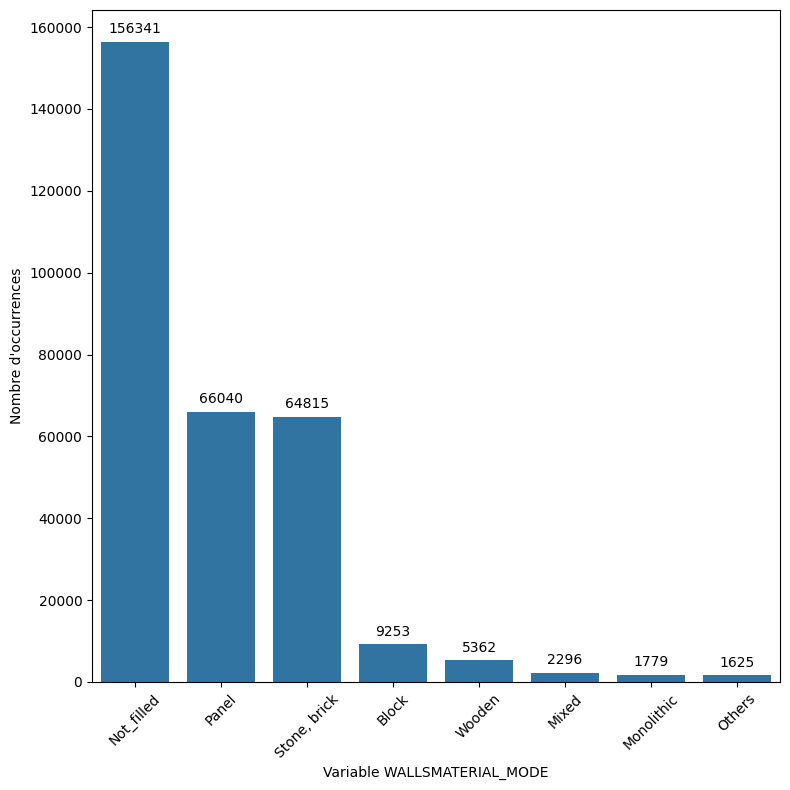

Le mode de cette variable est Not_filled



****************************************************VARIABLE EMERGENCYSTATE_MODE****************************************************
  EMERGENCYSTATE_MODE   count   percent
0                  No  159428  0.518446
1          Not_filled  145755  0.473983
2                 Yes    2328   0.00757


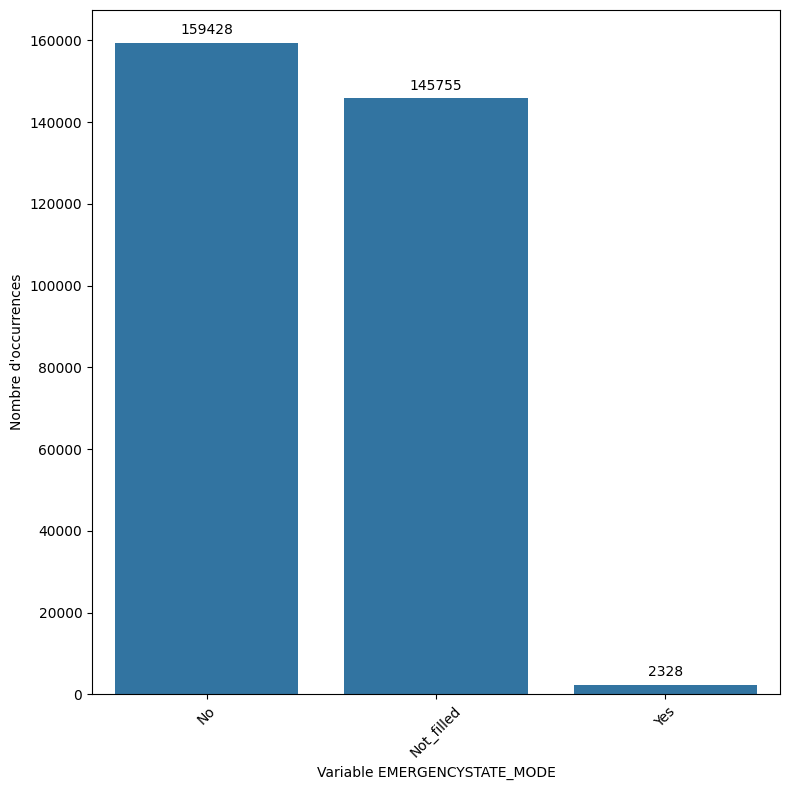

Le mode de cette variable est No





In [13]:
for col in qual_var_df.columns : 
    df_counts = None
    
    print(f"****************************************************VARIABLE {col}****************************************************")
    counts = qual_var_df[col].value_counts(dropna=False)
    df_counts = counts.to_frame()
    df_counts = df_counts.reset_index()
    df_counts["percent"] = df_counts["count"]/len(qual_var_df)
    df_counts.fillna("Not_filled", axis=1, inplace=True)
    print(df_counts)
    
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(df_counts, x=col, y="count")
    ax.set_xlabel(f"Variable {col}")
    ax.set_ylabel("Nombre d'occurrences")
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    df_counts.sort_values(by="count", ascending=False, inplace=True)
    mode = df_counts.loc[0, col]
    print(f"Le mode de cette variable est {mode}")
    print("\n\n")

### Résultats des analyses

**NAME_CONTRACT_TYPE :** La classe la plus représentée est Cash Loans avec un pourcentage de 90.48%

**CODE_GENDER :** La majorité de la population est de sexe féminin, avec un pourcentage de 65.83%. On note la présente de la modalité "XNA" qui correspond à des données mal renseignées. Puisque cela représente un pourcentage presque nul de la population, on va imputer le mode à ces lignes

**FLAG_OWN_CAR :** 66% de la population ne possède pas de voiture

**FLAG_OWN_REALTY :** 69.37% de la population possède une maison ou un appartement

**NAME_INCOME_TYPE :** 51.63% de la population est constituée de salariés. En revanche les chômeurss étudiants, businessmen et les femmes en congé maternité représentent au total moins d'un pourcent de la population

**NAME_EDUCATION_TYPE :** 71% de la population a fait des études secondaires et 24.34% ont fait des études supérieures. Les 4.5% restants sont constituées des autres modalités

**NAME_FAMILY_STATUS :** Sur 2 crédits, la statut familial est inconnu. On va imputer la médiane (classe Married) qui représente 63.88%  de la population

**NAME_HOUSING_TYPE :** La classe House / apartment est largement représentée, avec un pourcentage de 88.73%

**WEEKDAY_APPR_PROCESS_START :** Sur cette variable on remarque que les population est pratiquement distribuée de façon équivalente, avec de pourcentages autour de 16%-17%. En combinant les modalités SATURDAY et SUNDAY on constate également qu'on obtient un pourcentage total 16.26%

**ORGANIZATION_TYPE :** Cette variable comporte 58 modalités dont 50% représentent chacune moins de 10% de la population. On note une forte présence de valeurs mal renseignées (XNA), soit 18.01% de la population. 

**NAME_TYPE_SUITE :** La modalité Unaccompanied représente plus de 80% de la population. Les modalités Unaccompanied et Family représentent ensemle plus de 93% de la population. On note aussi que 1292 crédit n'ont pas la variable NAME_TYPE_SUITE renseignée (0.4%)

**FONDKAPREMONT_MODE :** cette variable n'est pas renseignée à 68.39%. La deuxième classe la plus représentée est reg oper account avec 24% d'occurences

**HOUSETYPE_MODE :** cette variable n'est pas renseignée à 50.17% 

**WALLSMATERIAL_MODE :** la variable n'est pas renseignée à plus de 50%

**EMERGENCYSTATE_MODE :** on note également une forte proportion de données manquantes (47.4%)

### Traitement des valeurs mal renseignées (NAME_FAMILY_STATUS et CODE_GENDER)
Pour ces deux variables, la stratégie adoptée est d'imputer le mode

In [14]:
quali.replace({"CODE_GENDER" : "XNA", "NAME_FAMILY_STATUS" : "Unknown"}, {"CODE_GENDER" : "F", "NAME_FAMILY_STATUS" : "Married"}, inplace=True)
quali.fillna("Not_filled", axis=1, inplace=True)
print(quali.CODE_GENDER.unique())
print(quali.NAME_FAMILY_STATUS.unique())

['M' 'F']
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']


### Test du chi2 entre les variables qualitatives et TARGET
On rappelle que : <br>
H0 : Les deux variables sont indépendantes <br>
H1 : Les deux variables sont dépendantes

In [15]:
indep_var_list = []
for col in qual_var_df.columns :
    print("\n\n")
    print(f"****************************************************VARIABLE {col}****************************************************")
    cross_tab = pd.crosstab(quali[col], quali['TARGET'], margins=True, margins_name="subtotal")
    chi, p, dof, expected = chi2_contingency(cross_tab)
    print(f"Statistique du chi-carré: {chi}")
    print(f"Valeur p: {p}")
    if (p<0.05):
        print("Rejet de H0 : oui ==> Dépendance des variables")
    else : 
        print("Rejet de H0 : non ==> Indépendance des variables")
        indep_var_list.append(col)

print("Liste des variables indépendantes")
print(indep_var_list)




****************************************************VARIABLE NAME_CONTRACT_TYPE****************************************************
Statistique du chi-carré: 293.5368210155465
Valeur p: 2.684545694085418e-62
Rejet de H0 : oui ==> Dépendance des variables



****************************************************VARIABLE CODE_GENDER****************************************************
Statistique du chi-carré: 920.5272805637674
Valeur p: 5.942785116279681e-198
Rejet de H0 : oui ==> Dépendance des variables



****************************************************VARIABLE FLAG_OWN_CAR****************************************************
Statistique du chi-carré: 146.82528196185692
Valeur p: 9.748590738786988e-31
Rejet de H0 : oui ==> Dépendance des variables



****************************************************VARIABLE FLAG_OWN_REALTY****************************************************
Statistique du chi-carré: 11.624737274340884
Valeur p: 0.02037128923282243
Rejet de H0 : oui ==> Dépendan

***Ce résultat corrobore les observations faites précédemment. En effet, les fréquences observées dans les différentes classes de WEEKDAY_APPR_PROCESS_START étaient assez proches***

#### Regroupement des modalités (variables NAME_INCOME_TYPE et OCCUPATION_TYPE

In [16]:
quali.replace({"NAME_INCOME_TYPE" : ["Unemployed", "Student", "Businessman", "Maternity leave"]}, {"NAME_INCOME_TYPE" : "Other"}, inplace=True)
quali.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Other'], dtype=object)

In [17]:
cross_tab = pd.crosstab(quali["NAME_INCOME_TYPE"], quali['TARGET'], margins=True, margins_name="subtotal")
chi, p, dof, expected = chi2_contingency(cross_tab)
print(f"Statistique du chi-carré: {chi}")
print(f"Valeur p: {p}")
if (p<0.05):
    print("Rejet de H0 : oui ==> Dépendance des variables")
else :
    print("Rejet de H0 : non ==> Indépendance des variables")

Statistique du chi-carré: 1227.9908679655523
Valeur p: 1.3196365501995326e-257
Rejet de H0 : oui ==> Dépendance des variables


**Le regroupement des moadalités de la variable NAME_INCOME_TYPE n'a pas affecté les résultats du test du chi2**

In [18]:
quali.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Not_filled',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [19]:
quali.replace({"OCCUPATION_TYPE" : ['Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']}, {"OCCUPATION_TYPE" : "Other"}, inplace=True)
quali.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Not_filled',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Other', 'Medicine staff', 'Security staff',
       'High skill tech staff'], dtype=object)

In [20]:
cross_tab = pd.crosstab(quali["OCCUPATION_TYPE"], quali['TARGET'], margins=True, margins_name="subtotal")
chi, p, dof, expected = chi2_contingency(cross_tab)
print(f"Statistique du chi-carré: {chi}")
print(f"Valeur p: {p}")
if (p<0.05):
    print("Rejet de H0 : oui ==> Dépendance des variables")
else :
    print("Rejet de H0 : non ==> Indépendance des variables")

Statistique du chi-carré: 1748.2368680244726
Valeur p: 0.0
Rejet de H0 : oui ==> Dépendance des variables


**Le regroupement des moadalités de la variable OCCUPATION_TYPE n'a pas affecté les résultats du test du chi2**

#### Regroupement des modalités de la variable ORGANIZATION_TYPE

La stratégie employée est de regrouper les modalités en 5 classes en fonction du taux de défaut par classe

In [21]:
#Cardinalités de chaque classe

df = quali.groupby(['ORGANIZATION_TYPE'])["TARGET"].count().to_frame()
df.rename(columns= {'TARGET':'COUNT'}, inplace=True)
df.reset_index(inplace=True)
df

ORGANIZATION_TYPE  COUNT
0              Advertising    429
1              Agriculture   2454
2                     Bank   2507
3   Business Entity Type 1   5984
4   Business Entity Type 2  10553
5   Business Entity Type 3  67992
6                 Cleaning    260
7             Construction   6721
8                  Culture    379
9              Electricity    950
10               Emergency    560
11              Government  10404
12                   Hotel    966
13                 Housing   2958
14        Industry: type 1   1039
15       Industry: type 10    109
16       Industry: type 11   2704
17       Industry: type 12    369
18       Industry: type 13     67
19        Industry: type 2    458
20        Industry: type 3   3278
21        Industry: type 4    877
22        Industry: type 5    599
23        Industry: type 6    112
24        Industry: type 7   1307
25        Industry: type 8     24
26        Industry: type 9   3368
27               Insurance    597
28            Kindergarten   6880
29          Legal Services    305
30                Medicine  11193
31                Military   2634
32                  Mobile    317
33                   Other  16683
34                  Police   2341
35                  Postal   2157
36                 Realtor    396
37                Religion     85
38              Restaurant   1811
39                  School   8893
40                Security   3247
41     Security Ministries   1974
42           Self-employed  38412
43                Services   1575
44                 Telecom    577
45           Trade: type 1    348
46           Trade: type 2   1900
47           Trade: type 3   3492
48           Trade: type 4     64
49           Trade: type 5     49
50           Trade: type 6    631
51           Trade: type 7   7831
52       Transport: type 1    201
53       Transport: type 2   2204
54       Transport: type 3   1187
55       Transport: type 4   5398
56              University   1327
57                     XNA  55374

In [22]:
#Nombre de positifs et de négatigs de chaque classe

df1 = quali.groupby(['ORGANIZATION_TYPE', 'TARGET'])["TARGET"].count().to_frame()
df1.rename(columns= {'TARGET':'COUNT_CLASS'}, inplace=True)
df1.reset_index(inplace=True)
df1

ORGANIZATION_TYPE TARGET  COUNT_CLASS
0          Advertising      0          394
1          Advertising      1           35
2          Agriculture      0         2197
3          Agriculture      1          257
4                 Bank      0         2377
..                 ...    ...          ...
111  Transport: type 4      1          501
112         University      0         1262
113         University      1           65
114                XNA      0        52384
115                XNA      1         2990

[116 rows x 3 columns]

In [23]:
#On joint les deux tables

final = df1.merge(df, how="left", on="ORGANIZATION_TYPE")
final["percent_pos"] = round(100*final.COUNT_CLASS/final.COUNT, 2)
final.drop(final[final["TARGET"]=="0"].index, inplace=True)
final

ORGANIZATION_TYPE TARGET  COUNT_CLASS  COUNT  percent_pos
1               Advertising      1           35    429         8.16
3               Agriculture      1          257   2454        10.47
5                      Bank      1          130   2507         5.19
7    Business Entity Type 1      1          487   5984         8.14
9    Business Entity Type 2      1          900  10553         8.53
11   Business Entity Type 3      1         6323  67992         9.30
13                 Cleaning      1           29    260        11.15
15             Construction      1          785   6721        11.68
17                  Culture      1           21    379         5.54
19              Electricity      1           63    950         6.63
21                Emergency      1           40    560         7.14
23               Government      1          726  10404         6.98
25                    Hotel      1           62    966         6.42
27                  Housing      1          235   2958         7.94
29         Industry: type 1      1          115   1039        11.07
31        Industry: type 10      1            7    109         6.42
33        Industry: type 11      1          234   2704         8.65
35        Industry: type 12      1           14    369         3.79
37        Industry: type 13      1            9     67        13.43
39         Industry: type 2      1           33    458         7.21
41         Industry: type 3      1          348   3278        10.62
43         Industry: type 4      1           89    877        10.15
45         Industry: type 5      1           41    599         6.84
47         Industry: type 6      1            8    112         7.14
49         Industry: type 7      1          105   1307         8.03
51         Industry: type 8      1            3     24        12.50
53         Industry: type 9      1          225   3368         6.68
55                Insurance      1           34    597         5.70
57             Kindergarten      1          484   6880         7.03
59           Legal Services      1           24    305         7.87
61                 Medicine      1          737  11193         6.58
63                 Military      1          135   2634         5.13
65                   Mobile      1           29    317         9.15
67                    Other      1         1275  16683         7.64
69                   Police      1          117   2341         5.00
71                   Postal      1          182   2157         8.44
73                  Realtor      1           42    396        10.61
75                 Religion      1            5     85         5.88
77               Restaurant      1          212   1811        11.71
79                   School      1          526   8893         5.91
81                 Security      1          324   3247         9.98
83      Security Ministries      1           96   1974         4.86
85            Self-employed      1         3908  38412        10.17
87                 Services      1          104   1575         6.60
89                  Telecom      1           44    577         7.63
91            Trade: type 1      1           31    348         8.91
93            Trade: type 2      1          133   1900         7.00
95            Trade: type 3      1          361   3492        10.34
97            Trade: type 4      1            2     64         3.12
99            Trade: type 5      1            3     49         6.12
101           Trade: type 6      1           29    631         4.60
103           Trade: type 7      1          740   7831         9.45
105       Transport: type 1      1            9    201         4.48
107       Transport: type 2      1          172   2204         7.80
109       Transport: type 3      1          187   1187        15.75
111       Transport: type 4      1          501   5398         9.28
113              University      1           65   1327         4.90
115                     XNA      1         2990  55374         5.4

In [24]:
#Tri de la table jointe + callcul du pourcentage de positifs par classe

final.sort_values(by=["percent_pos"], inplace=True)
final.reset_index(inplace=True)
final.drop(["index"], axis=1, inplace=True)
final

ORGANIZATION_TYPE TARGET  COUNT_CLASS  COUNT  percent_pos
0            Trade: type 4      1            2     64         3.12
1        Industry: type 12      1           14    369         3.79
2        Transport: type 1      1            9    201         4.48
3            Trade: type 6      1           29    631         4.60
4      Security Ministries      1           96   1974         4.86
5               University      1           65   1327         4.90
6                   Police      1          117   2341         5.00
7                 Military      1          135   2634         5.13
8                     Bank      1          130   2507         5.19
9                      XNA      1         2990  55374         5.40
10                 Culture      1           21    379         5.54
11               Insurance      1           34    597         5.70
12                Religion      1            5     85         5.88
13                  School      1          526   8893         5.91
14           Trade: type 5      1            3     49         6.12
15                   Hotel      1           62    966         6.42
16       Industry: type 10      1            7    109         6.42
17                Medicine      1          737  11193         6.58
18                Services      1          104   1575         6.60
19             Electricity      1           63    950         6.63
20        Industry: type 9      1          225   3368         6.68
21        Industry: type 5      1           41    599         6.84
22              Government      1          726  10404         6.98
23           Trade: type 2      1          133   1900         7.00
24            Kindergarten      1          484   6880         7.03
25        Industry: type 6      1            8    112         7.14
26               Emergency      1           40    560         7.14
27        Industry: type 2      1           33    458         7.21
28                 Telecom      1           44    577         7.63
29                   Other      1         1275  16683         7.64
30       Transport: type 2      1          172   2204         7.80
31          Legal Services      1           24    305         7.87
32                 Housing      1          235   2958         7.94
33        Industry: type 7      1          105   1307         8.03
34  Business Entity Type 1      1          487   5984         8.14
35             Advertising      1           35    429         8.16
36                  Postal      1          182   2157         8.44
37  Business Entity Type 2      1          900  10553         8.53
38       Industry: type 11      1          234   2704         8.65
39           Trade: type 1      1           31    348         8.91
40                  Mobile      1           29    317         9.15
41       Transport: type 4      1          501   5398         9.28
42  Business Entity Type 3      1         6323  67992         9.30
43           Trade: type 7      1          740   7831         9.45
44                Security      1          324   3247         9.98
45        Industry: type 4      1           89    877        10.15
46           Self-employed      1         3908  38412        10.17
47           Trade: type 3      1          361   3492        10.34
48             Agriculture      1          257   2454        10.47
49                 Realtor      1           42    396        10.61
50        Industry: type 3      1          348   3278        10.62
51        Industry: type 1      1          115   1039        11.07
52                Cleaning      1           29    260        11.15
53            Construction      1          785   6721        11.68
54              Restaurant      1          212   1811        11.71
55        Industry: type 8      1            3     24        12.50
56       Industry: type 13      1            9     67        13.43
57       Transport: type 3      1          187   1187        15.75

In [25]:
#On détermine les quantiles de la colonnes percent_pos

quantiles = final.percent_pos.quantile([0.2, 0.4, 0.6, 0.8, 1])
quantiles = quantiles.to_list()
quantiles

[5.772, 6.996, 8.144, 10.162, 15.75]

In [26]:
#La fonction assign_percentile assigne à chaque valeur de la colonne percent_pos un groupe

def assign_percentile(x) :
    if x <= quantiles[0] :
        return "Group 1"
    if x <= quantiles[1] and x > quantiles[0] :
        return "Group 2"
    if x <= quantiles[2] and x > quantiles[1] :
        return "Group 3"
    if x <= quantiles[3] and x > quantiles[2] :
        return "Group 4"
    if x <= quantiles[4] and x > quantiles[3] :
        return "Group 5"

In [27]:
final["Group"] = final.apply(lambda x: assign_percentile(x['percent_pos']), axis=1)
final

ORGANIZATION_TYPE TARGET  COUNT_CLASS  COUNT  percent_pos    Group
0            Trade: type 4      1            2     64         3.12  Group 1
1        Industry: type 12      1           14    369         3.79  Group 1
2        Transport: type 1      1            9    201         4.48  Group 1
3            Trade: type 6      1           29    631         4.60  Group 1
4      Security Ministries      1           96   1974         4.86  Group 1
5               University      1           65   1327         4.90  Group 1
6                   Police      1          117   2341         5.00  Group 1
7                 Military      1          135   2634         5.13  Group 1
8                     Bank      1          130   2507         5.19  Group 1
9                      XNA      1         2990  55374         5.40  Group 1
10                 Culture      1           21    379         5.54  Group 1
11               Insurance      1           34    597         5.70  Group 1
12                Religion      1            5     85         5.88  Group 2
13                  School      1          526   8893         5.91  Group 2
14           Trade: type 5      1            3     49         6.12  Group 2
15                   Hotel      1           62    966         6.42  Group 2
16       Industry: type 10      1            7    109         6.42  Group 2
17                Medicine      1          737  11193         6.58  Group 2
18                Services      1          104   1575         6.60  Group 2
19             Electricity      1           63    950         6.63  Group 2
20        Industry: type 9      1          225   3368         6.68  Group 2
21        Industry: type 5      1           41    599         6.84  Group 2
22              Government      1          726  10404         6.98  Group 2
23           Trade: type 2      1          133   1900         7.00  Group 3
24            Kindergarten      1          484   6880         7.03  Group 3
25        Industry: type 6      1            8    112         7.14  Group 3
26               Emergency      1           40    560         7.14  Group 3
27        Industry: type 2      1           33    458         7.21  Group 3
28                 Telecom      1           44    577         7.63  Group 3
29                   Other      1         1275  16683         7.64  Group 3
30       Transport: type 2      1          172   2204         7.80  Group 3
31          Legal Services      1           24    305         7.87  Group 3
32                 Housing      1          235   2958         7.94  Group 3
33        Industry: type 7      1          105   1307         8.03  Group 3
34  Business Entity Type 1      1          487   5984         8.14  Group 3
35             Advertising      1           35    429         8.16  Group 4
36                  Postal      1          182   2157         8.44  Group 4
37  Business Entity Type 2      1          900  10553         8.53  Group 4
38       Industry: type 11      1          234   2704         8.65  Group 4
39           Trade: type 1      1           31    348         8.91  Group 4
40                  Mobile      1           29    317         9.15  Group 4
41       Transport: type 4      1          501   5398         9.28  Group 4
42  Business Entity Type 3      1         6323  67992         9.30  Group 4
43           Trade: type 7      1          740   7831         9.45  Group 4
44                Security      1          324   3247         9.98  Group 4
45        Industry: type 4      1           89    877        10.15  Group 4
46           Self-employed      1         3908  38412        10.17  Group 5
47           Trade: type 3      1          361   3492        10.34  Group 5
48             Agriculture      1          257   2454        10.47  Group 5
49                 Realtor      1           42    396        10.61  Group 5
50        Industry: type 3      1          348   3278        10.62  Group 5
51        Industry: type 1      1          115   1039    

In [28]:
quali.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [29]:
#On sauvegarde la table d'origine par précaution
quali2 = quali.copy()

In [30]:
#quali = quali2.copy()

In [31]:
quali.replace(
    {
        "ORGANIZATION_TYPE" : ["Trade: type 4","Industry: type 12","Transport: type 1","Trade: type 6","Trade: type 4","Security Ministries","University","Police","Military","Bank","XNA","Culture","Insurance"]
    },
        
    {
        "ORGANIZATION_TYPE" : "Group 1"
    },
    inplace=True
)
print(quali.ORGANIZATION_TYPE.unique())

['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other'
 'Group 1' 'Electricity' 'Medicine' 'Business Entity Type 2'
 'Self-employed' 'Transport: type 2' 'Construction' 'Housing'
 'Kindergarten' 'Trade: type 7' 'Industry: type 11' 'Services'
 'Transport: type 4' 'Industry: type 1' 'Emergency' 'Security'
 'Trade: type 2' 'Transport: type 3' 'Business Entity Type 1' 'Postal'
 'Industry: type 4' 'Agriculture' 'Restaurant' 'Hotel' 'Industry: type 7'
 'Trade: type 3' 'Industry: type 3' 'Industry: type 9' 'Industry: type 2'
 'Mobile' 'Trade: type 1' 'Industry: type 5' 'Industry: type 10'
 'Legal Services' 'Advertising' 'Trade: type 5' 'Cleaning'
 'Industry: type 13' 'Telecom' 'Industry: type 8' 'Realtor'
 'Industry: type 6']


In [32]:
quali.replace(
    {
        "ORGANIZATION_TYPE" : ["Religion","School","Trade: type 5","Hotel","Industry: type 10","Medicine","Services","Electricity","Industry: type 9","Industry: type 5","Government"]
    },
    {
        "ORGANIZATION_TYPE" : "Group 2"
    },
    inplace=True
)

print(quali.ORGANIZATION_TYPE.unique())

['Business Entity Type 3' 'Group 2' 'Other' 'Group 1'
 'Business Entity Type 2' 'Self-employed' 'Transport: type 2'
 'Construction' 'Housing' 'Kindergarten' 'Trade: type 7'
 'Industry: type 11' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'Transport: type 3' 'Business Entity Type 1'
 'Postal' 'Industry: type 4' 'Agriculture' 'Restaurant' 'Industry: type 7'
 'Trade: type 3' 'Industry: type 3' 'Industry: type 2' 'Mobile'
 'Trade: type 1' 'Legal Services' 'Advertising' 'Cleaning'
 'Industry: type 13' 'Telecom' 'Industry: type 8' 'Realtor'
 'Industry: type 6']


In [33]:
quali.replace(
    {
        "ORGANIZATION_TYPE" : ["Trade: type 2","Kindergarten","Industry: type 6","Emergency","Industry: type 2","Telecom","Other","Transport: type 2","Legal Services","Housing","Industry: type 7","Business Entity Type 1"]
    },
    {
        "ORGANIZATION_TYPE" : "Group 3"
    },
    inplace=True
)

print(quali.ORGANIZATION_TYPE.unique())

['Business Entity Type 3' 'Group 2' 'Group 3' 'Group 1'
 'Business Entity Type 2' 'Self-employed' 'Construction' 'Trade: type 7'
 'Industry: type 11' 'Transport: type 4' 'Industry: type 1' 'Security'
 'Transport: type 3' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Trade: type 3' 'Industry: type 3' 'Mobile' 'Trade: type 1'
 'Advertising' 'Cleaning' 'Industry: type 13' 'Industry: type 8' 'Realtor']


In [34]:
quali.replace(
    {
        "ORGANIZATION_TYPE" : ["Advertising","Postal","Business Entity Type 2","Industry: type 11","Trade: type 1","Mobile","Transport: type 4","Business Entity Type 3","Trade: type 7","Security","Industry: type 4"]
    },
    {
        "ORGANIZATION_TYPE" : "Group 4"
    },
    inplace=True
)

print(quali.ORGANIZATION_TYPE.unique())

['Group 4' 'Group 2' 'Group 3' 'Group 1' 'Self-employed' 'Construction'
 'Industry: type 1' 'Transport: type 3' 'Agriculture' 'Restaurant'
 'Trade: type 3' 'Industry: type 3' 'Cleaning' 'Industry: type 13'
 'Industry: type 8' 'Realtor']


In [35]:
quali.replace(
    {
        "ORGANIZATION_TYPE" : ["Self-employed","Trade: type 3","Agriculture","Realtor","Industry: type 3","Industry: type 1","Cleaning","Construction","Restaurant","Industry: type 8","Industry: type 13","Transport: type 3"]
    },
    {
        "ORGANIZATION_TYPE" : "Group 5"
    },
    inplace=True
)

print(quali.ORGANIZATION_TYPE.unique())

['Group 4' 'Group 2' 'Group 3' 'Group 1' 'Group 5']


In [36]:
cross_tab = pd.crosstab(quali["ORGANIZATION_TYPE"], quali['TARGET'], margins=True, margins_name="subtotal")
chi, p, dof, expected = chi2_contingency(cross_tab)
print(f"Statistique du chi-carré: {chi}")
print(f"Valeur p: {p}")
if (p<0.05):
    print("Rejet de H0 : oui ==> Dépendance des variables")
else :
    print("Rejet de H0 : non ==> Indépendance des variables")

Statistique du chi-carré: 1507.6856911326663
Valeur p: 0.0
Rejet de H0 : oui ==> Dépendance des variables


# ANALYSE DES VARIABLES QUANTITATIVES

In [37]:
quanti_discretes = application_data.select_dtypes(include=['int64'])
quanti_continues = application_data.select_dtypes(include=['float64'])
quanti_discretes.drop(["SK_ID_CURR"], axis=1, inplace=True)

In [38]:
quanti_discretes

CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                  0       -9461           -637            -2120           1   
1                  0      -16765          -1188             -291           1   
2                  0      -19046           -225            -2531           1   
3                  0      -19005          -3039            -2437           1   
4                  0      -19932          -3038            -3458           1   
...              ...         ...            ...              ...         ...   
307506             0       -9327           -236            -1982           1   
307507             0      -20775         365243            -4090           1   
307508             0      -14966          -7921            -5150           1   
307509             0      -11961          -4786             -931           1   
307510             0      -16856          -1262             -410           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                0  ...                 0                 0                 0   
1                0  ...                 0                 0                 0   
2                0  ...                 0                 0                 0   
3                0  ...                 0                 0                 0   
4                0  ...                 0                 0                 0   
...            ...  ...               ...               ...               ...   
307506           0  ...                 0                 0                 0   
307507           0  ...                 0                 0                 0   
307508           1  ...                 0                 0                 0   
307509           0  ...                 0                 0                 0   
307510           0  ...                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307506                 0                 0                 0   
307507                 0                 0                 0   
307508                 0                 0                 0   
307509                 0                 0                 0   
307510                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                      0                 0                 0                 0  
1                      0                 0                 0                 0  
2                      0                 0                 0                 0  
3                      0                 0                 0                 0  
4                      

In [39]:
quanti_continues

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0               202500.0    406597.5      24700.5         351000.0   
1               270000.0   1293502.5      35698.5        1129500.0   
2                67500.0    135000.0       6750.0         135000.0   
3               135000.0    312682.5      29686.5         297000.0   
4               121500.0    513000.0      21865.5         513000.0   
...                  ...         ...          ...              ...   
307506          157500.0    254700.0      27558.0         225000.0   
307507           72000.0    269550.0      12001.5         225000.0   
307508          153000.0    677664.0      29979.0         585000.0   
307509          171000.0    370107.0      20205.0         319500.0   
307510          157500.0    675000.0      49117.5         675000.0   

        REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  OWN_CAR_AGE  \
0                         0.018801            -3648.0          NaN   
1                         0.003541            -1186.0          NaN   
2                         0.010032            -4260.0         26.0   
3                         0.008019            -9833.0          NaN   
4                         0.028663            -4311.0          NaN   
...                            ...                ...          ...   
307506                    0.032561            -8456.0          NaN   
307507                    0.025164            -4388.0          NaN   
307508                    0.005002            -6737.0          NaN   
307509                    0.005313            -2562.0          NaN   
307510                    0.046220            -5128.0          NaN   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  ...  \
0                   1.0      0.083037      0.262949  ...   
1                   2.0      0.311267      0.622246  ...   
2                   1.0           NaN      0.555912  ...   
3                   2.0           NaN      0.650442  ...   
4                   1.0           NaN      0.322738  ...   
...                 ...           ...           ...  ...   
307506              1.0      0.145570      0.681632  ...   
307507              1.0           NaN      0.115992  ...   
307508              1.0      0.744026      0.535722  ...   
307509              2.0           NaN      0.514163  ...   
307510              2.0      0.734460      0.708569  ...   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            0.0                       1.0   
2                            0.0                       0.0   
3                            0.0                       2.0   
4                            0.0                       0.0   
...                          ...                       ...   
307506                       0.0                       0.0   
307507                       0.0                       0.0   
307508                       0.0                       6.0   
307509                       0.0                       0.0   
307510                       0.0                       0.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                            2.0                 -1134.0   
1                            0.0                  -828.0   
2                            0.0                  -815.0   
3                            0.0                  -617.0   
4                            0.0                 -1106.0   
...                          ...                     ...   
307506                       0.0                  -273.0   
307507                       0.0                     0.0   
307508                       0.0                 -1909.0   
307509                       0.0                  -322.0   
307510                       0.0                  -787.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                              0.0                        0.0   
1        

In [40]:
quanti_discretes.describe(include = "all")

CNT_CHILDREN     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000  307511.000000    307511.000000   
mean        0.417052  -16036.995067   63815.045904     -2994.202373   
std         0.722121    4363.988632  141275.766519      1509.450419   
min         0.000000  -25229.000000  -17912.000000     -7197.000000   
25%         0.000000  -19682.000000   -2760.000000     -4299.000000   
50%         0.000000  -15750.000000   -1213.000000     -3254.000000   
75%         1.000000  -12413.000000    -289.000000     -1720.000000   
max        19.000000   -7489.000000  365243.000000         0.000000   

          FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000000   307511.000000    307511.000000     307511.000000   
mean        0.999997        0.819889         0.199368          0.998133   
std         0.001803        0.384280         0.399526          0.043164   
min         0.000000        0.000000         0.000000          0.000000   
25%         1.000000        1.000000         0.000000          1.000000   
50%         1.000000        1.000000         0.000000          1.000000   
75%         1.000000        1.000000         0.000000          1.000000   
max         1.000000        1.000000         1.000000          1.000000   

          FLAG_PHONE     FLAG_EMAIL  ...  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  \
count  307511.000000  307511.000000  ...     307511.000000     307511.000000   
mean        0.281066       0.056720  ...          0.000007          0.003525   
std         0.449521       0.231307  ...          0.002550          0.059268   
min         0.000000       0.000000  ...          0.000000          0.000000   
25%         0.000000       0.000000  ...          0.000000          0.000000   
50%         0.000000       0.000000  ...          0.000000          0.000000   
75%         1.000000       0.000000  ...          0.000000          0.000000   
max         1.000000       1.000000  ...          1.000000          1.000000   

       FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
count     307511.000000      307511.00000     307511.000000     307511.000000   
mean           0.002936           0.00121          0.009928          0.000267   
std            0.054110           0.03476          0.099144          0.016327   
min            0.000000           0.00000          0.000000          0.000000   
25%            0.000000           0.00000          0.000000          0.000000   
50%            0.000000           0.00000          0.000000          0.000000   
75%            0.000000           0.00000          0.000000          0.000000   
max            1.000000           1.00000          1.000000          1.000000   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
count     307511.000000     307511.000000     307511.000000     307511.000000  
mean           0.008130          0.000595          0.000507          0.000335  
std            0.089798          0.024387          0.022518          0.018299  
min            0.000000          0.000000          0.000000          0.000000  
25%            0.000000          0.000000          0.000000          0.000000  
50%            0.000000          0.000000          0.000000          0.000000  
75%            0.000000          0.000000          0.000000          0.000000  
max            1.000000          1.000000          1.000000          1.000000  

[8 rows x 39 columns]

In [41]:
quanti_continues.describe(include = "all")

AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05   
mean       1.687979e+05  5.990260e+05   27108.573909     5.383962e+05   
std        2.371231e+05  4.024908e+05   14493.737315     3.694465e+05   
min        2.565000e+04  4.500000e+04    1615.500000     4.050000e+04   
25%        1.125000e+05  2.700000e+05   16524.000000     2.385000e+05   
50%        1.471500e+05  5.135310e+05   24903.000000     4.500000e+05   
75%        2.025000e+05  8.086500e+05   34596.000000     6.795000e+05   
max        1.170000e+08  4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_REGISTRATION    OWN_CAR_AGE  \
count               307511.000000      307511.000000  104582.000000   
mean                     0.020868       -4986.120328      12.061091   
std                      0.013831        3522.886321      11.944812   
min                      0.000290      -24672.000000       0.000000   
25%                      0.010006       -7479.500000       5.000000   
50%                      0.018850       -4504.000000       9.000000   
75%                      0.028663       -2010.000000      15.000000   
max                      0.072508           0.000000      91.000000   

       CNT_FAM_MEMBERS   EXT_SOURCE_1  EXT_SOURCE_2  ...  \
count    307509.000000  134133.000000  3.068510e+05  ...   
mean          2.152665       0.502130  5.143927e-01  ...   
std           0.910682       0.211062  1.910602e-01  ...   
min           1.000000       0.014568  8.173617e-08  ...   
25%           2.000000       0.334007  3.924574e-01  ...   
50%           2.000000       0.505998  5.659614e-01  ...   
75%           3.000000       0.675053  6.636171e-01  ...   
max          20.000000       0.962693  8.549997e-01  ...   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   0.143421                  1.405292   
std                    0.446698                  2.379803   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  2.000000   
max                   34.000000                344.000000   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             306490.000000           307510.000000   
mean                   0.100049             -962.858788   
std                    0.362291              826.808487   
min                    0.000000            -4292.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -757.000000   
75%                    0.000000             -274.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000 

In [42]:
quanti_continues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   OWN_CAR_AGE                   104582 non-null  float64
 7   CNT_FAM_MEMBERS               307509 non-null  float64
 8   EXT_SOURCE_1                  134133 non-null  float64
 9   EXT_SOURCE_2                  306851 non-null  float64
 10  EXT_SOURCE_3                  246546 non-null  float64
 11  APARTMENTS_AVG                151450 non-null  float64
 12  BASEMENTAREA_AVG              127568 non-nul

In [43]:
quanti_continues_missing = quanti_continues.isna()
quanti_continues_missing_percent = quanti_continues_missing.sum()/len(quanti_continues)

print(quanti_continues_missing_percent.sort_values(ascending=False).to_string())

COMMONAREA_AVG                  0.698723
COMMONAREA_MEDI                 0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
LIVINGAPARTMENTS_AVG            0.683550
FLOORSMIN_MODE                  0.678486
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
YEARS_BUILD_AVG                 0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_AVG                    0.593767
LANDAREA_MODE                   0.593767
LANDAREA_MEDI                   0.593767
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_AVG               0.551792
NONLIVINGAREA_MO

In [44]:
quanti_continues_missing = quanti_continues.isna().sum()

print(quanti_continues_missing.sort_values(ascending=False).to_string())

COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MODE                  208642
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_MEDI       

#### Commentaire :
Plusieurs variables ont un taux de valeurs manquantes important. 38 variables sur 65 ont plus de 50% de valeurs manquantes

****************************************************VARIABLE AMT_INCOME_TOTAL****************************************************


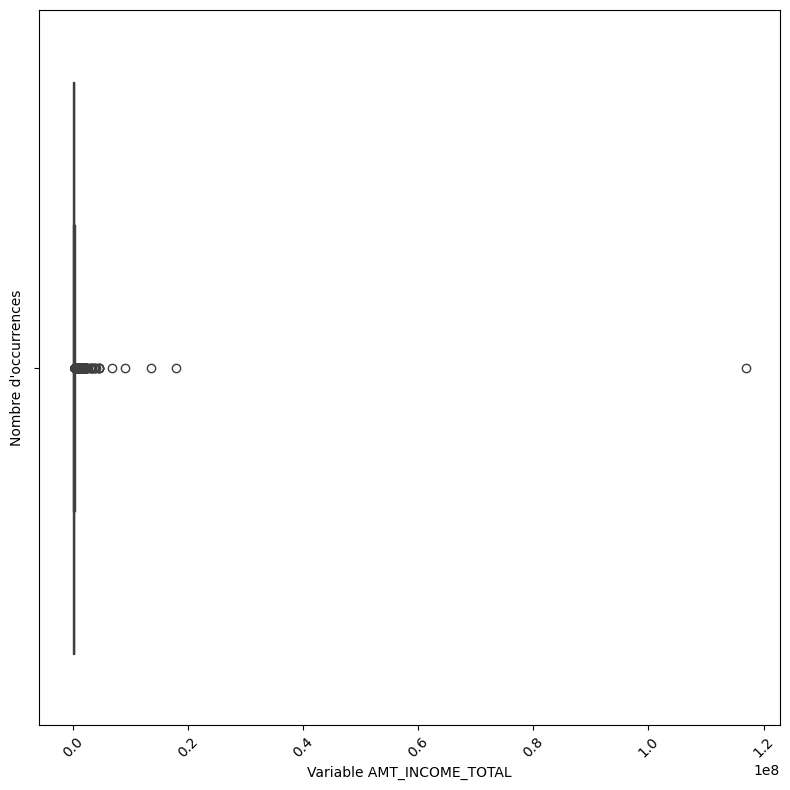

****************************************************VARIABLE AMT_CREDIT****************************************************


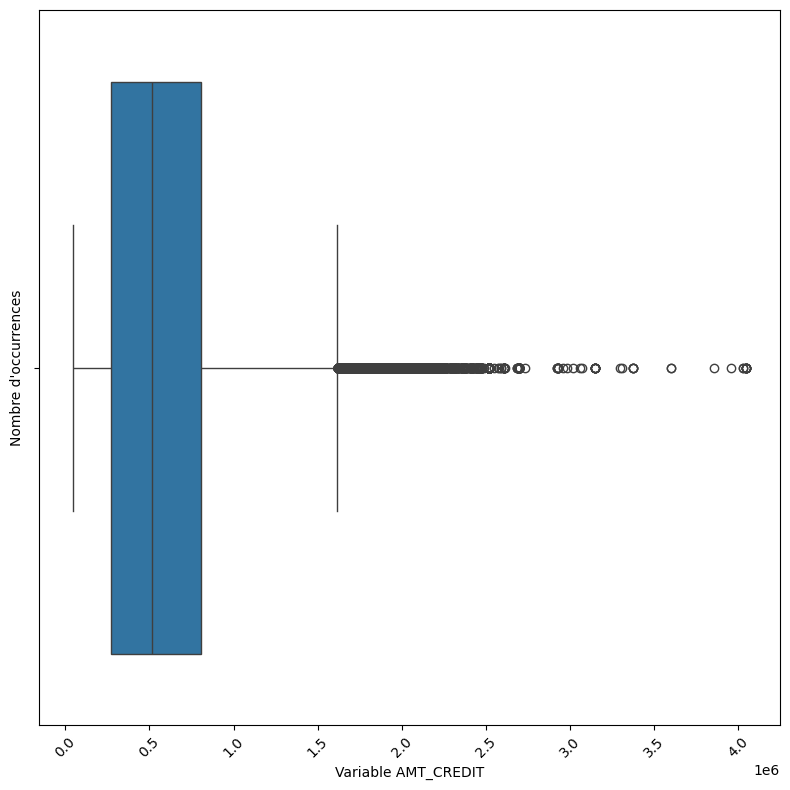

****************************************************VARIABLE AMT_ANNUITY****************************************************


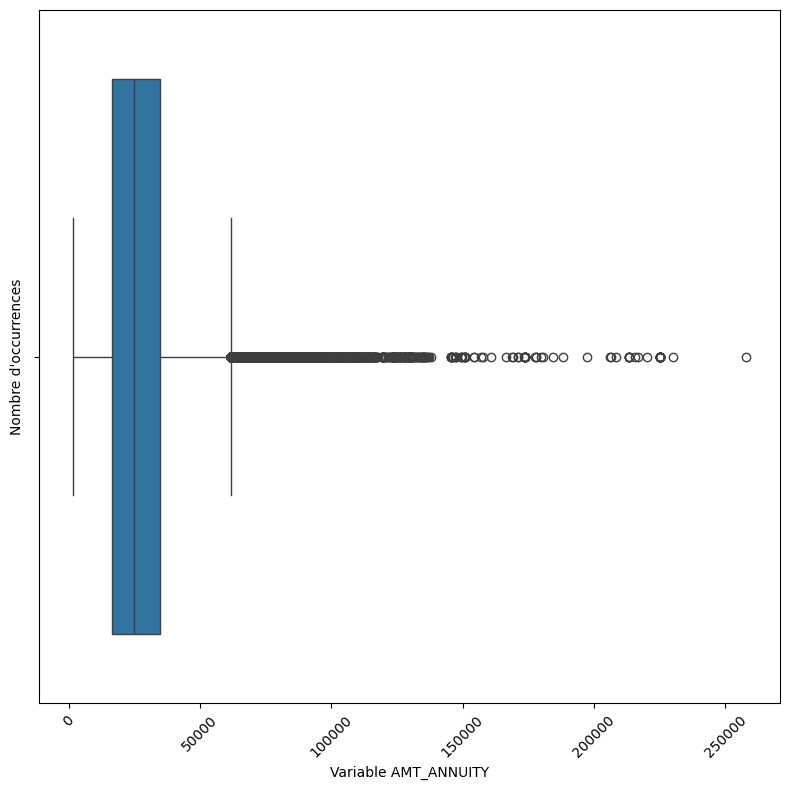

****************************************************VARIABLE AMT_GOODS_PRICE****************************************************


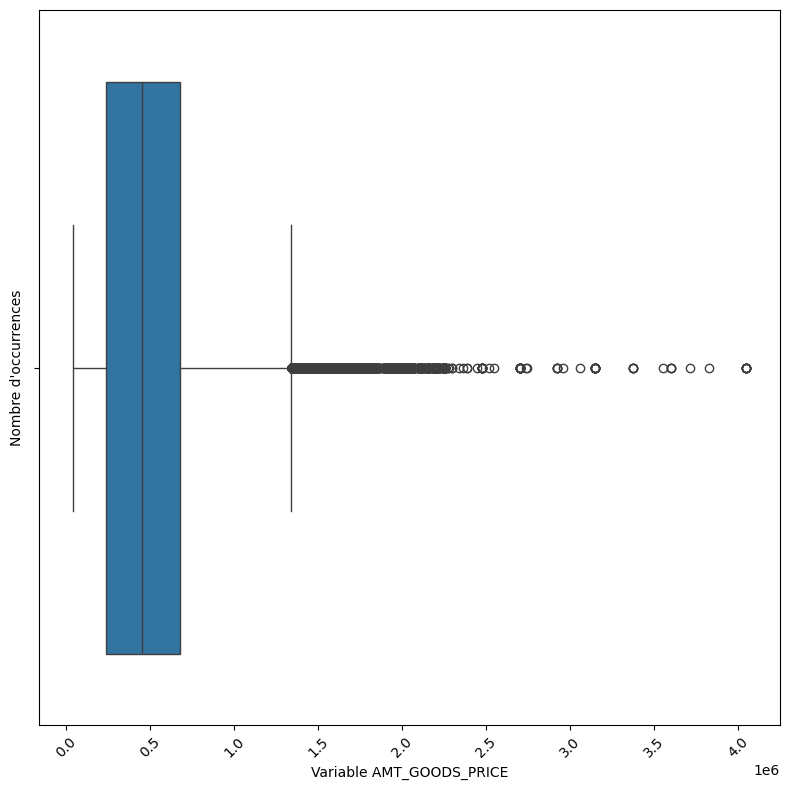

****************************************************VARIABLE REGION_POPULATION_RELATIVE****************************************************


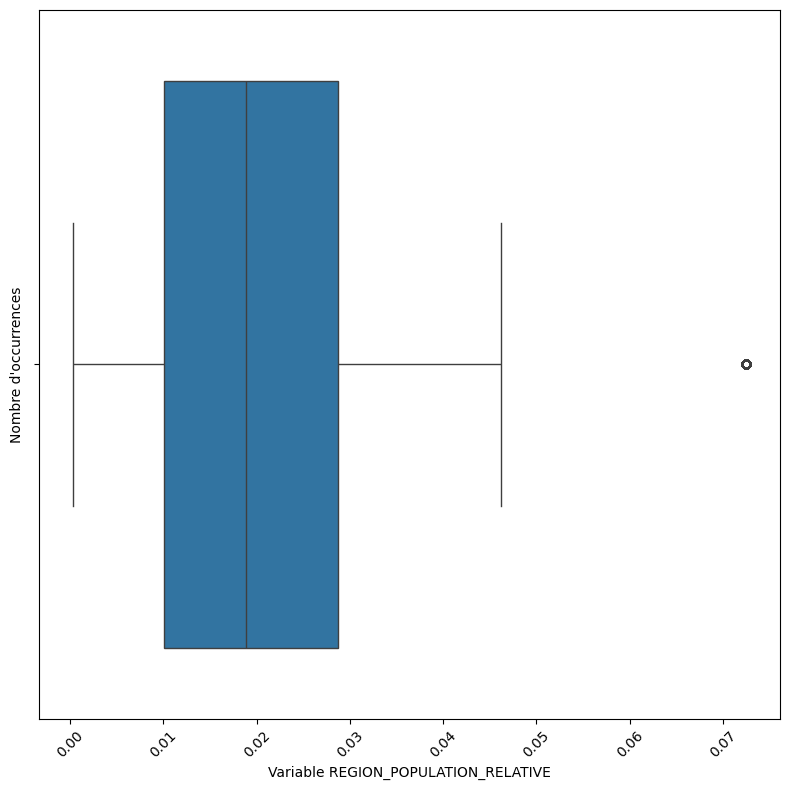

****************************************************VARIABLE DAYS_REGISTRATION****************************************************


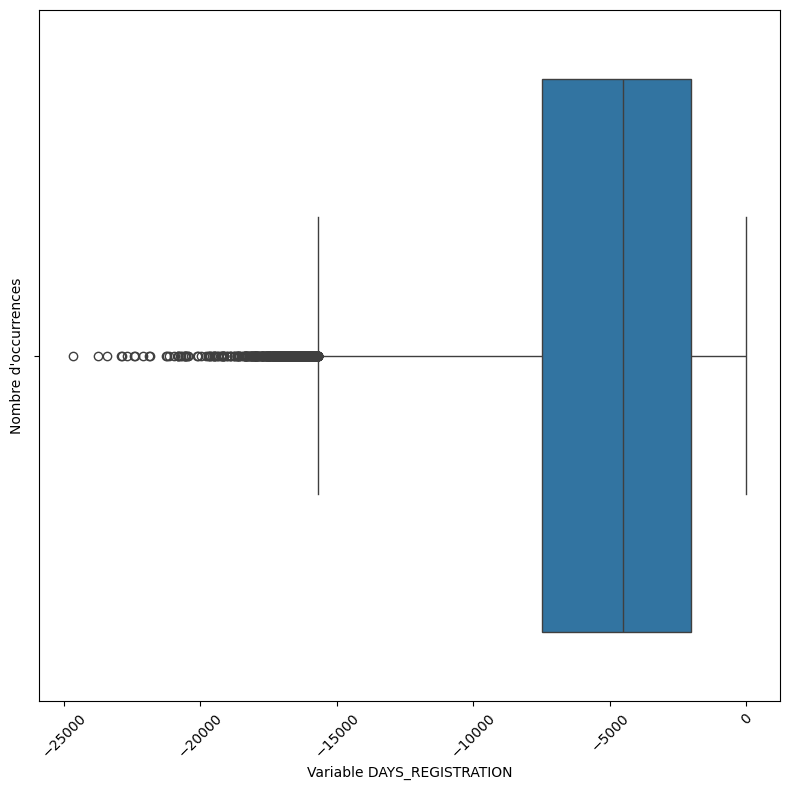

****************************************************VARIABLE OWN_CAR_AGE****************************************************


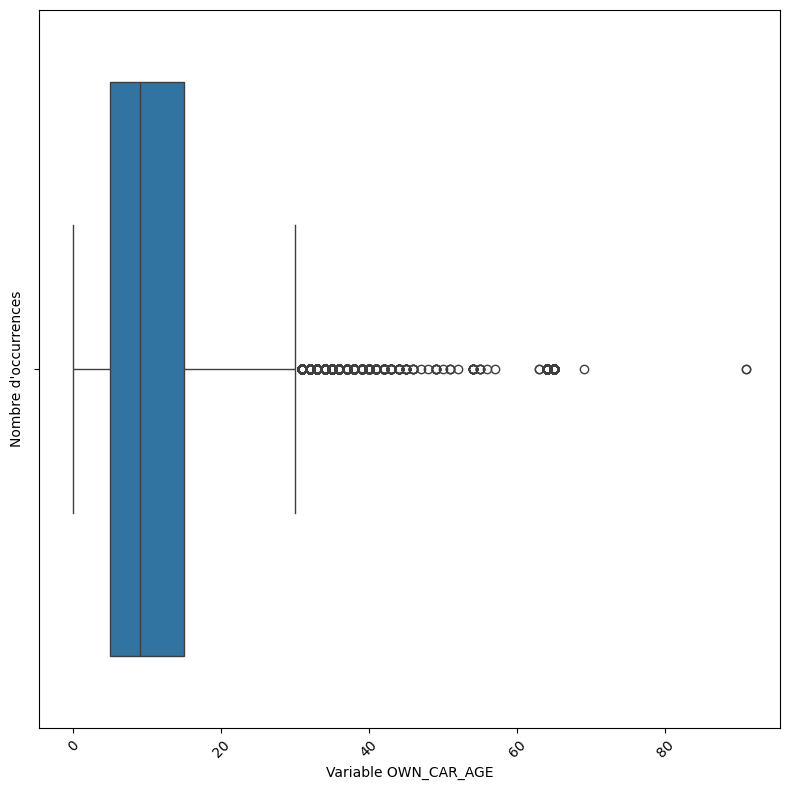

****************************************************VARIABLE CNT_FAM_MEMBERS****************************************************


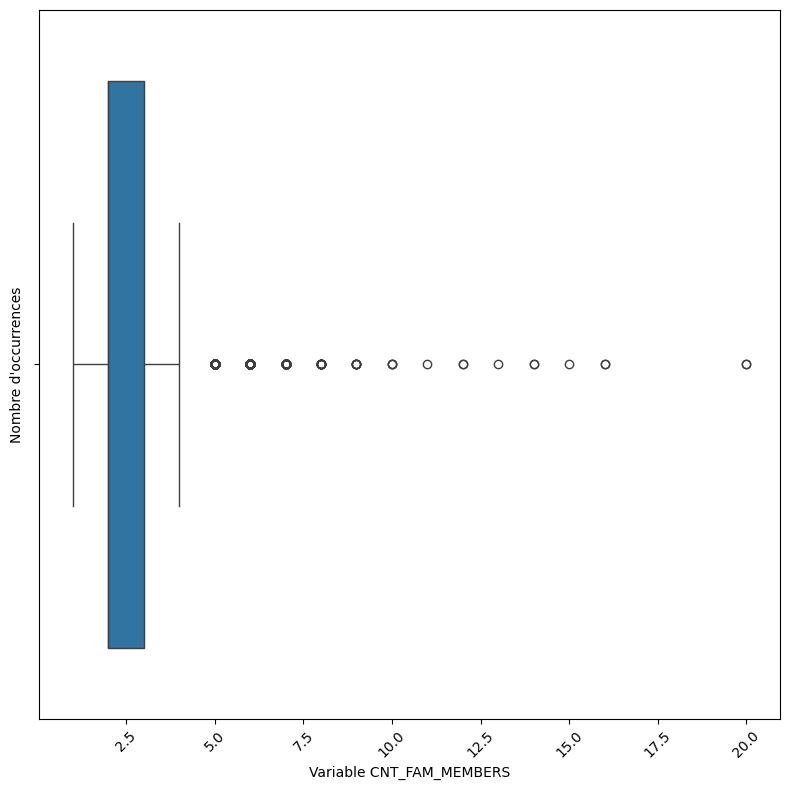

****************************************************VARIABLE EXT_SOURCE_1****************************************************


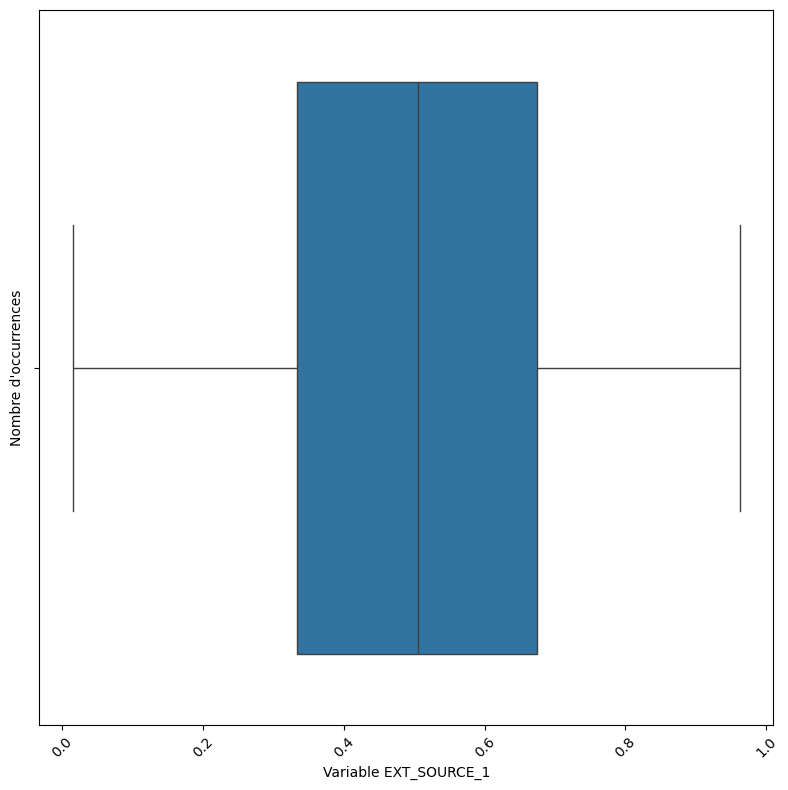

****************************************************VARIABLE EXT_SOURCE_2****************************************************


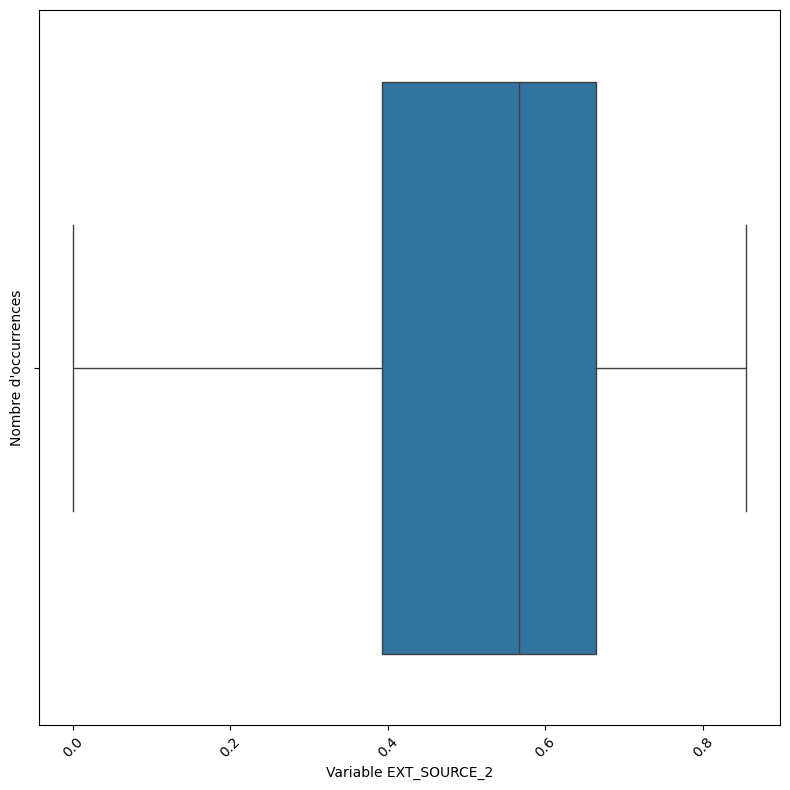

****************************************************VARIABLE EXT_SOURCE_3****************************************************


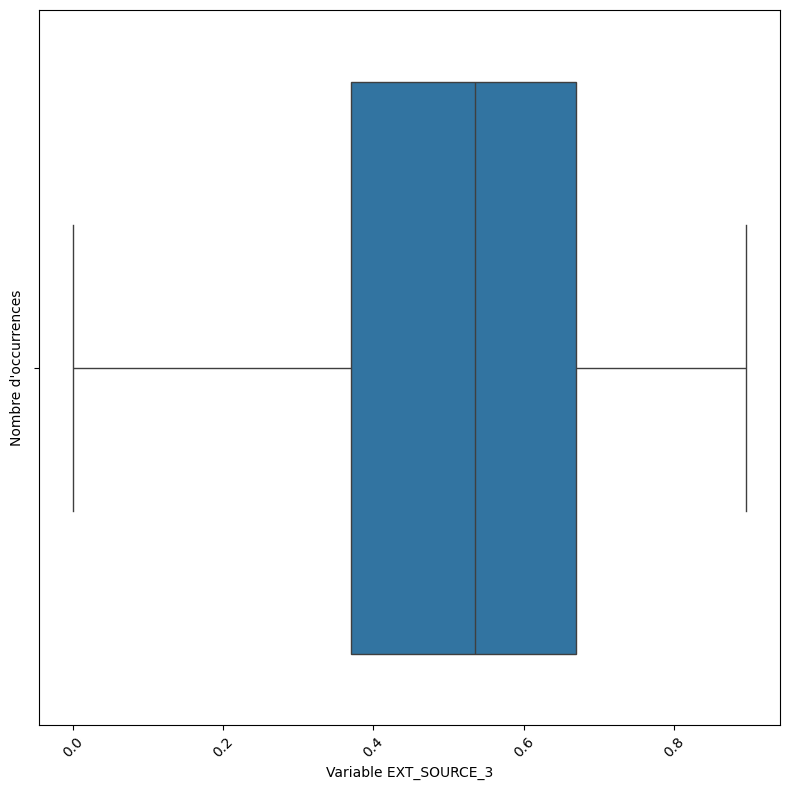

****************************************************VARIABLE APARTMENTS_AVG****************************************************


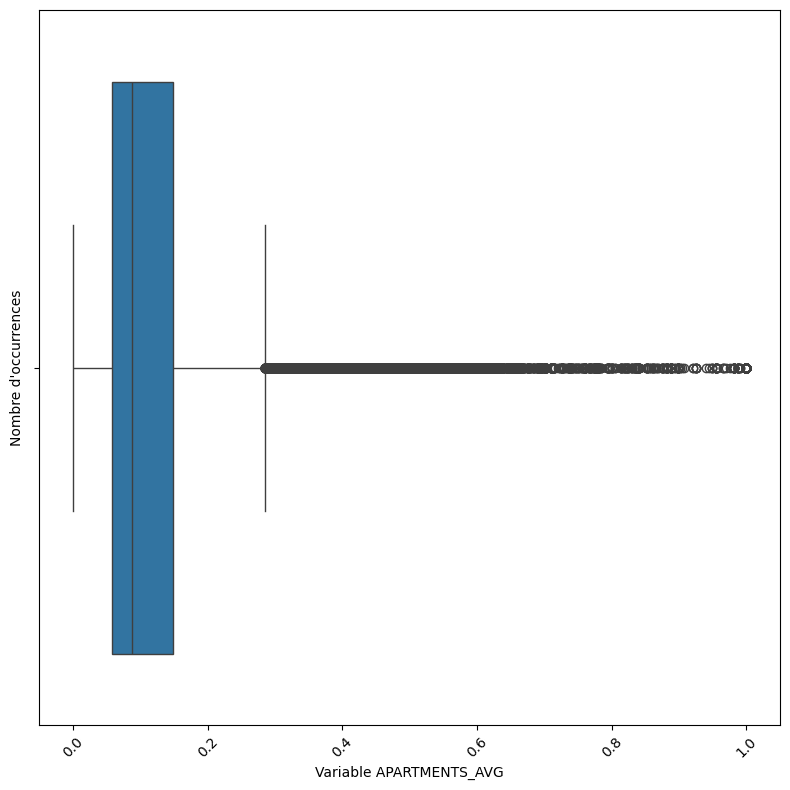

****************************************************VARIABLE BASEMENTAREA_AVG****************************************************


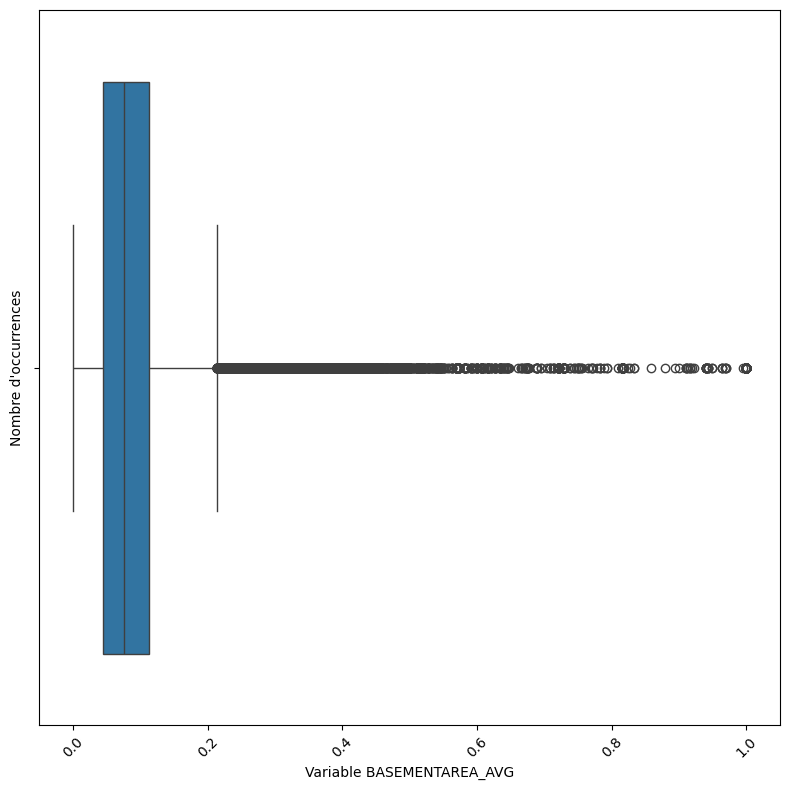

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_AVG****************************************************


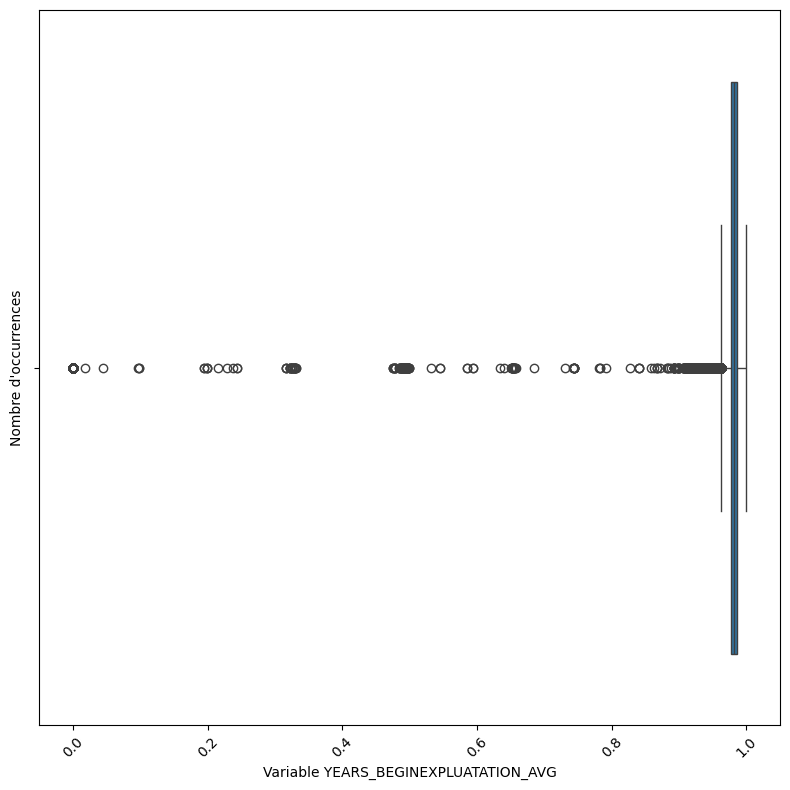

****************************************************VARIABLE YEARS_BUILD_AVG****************************************************


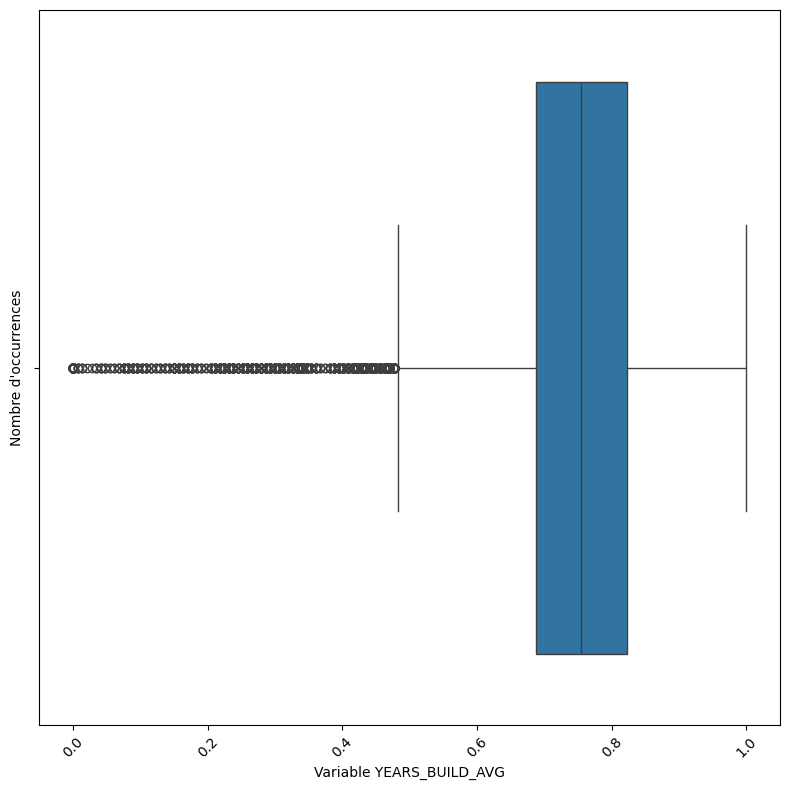

****************************************************VARIABLE COMMONAREA_AVG****************************************************


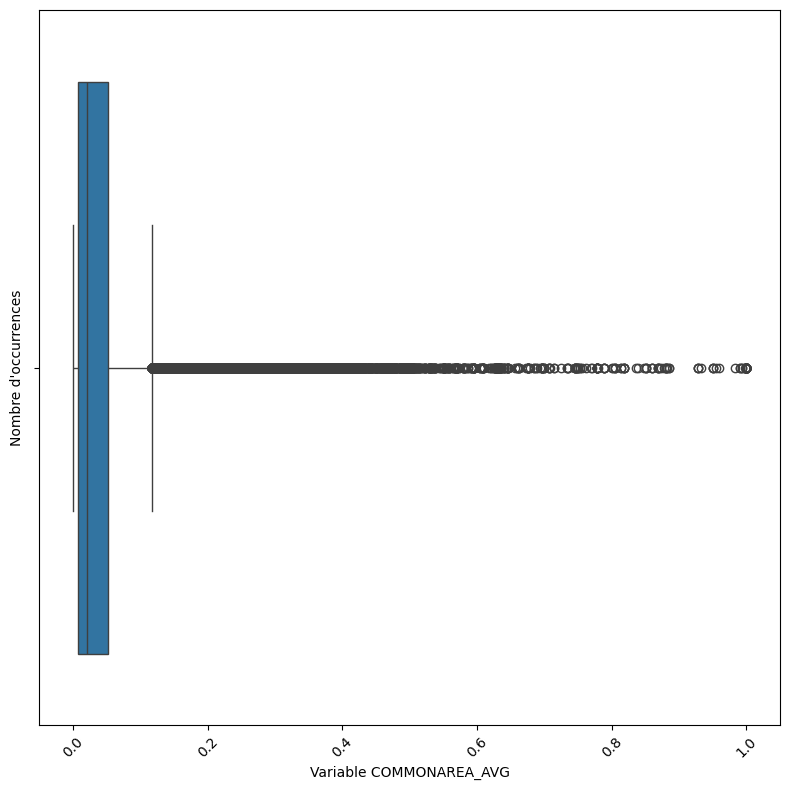

****************************************************VARIABLE ELEVATORS_AVG****************************************************


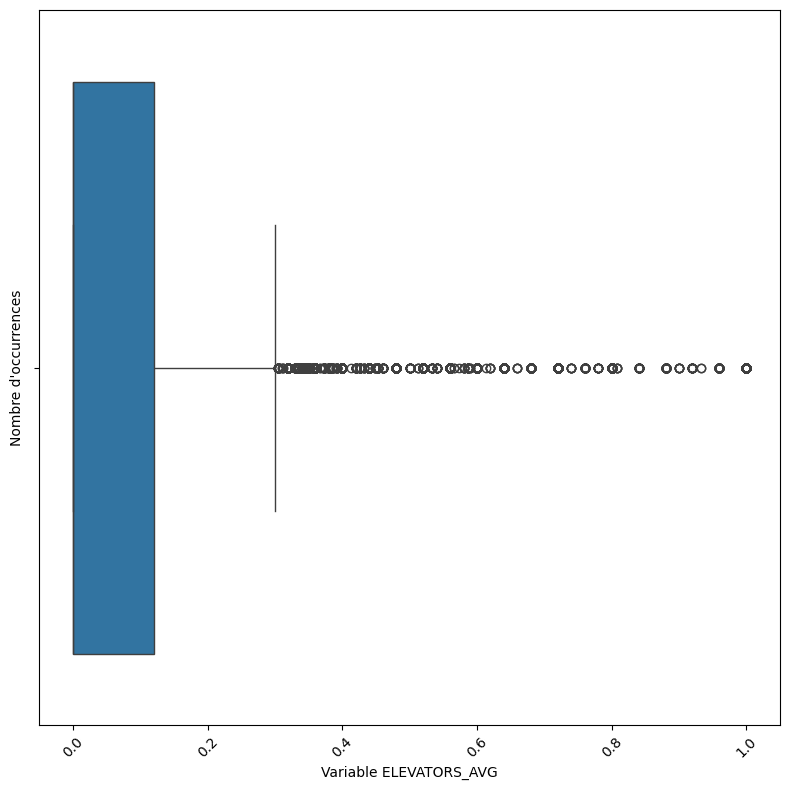

****************************************************VARIABLE ENTRANCES_AVG****************************************************


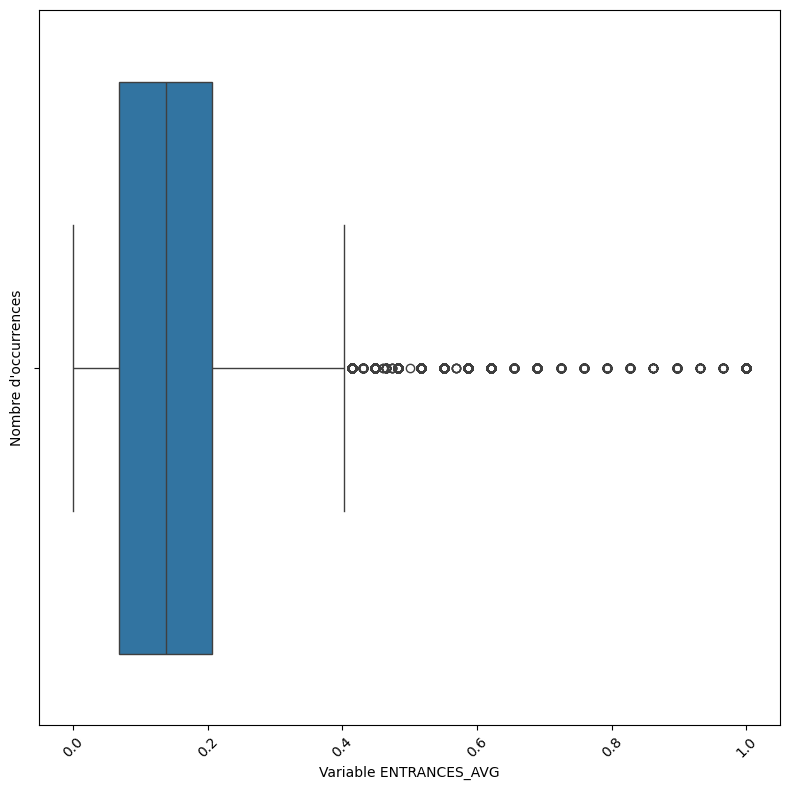

****************************************************VARIABLE FLOORSMAX_AVG****************************************************


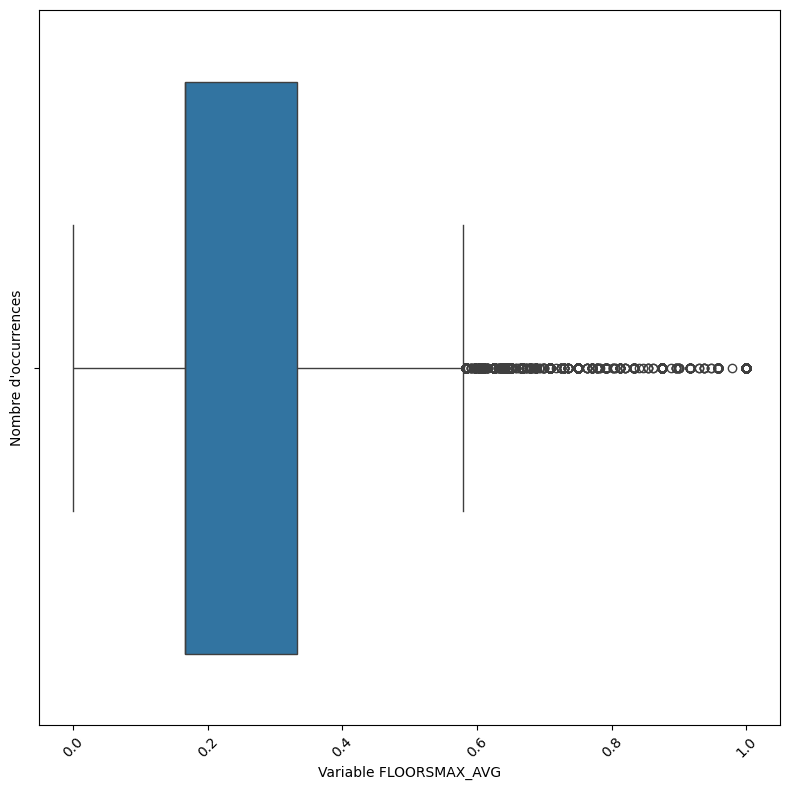

****************************************************VARIABLE FLOORSMIN_AVG****************************************************


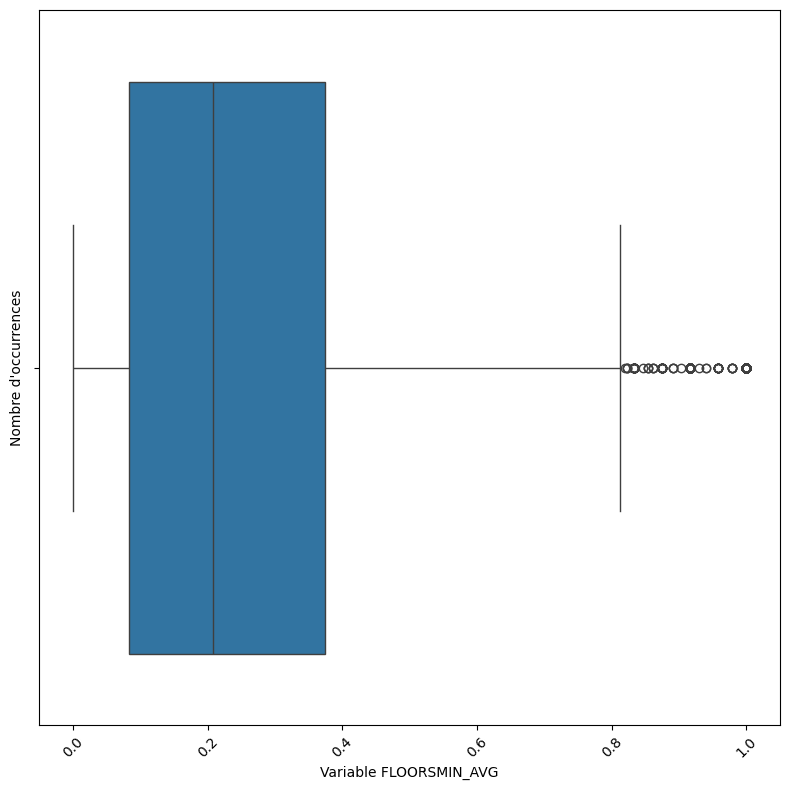

****************************************************VARIABLE LANDAREA_AVG****************************************************


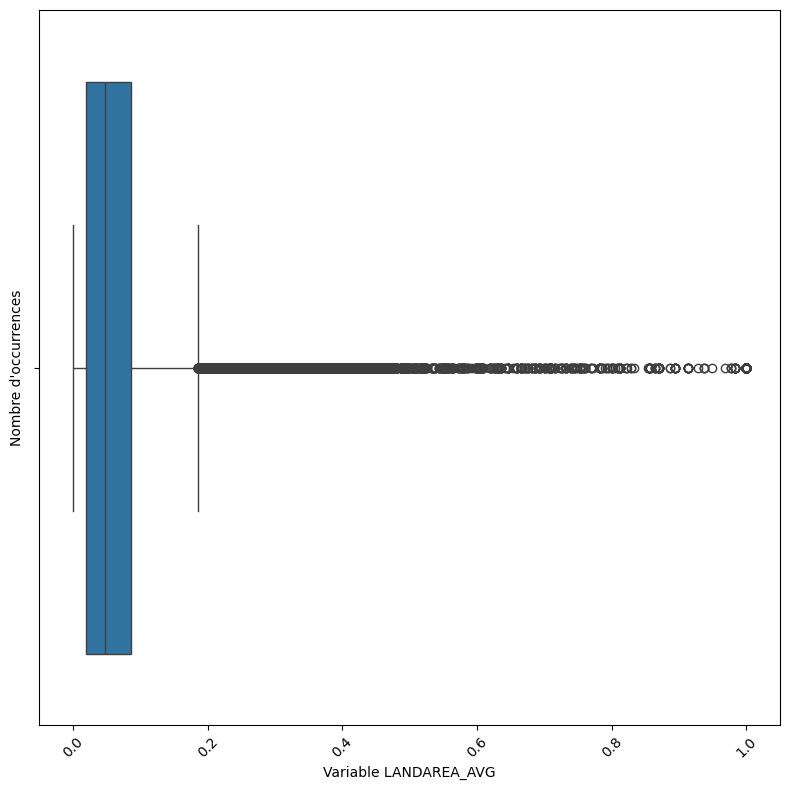

****************************************************VARIABLE LIVINGAPARTMENTS_AVG****************************************************


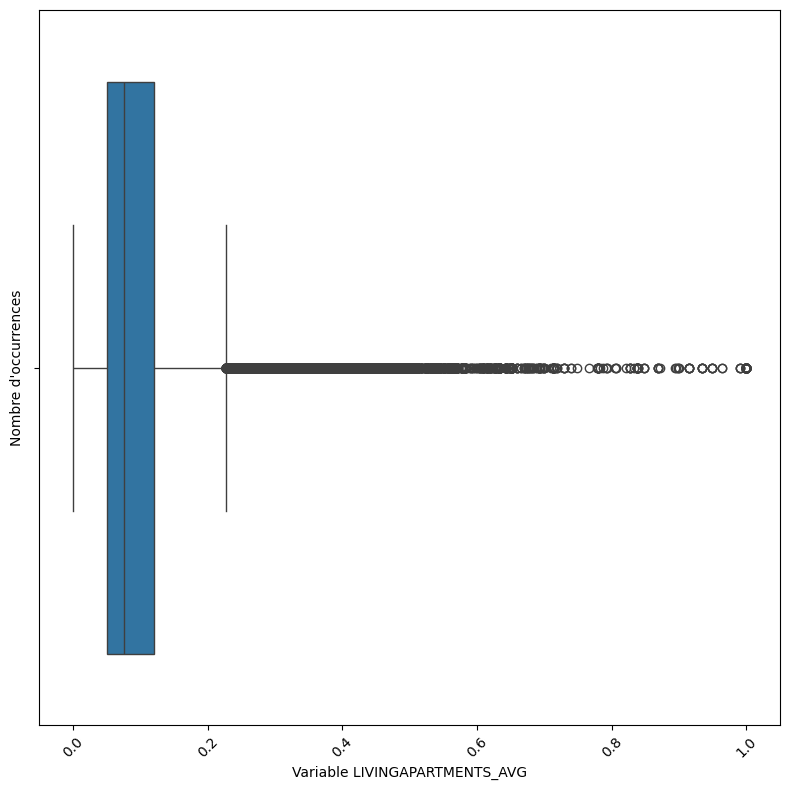

****************************************************VARIABLE LIVINGAREA_AVG****************************************************


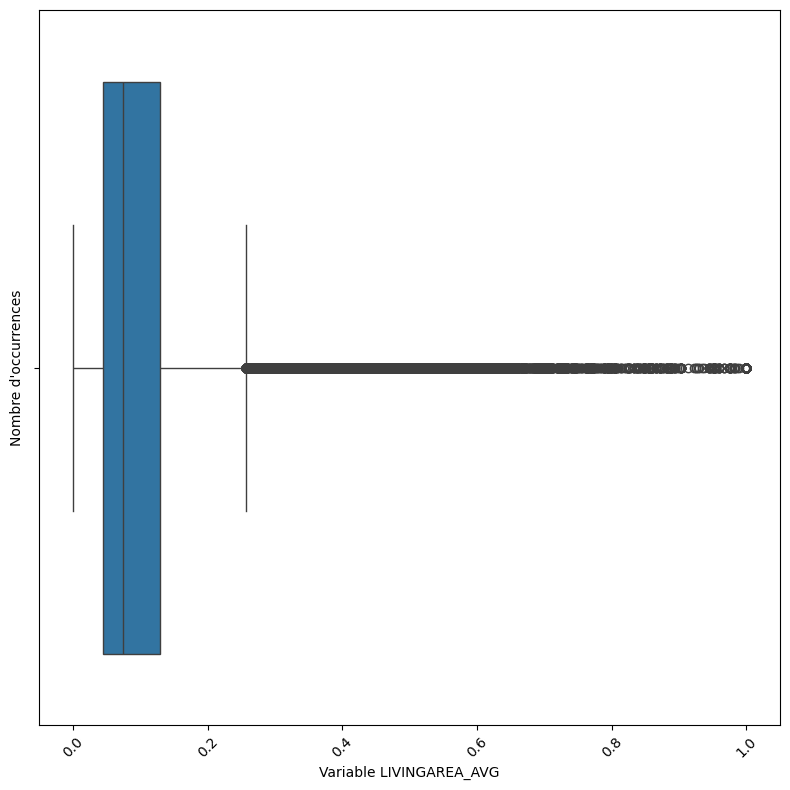

****************************************************VARIABLE NONLIVINGAPARTMENTS_AVG****************************************************


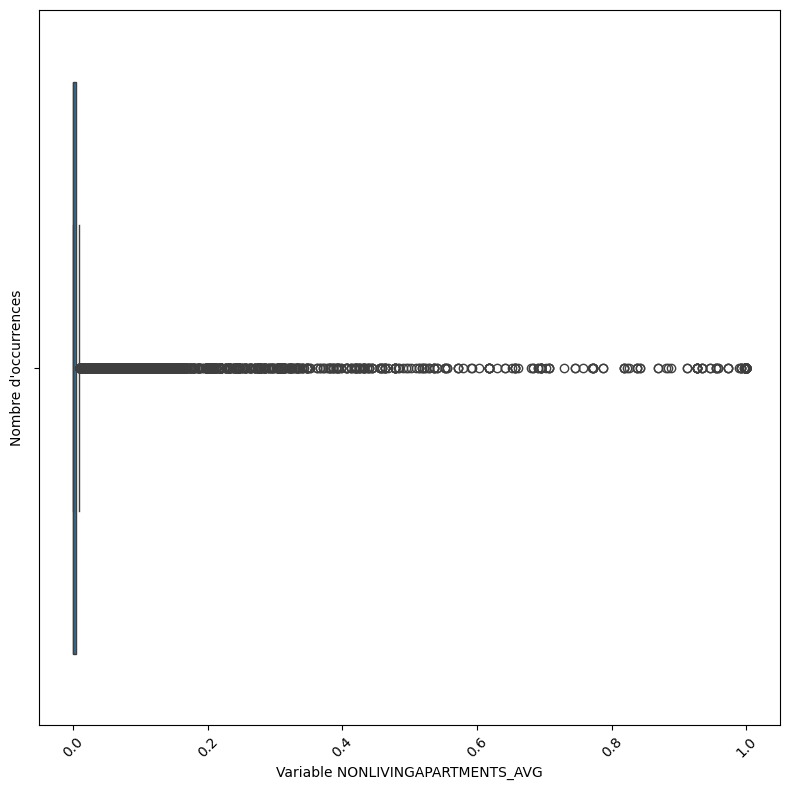

****************************************************VARIABLE NONLIVINGAREA_AVG****************************************************


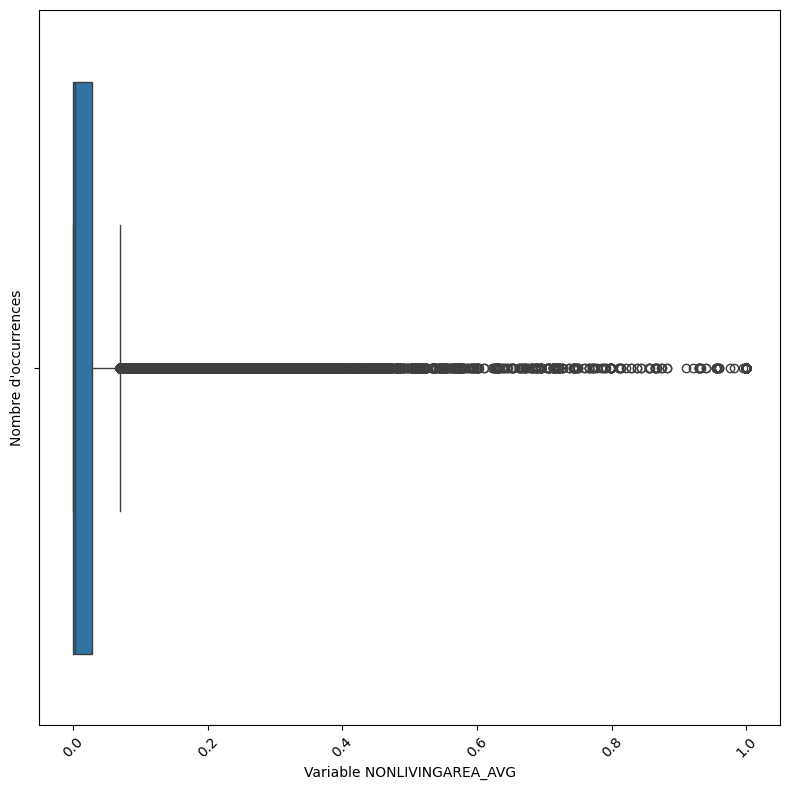

****************************************************VARIABLE APARTMENTS_MODE****************************************************


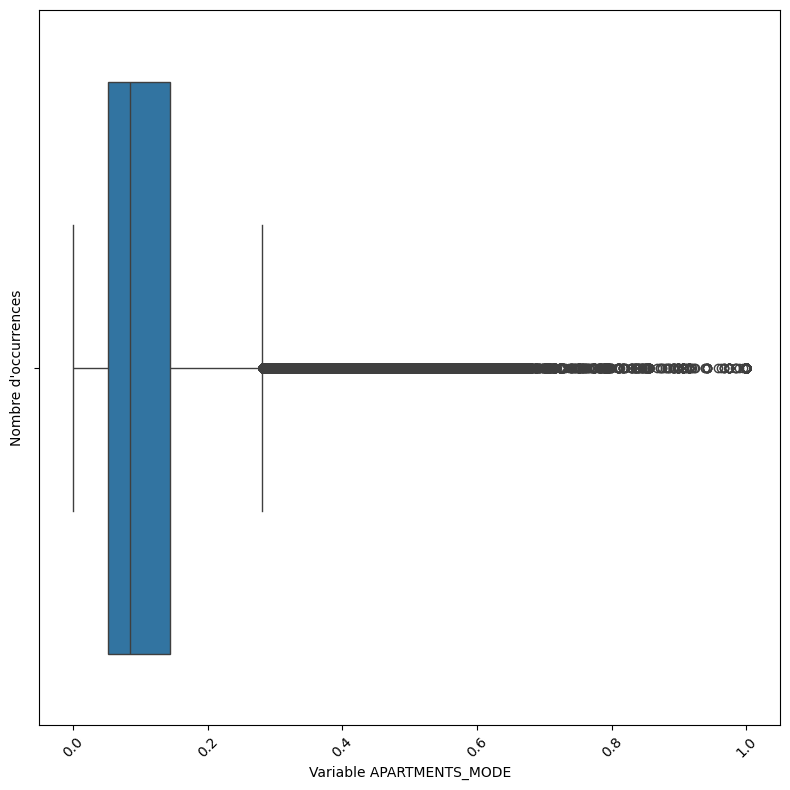

****************************************************VARIABLE BASEMENTAREA_MODE****************************************************


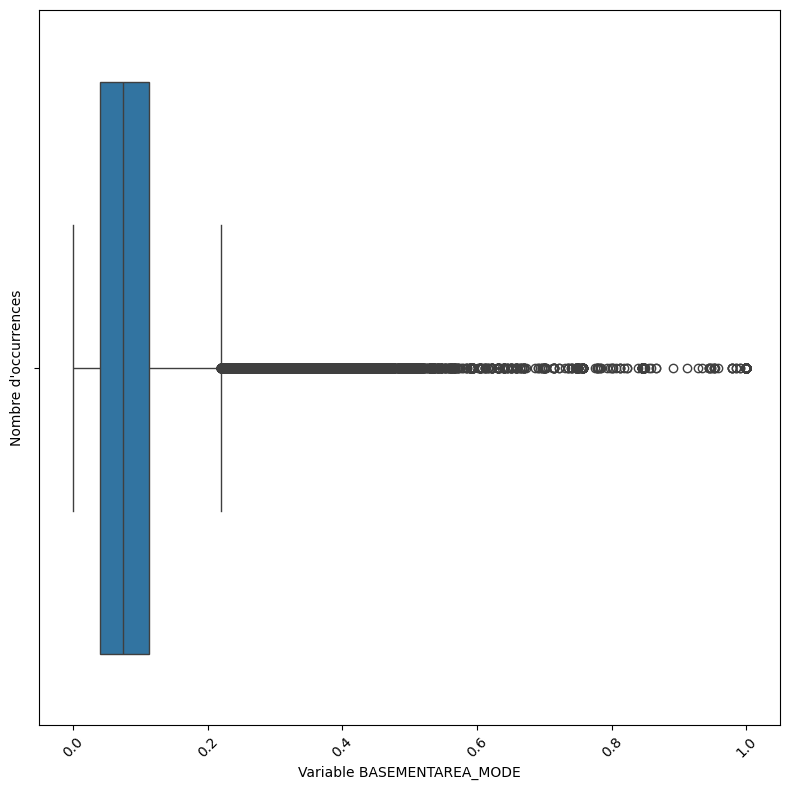

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_MODE****************************************************


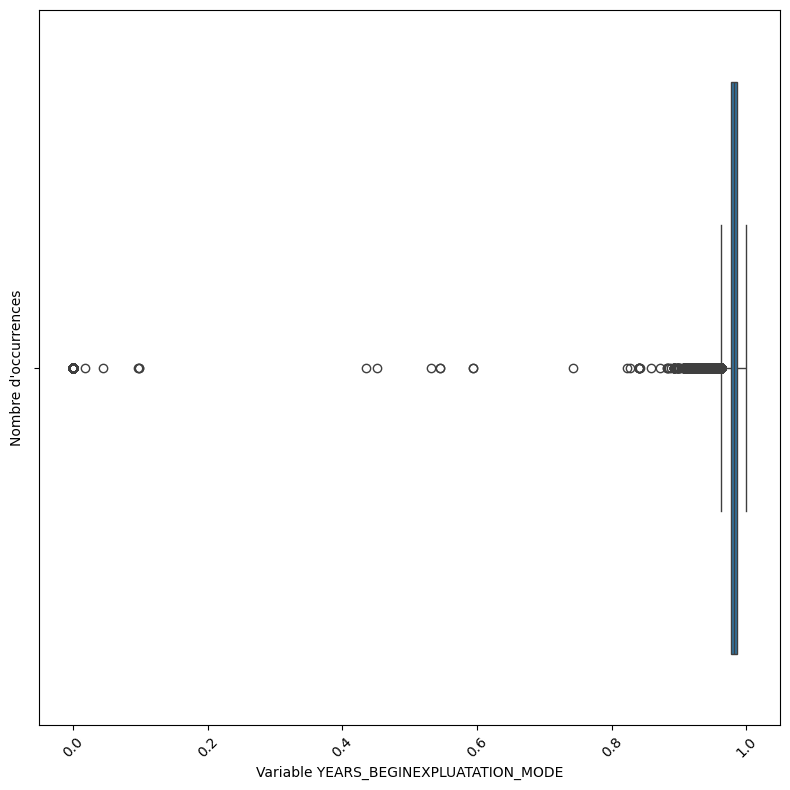

****************************************************VARIABLE YEARS_BUILD_MODE****************************************************


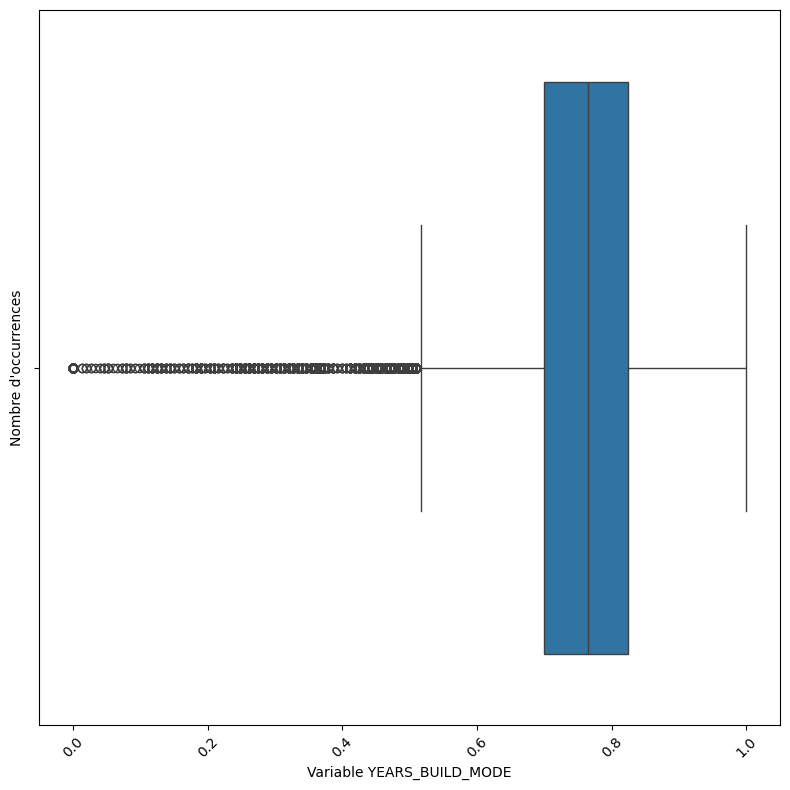

****************************************************VARIABLE COMMONAREA_MODE****************************************************


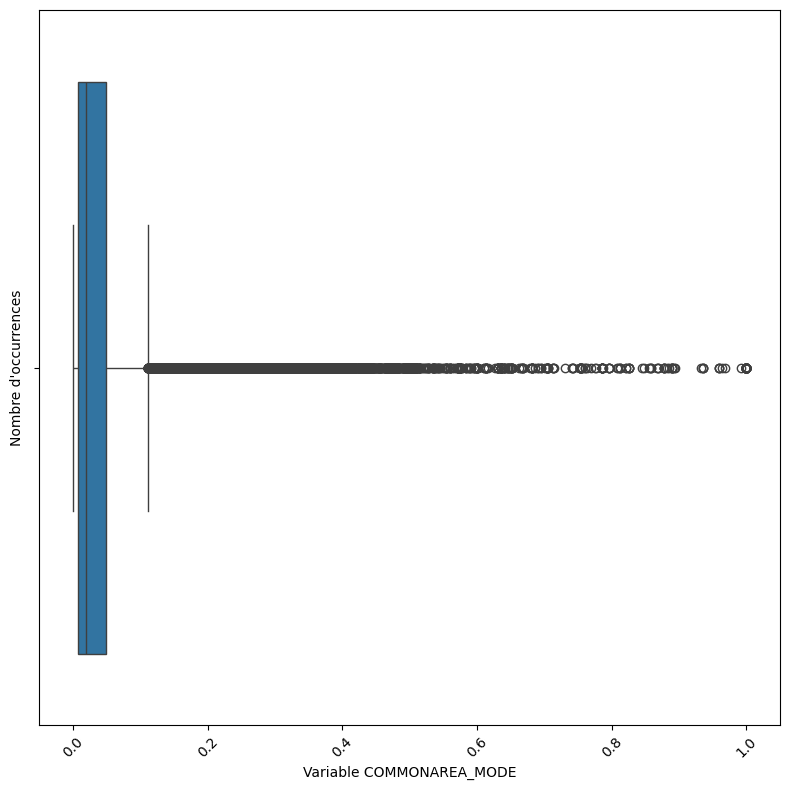

****************************************************VARIABLE ELEVATORS_MODE****************************************************


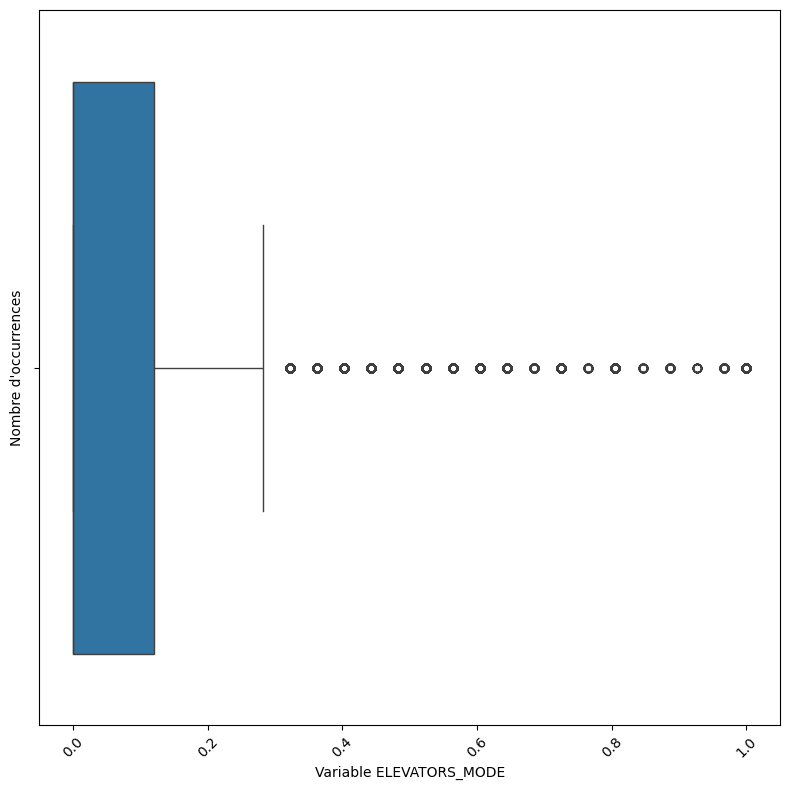

****************************************************VARIABLE ENTRANCES_MODE****************************************************


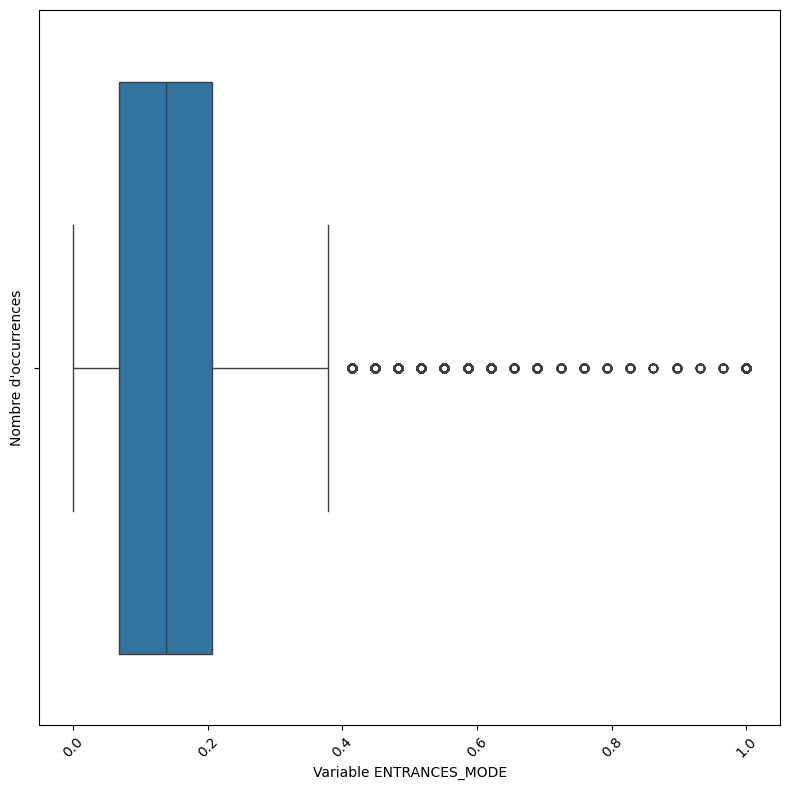

****************************************************VARIABLE FLOORSMAX_MODE****************************************************


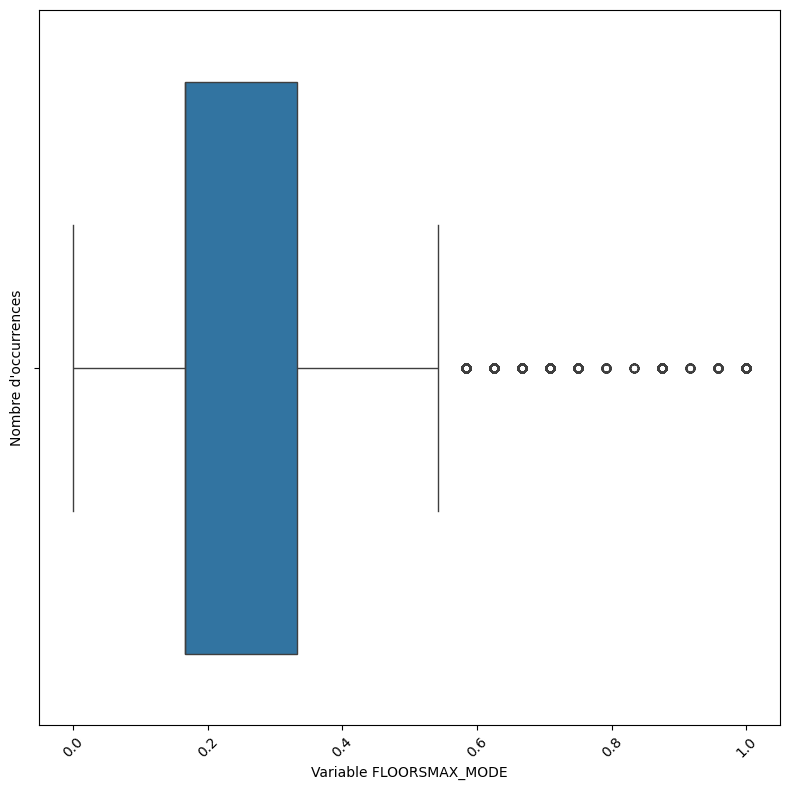

****************************************************VARIABLE FLOORSMIN_MODE****************************************************


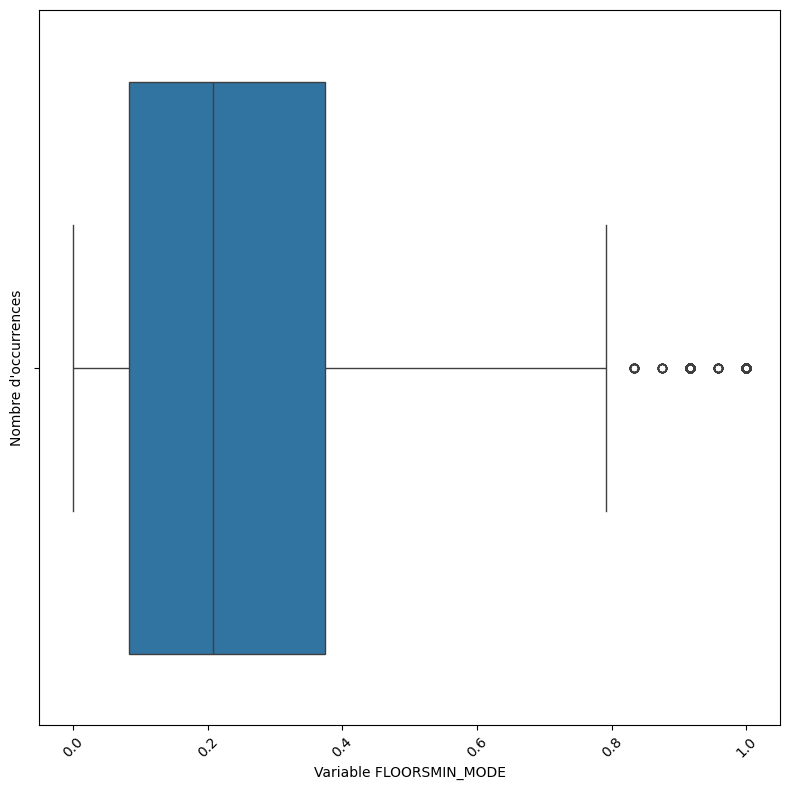

****************************************************VARIABLE LANDAREA_MODE****************************************************


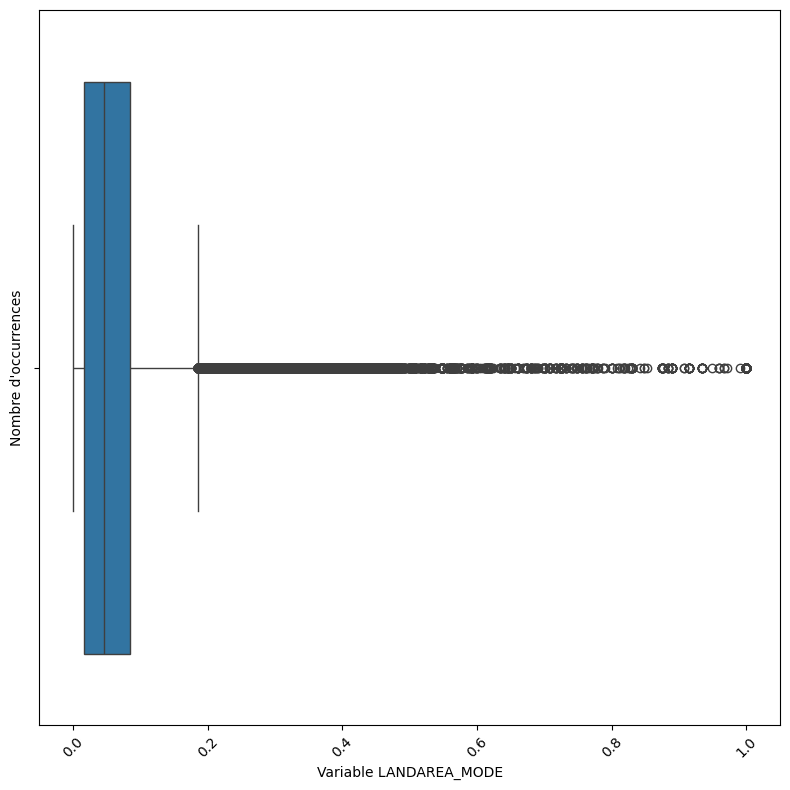

****************************************************VARIABLE LIVINGAPARTMENTS_MODE****************************************************


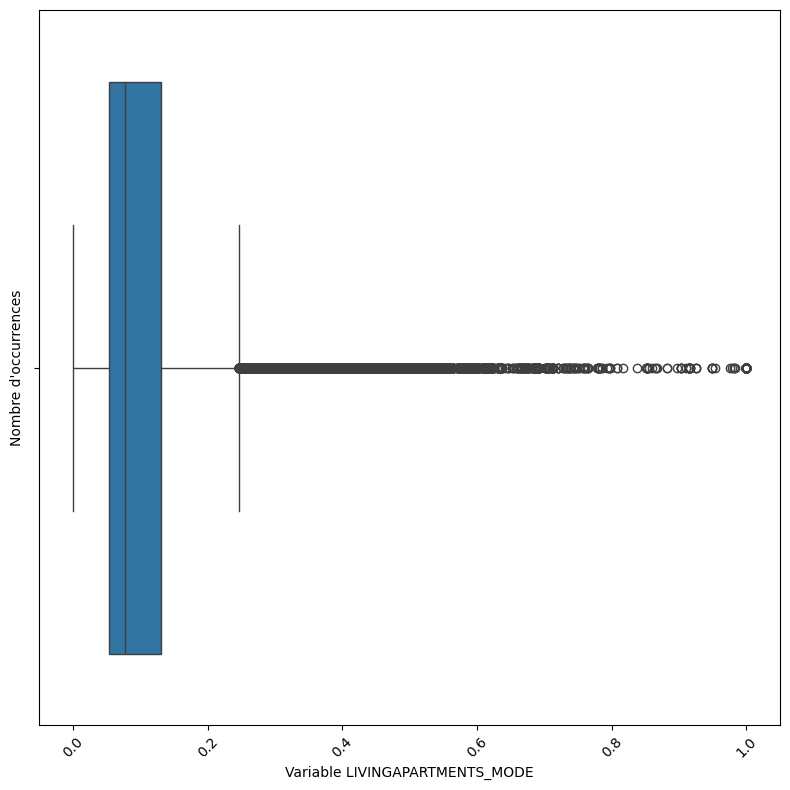

****************************************************VARIABLE LIVINGAREA_MODE****************************************************


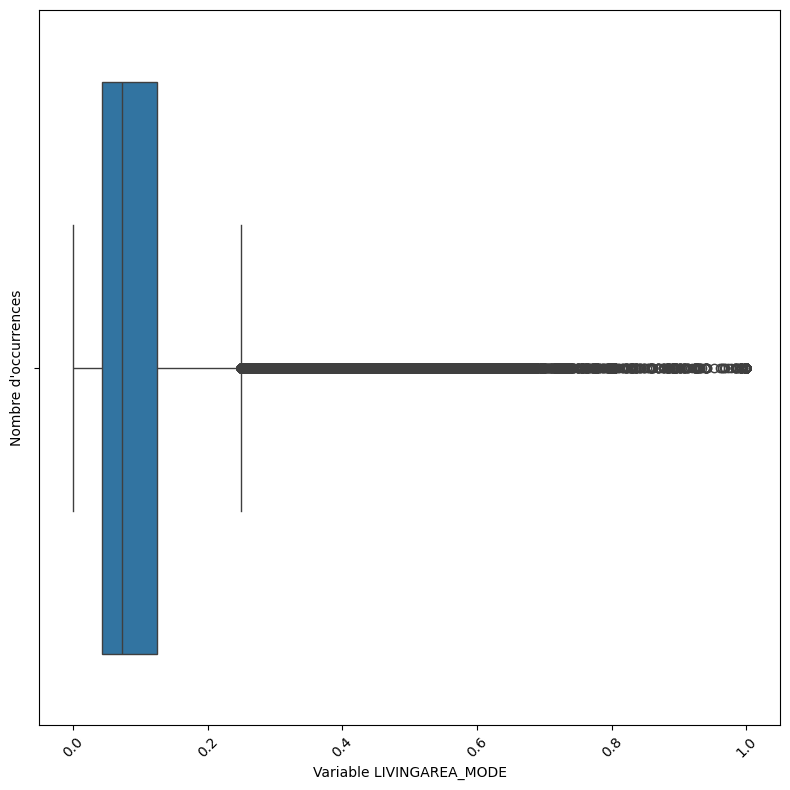

****************************************************VARIABLE NONLIVINGAPARTMENTS_MODE****************************************************


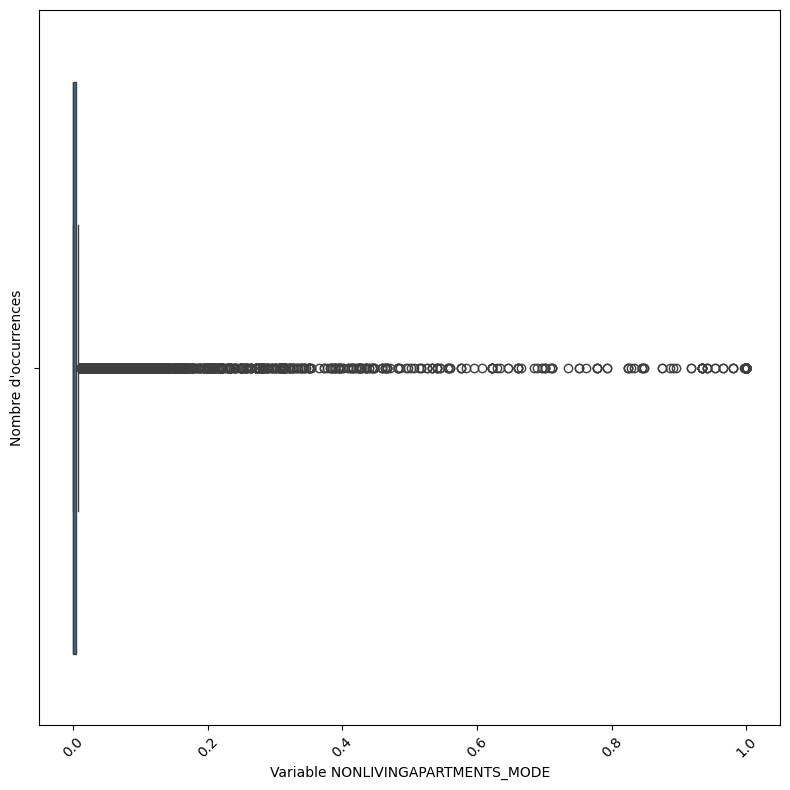

****************************************************VARIABLE NONLIVINGAREA_MODE****************************************************


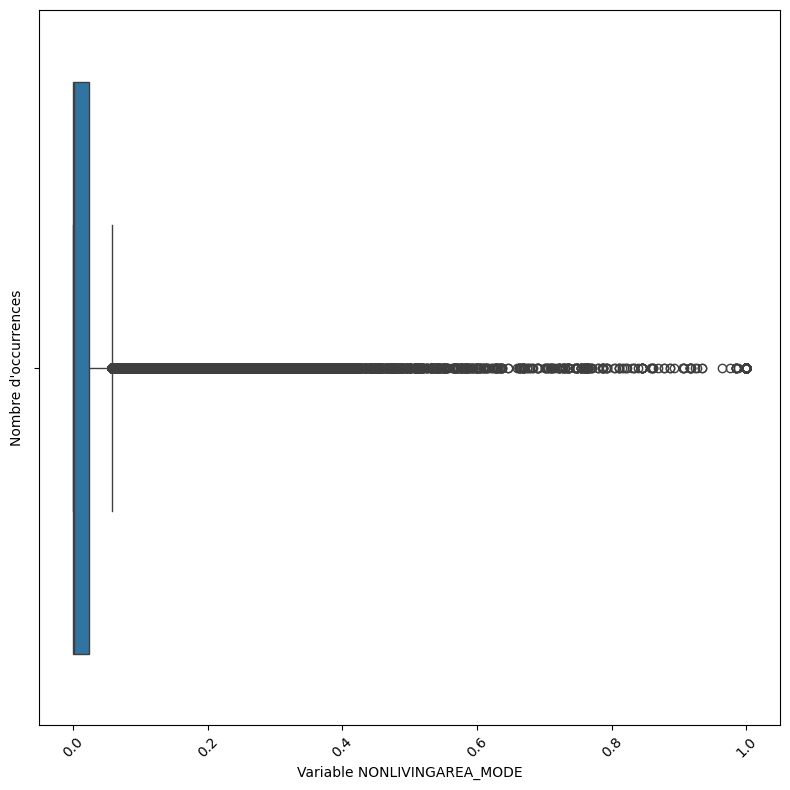

****************************************************VARIABLE APARTMENTS_MEDI****************************************************


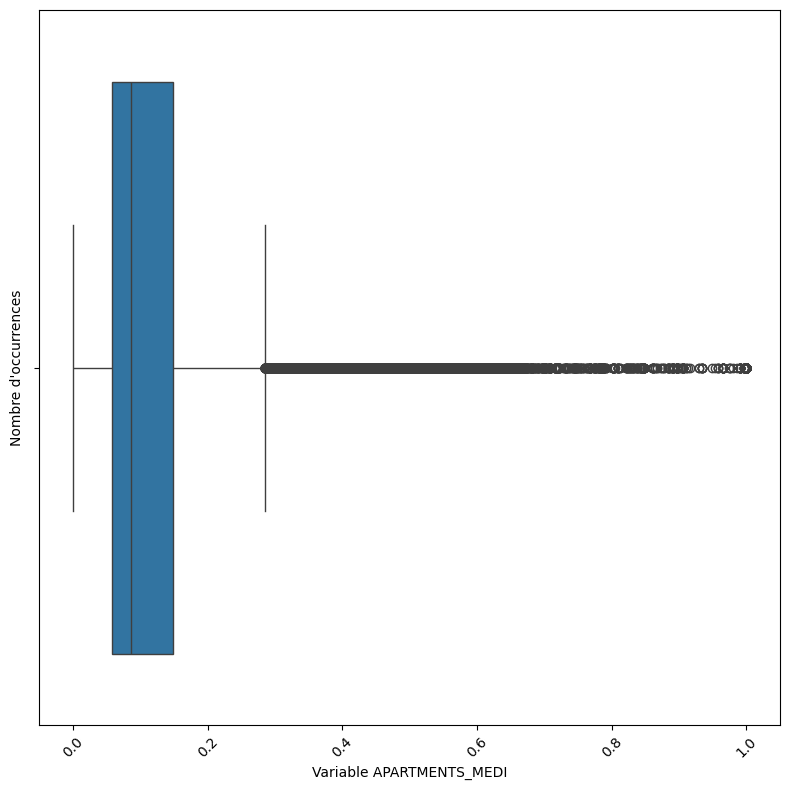

****************************************************VARIABLE BASEMENTAREA_MEDI****************************************************


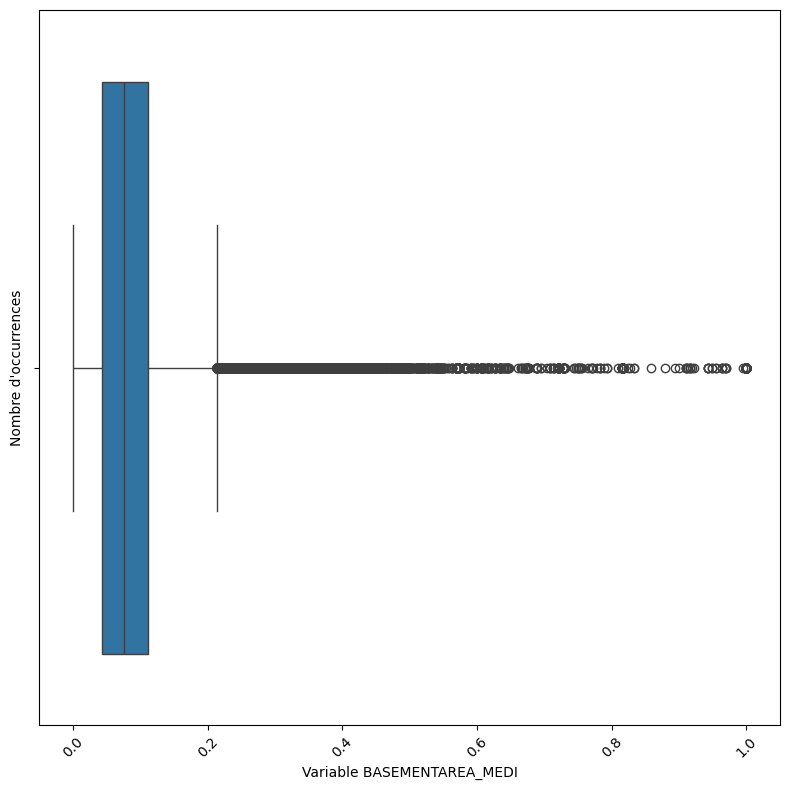

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_MEDI****************************************************


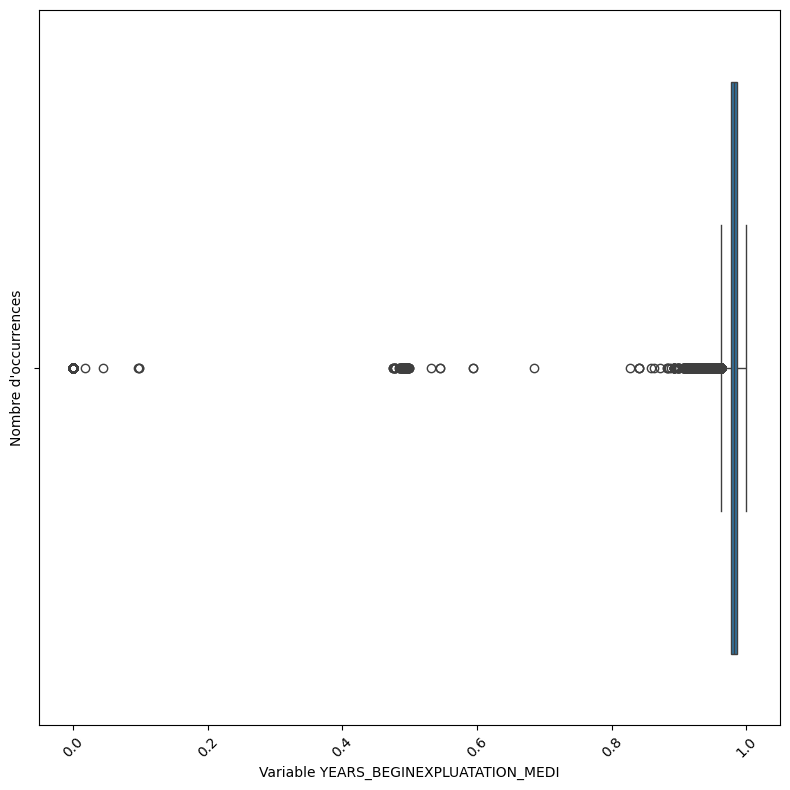

****************************************************VARIABLE YEARS_BUILD_MEDI****************************************************


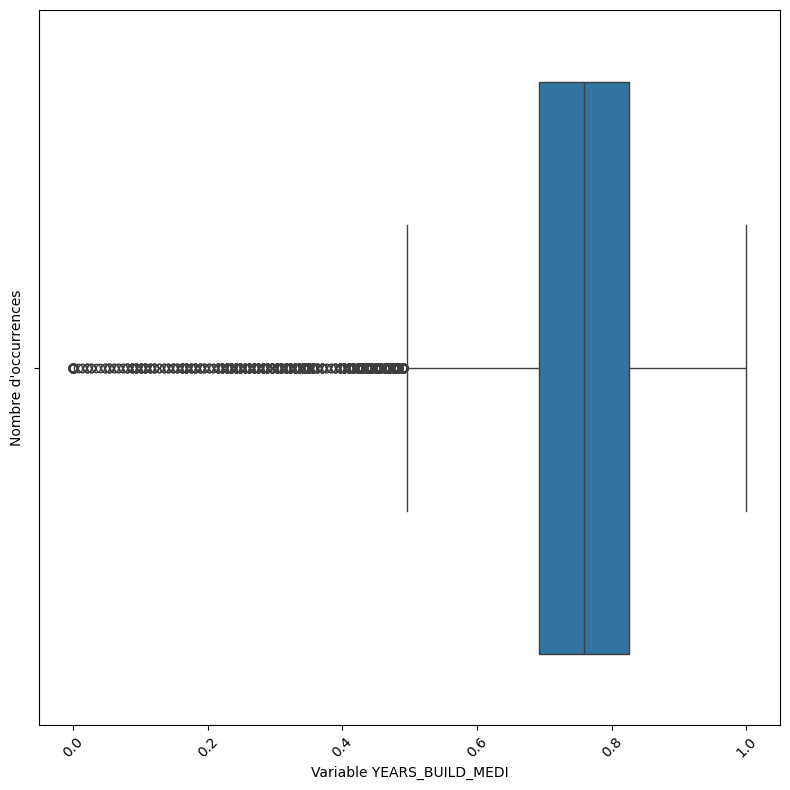

****************************************************VARIABLE COMMONAREA_MEDI****************************************************


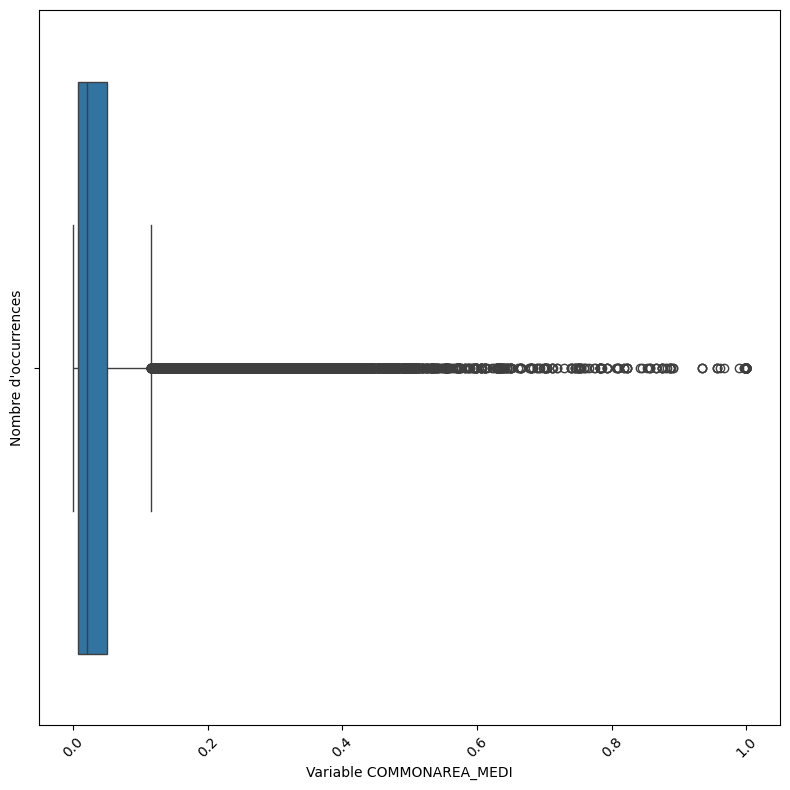

****************************************************VARIABLE ELEVATORS_MEDI****************************************************


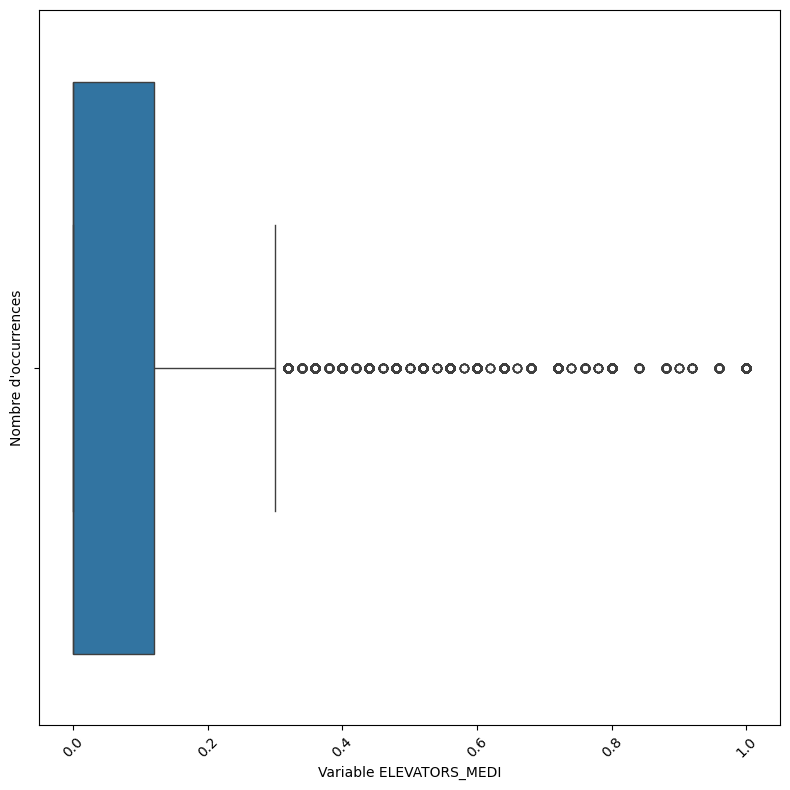

****************************************************VARIABLE ENTRANCES_MEDI****************************************************


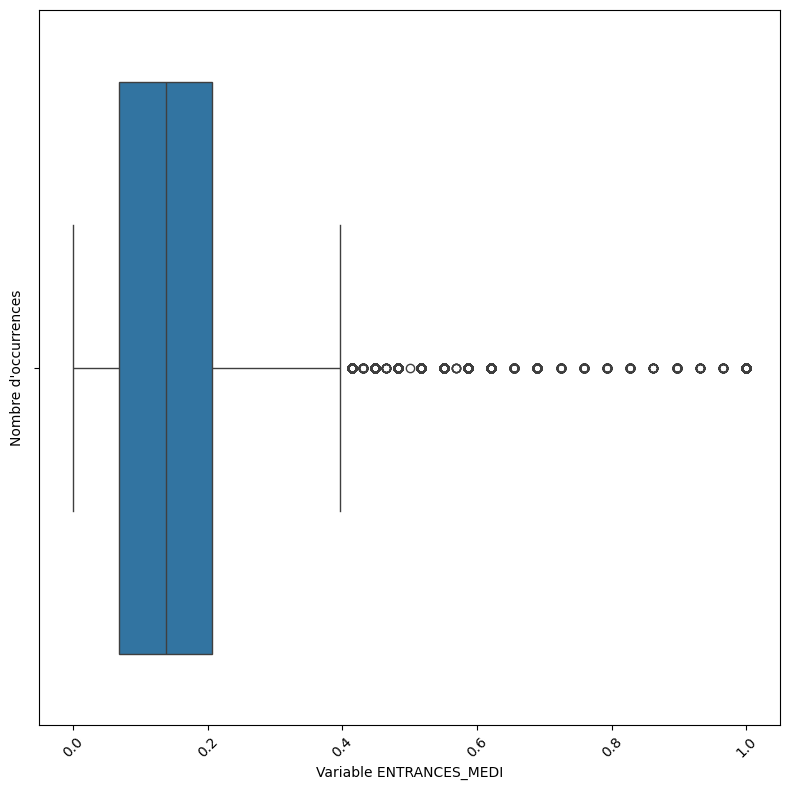

****************************************************VARIABLE FLOORSMAX_MEDI****************************************************


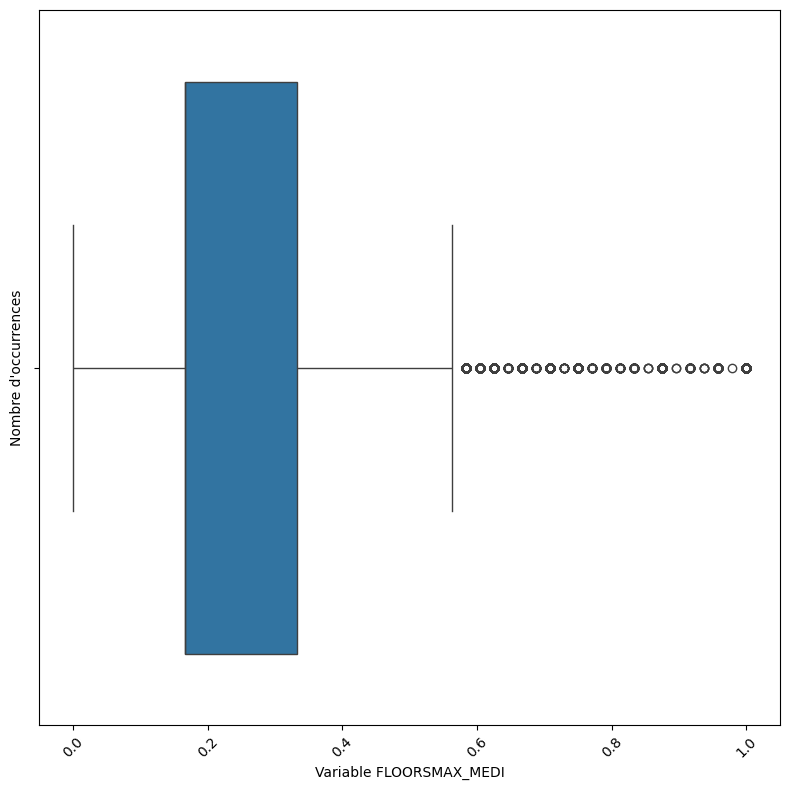

****************************************************VARIABLE FLOORSMIN_MEDI****************************************************


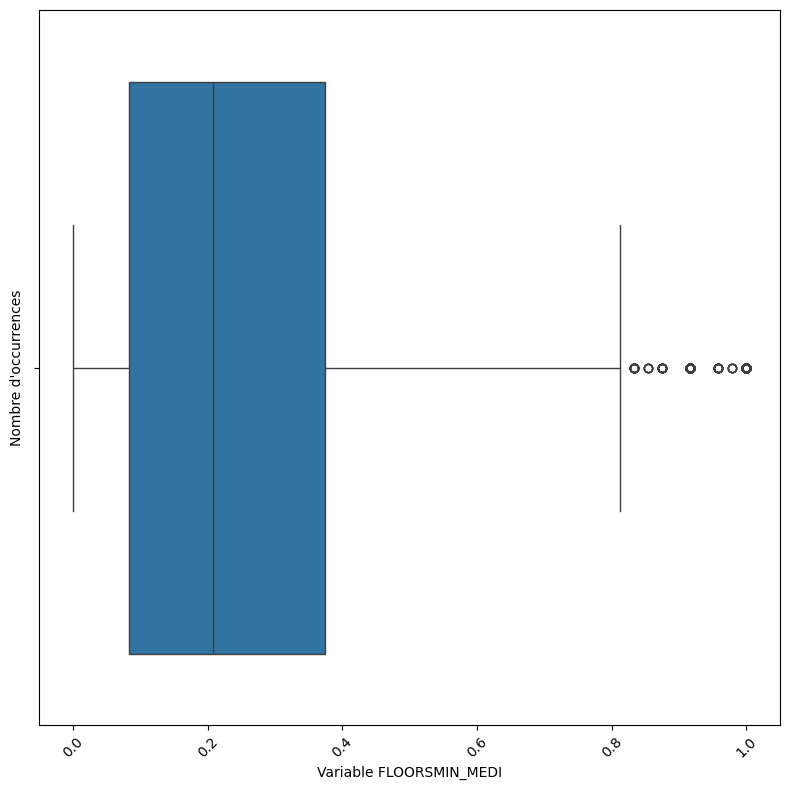

****************************************************VARIABLE LANDAREA_MEDI****************************************************


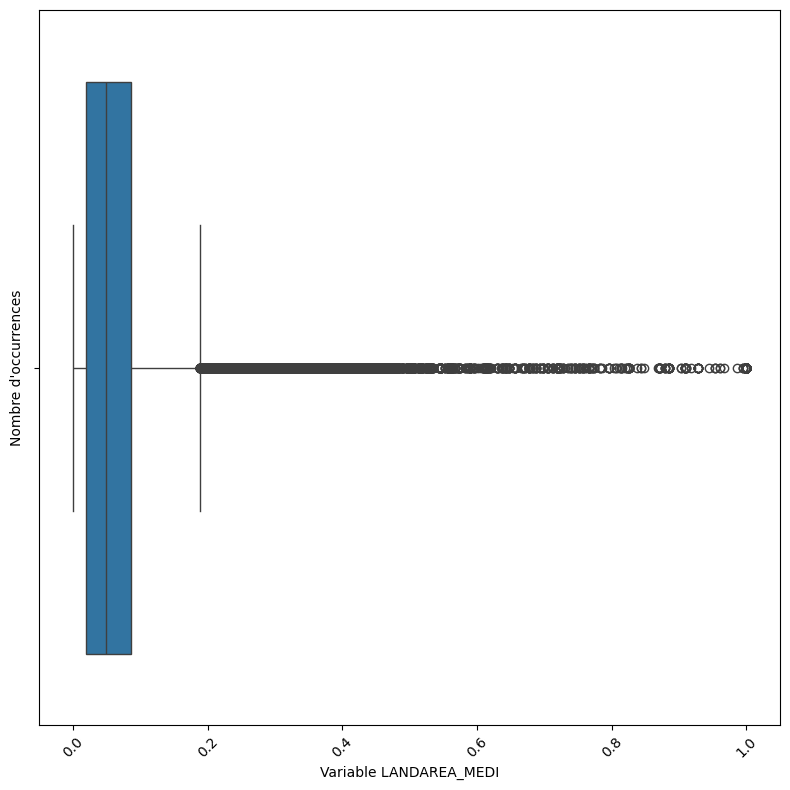

****************************************************VARIABLE LIVINGAPARTMENTS_MEDI****************************************************


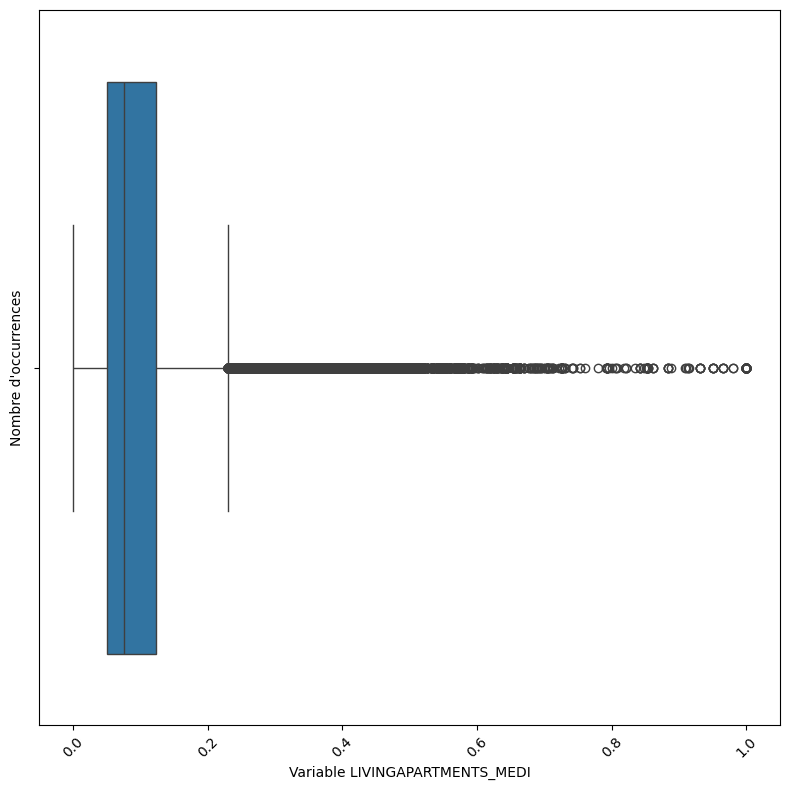

****************************************************VARIABLE LIVINGAREA_MEDI****************************************************


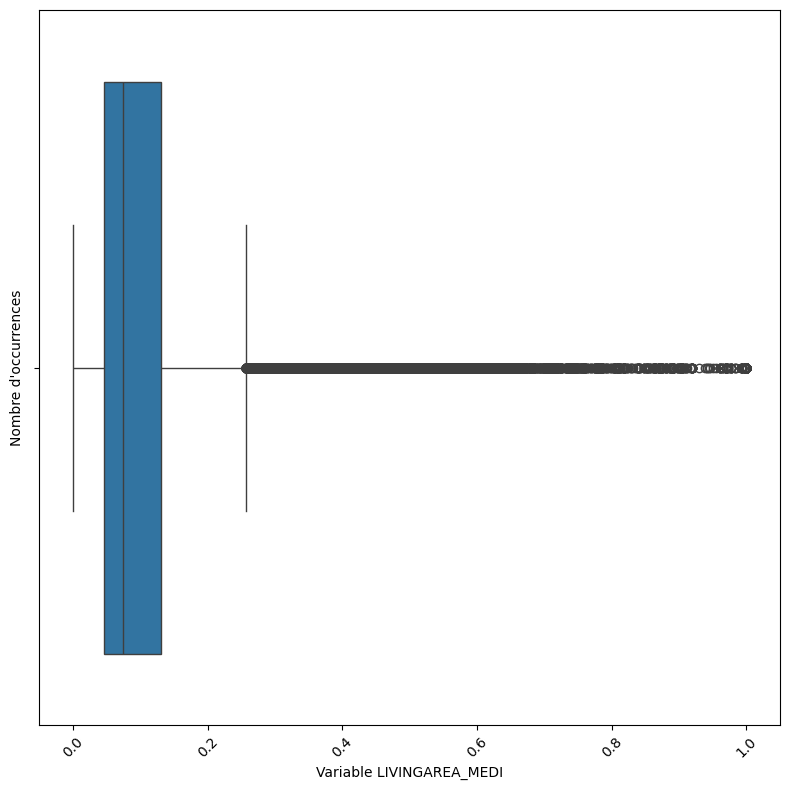

****************************************************VARIABLE NONLIVINGAPARTMENTS_MEDI****************************************************


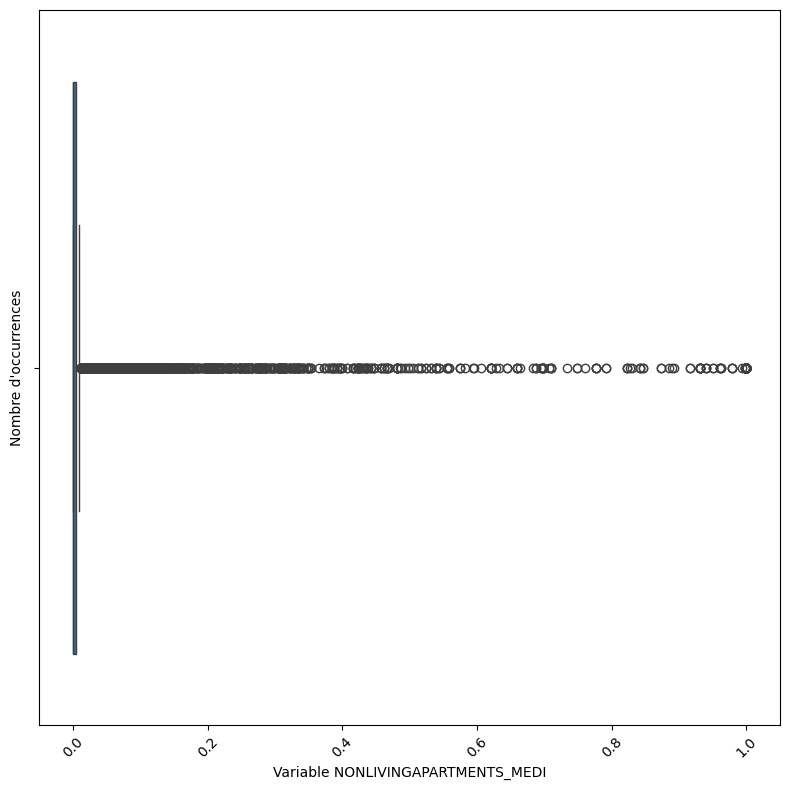

****************************************************VARIABLE NONLIVINGAREA_MEDI****************************************************


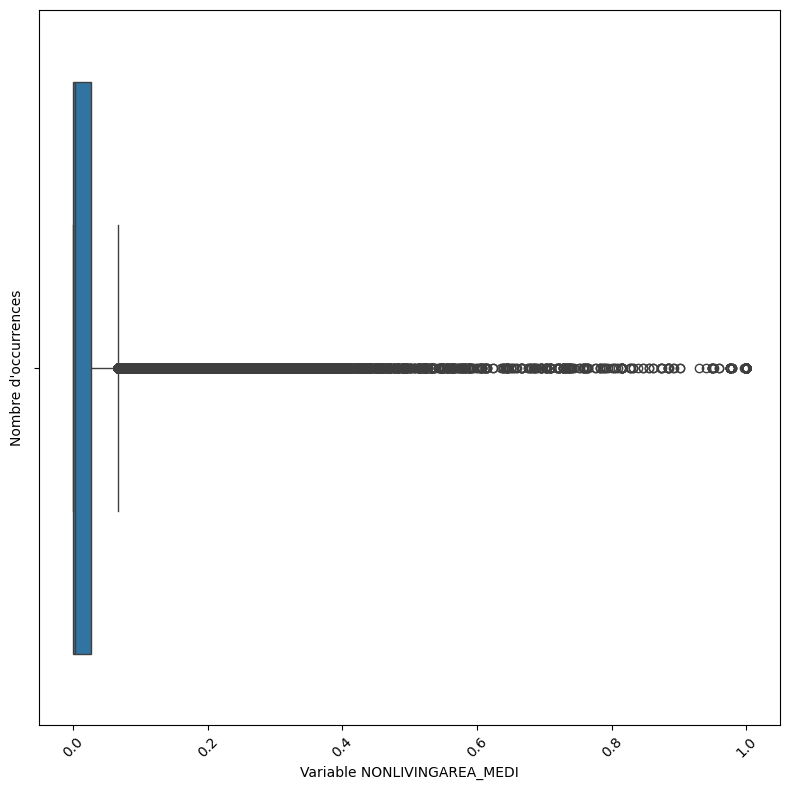

****************************************************VARIABLE TOTALAREA_MODE****************************************************


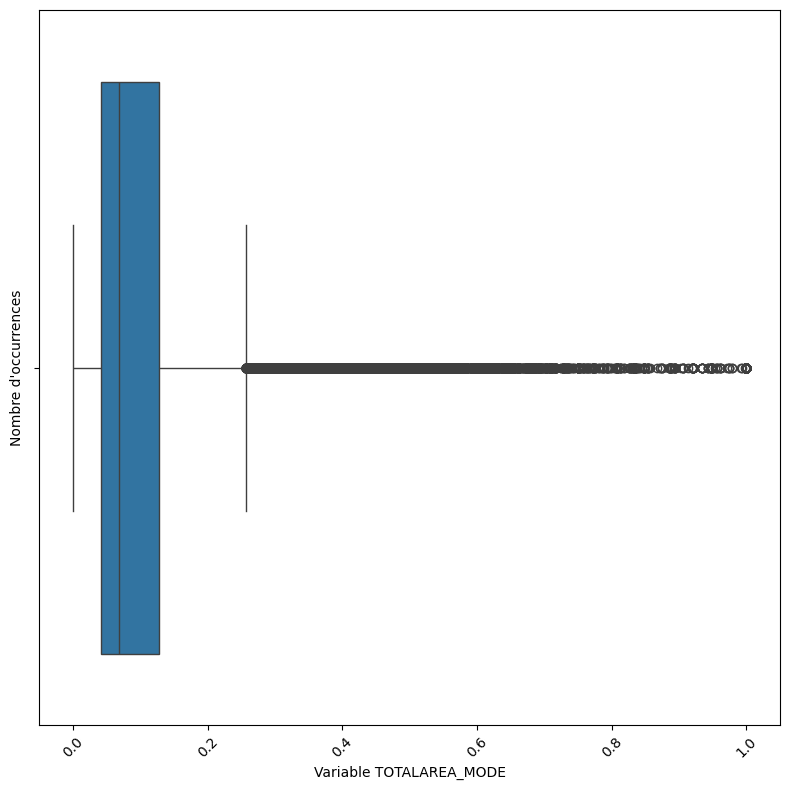

****************************************************VARIABLE OBS_30_CNT_SOCIAL_CIRCLE****************************************************


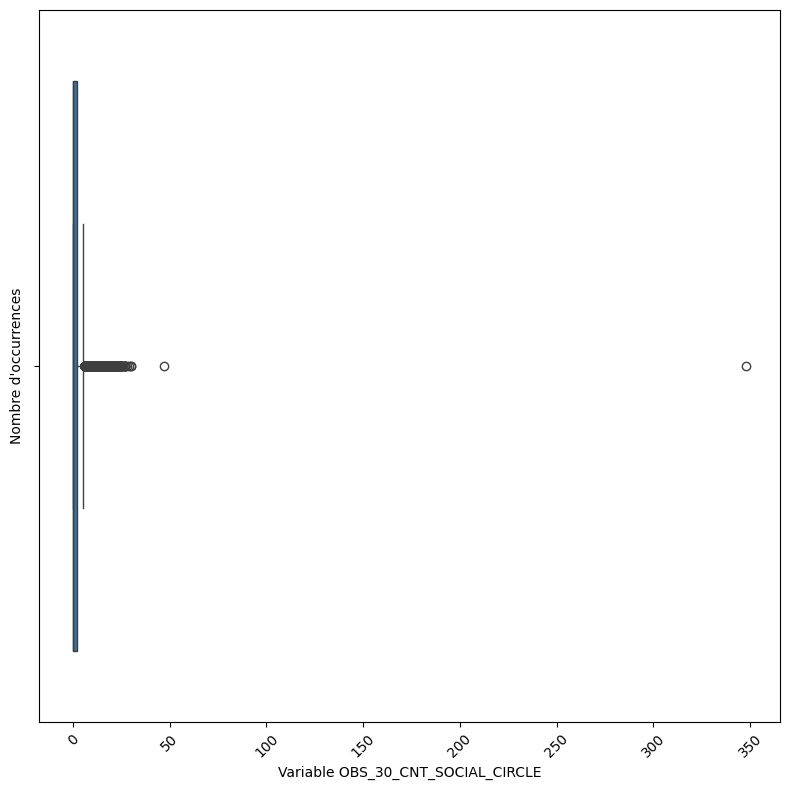

****************************************************VARIABLE DEF_30_CNT_SOCIAL_CIRCLE****************************************************


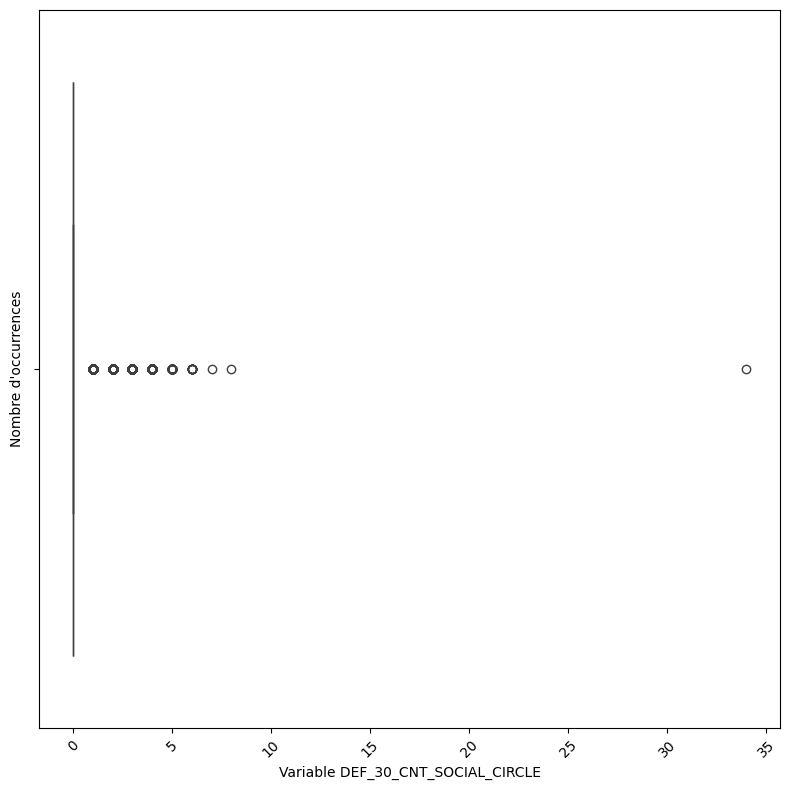

****************************************************VARIABLE OBS_60_CNT_SOCIAL_CIRCLE****************************************************


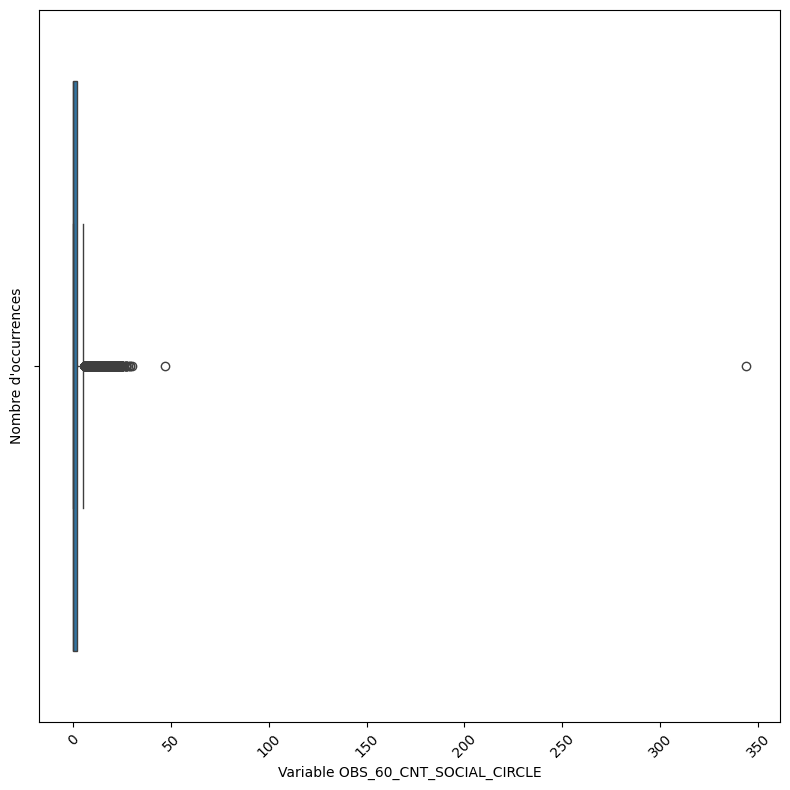

****************************************************VARIABLE DEF_60_CNT_SOCIAL_CIRCLE****************************************************


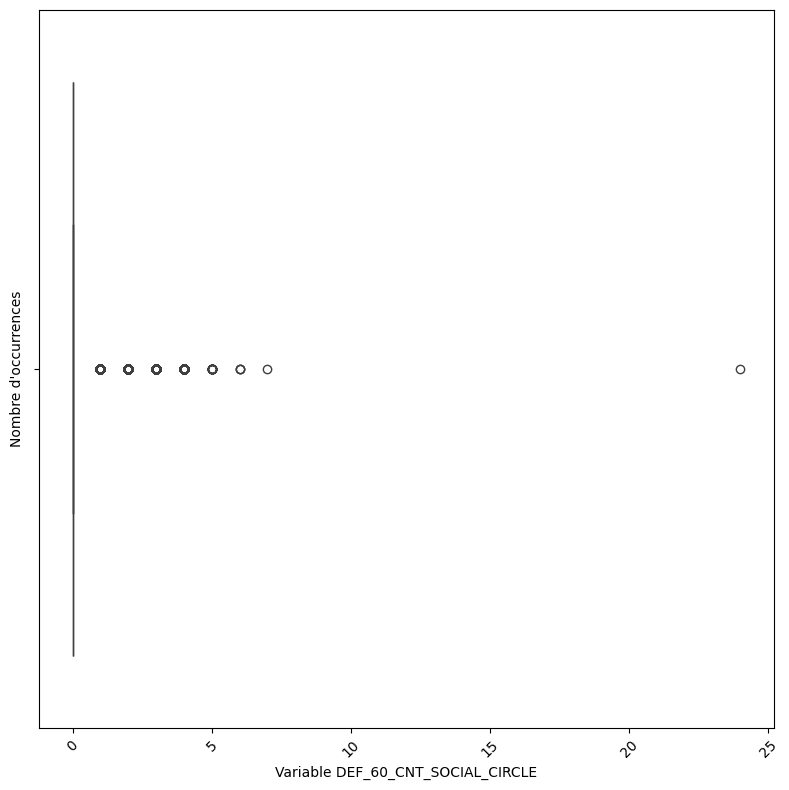

****************************************************VARIABLE DAYS_LAST_PHONE_CHANGE****************************************************


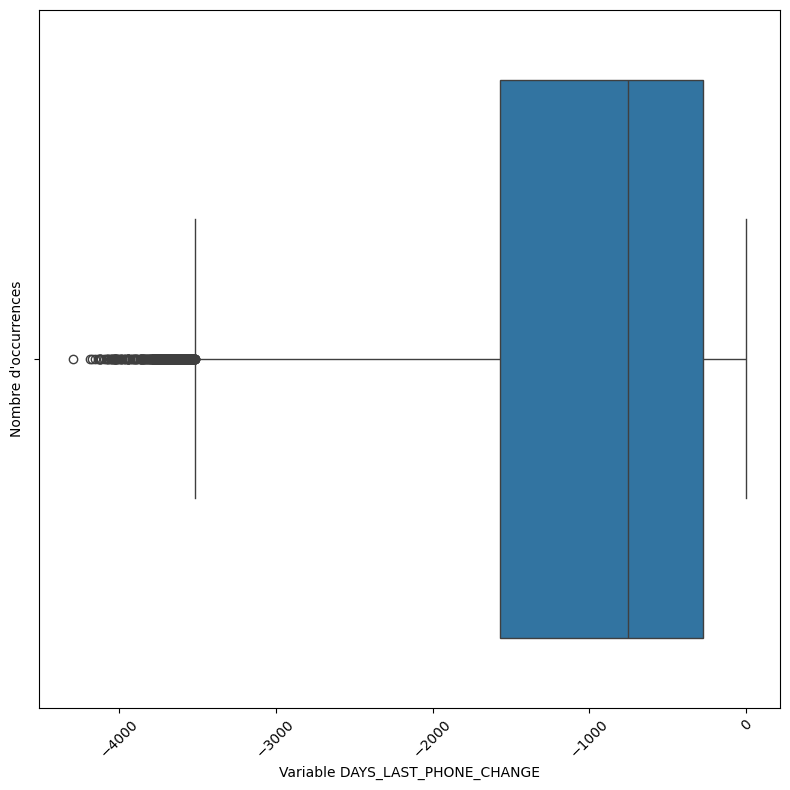

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_HOUR****************************************************


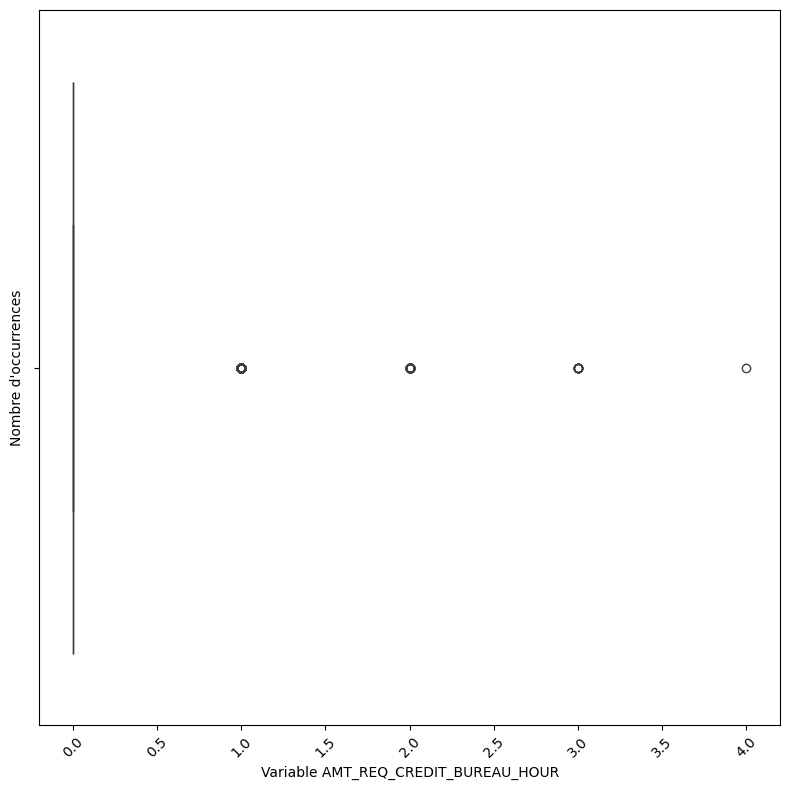

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_DAY****************************************************


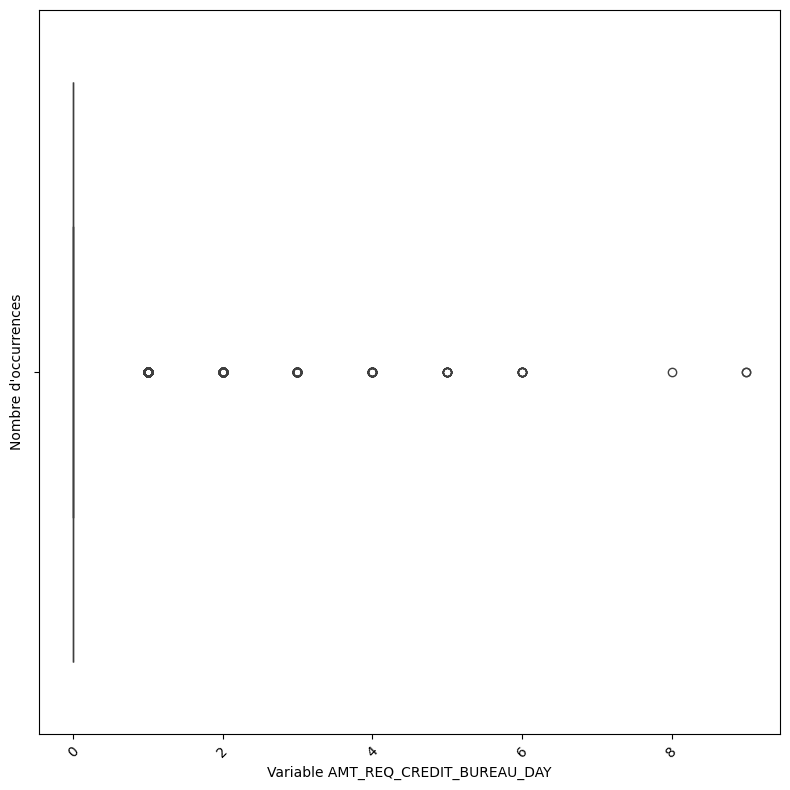

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_WEEK****************************************************


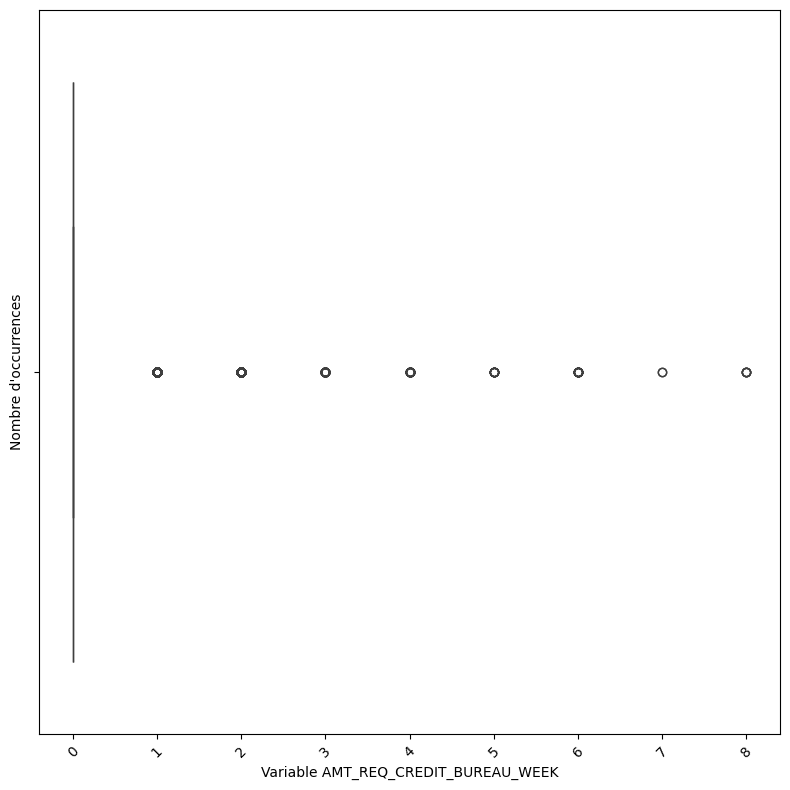

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_MON****************************************************


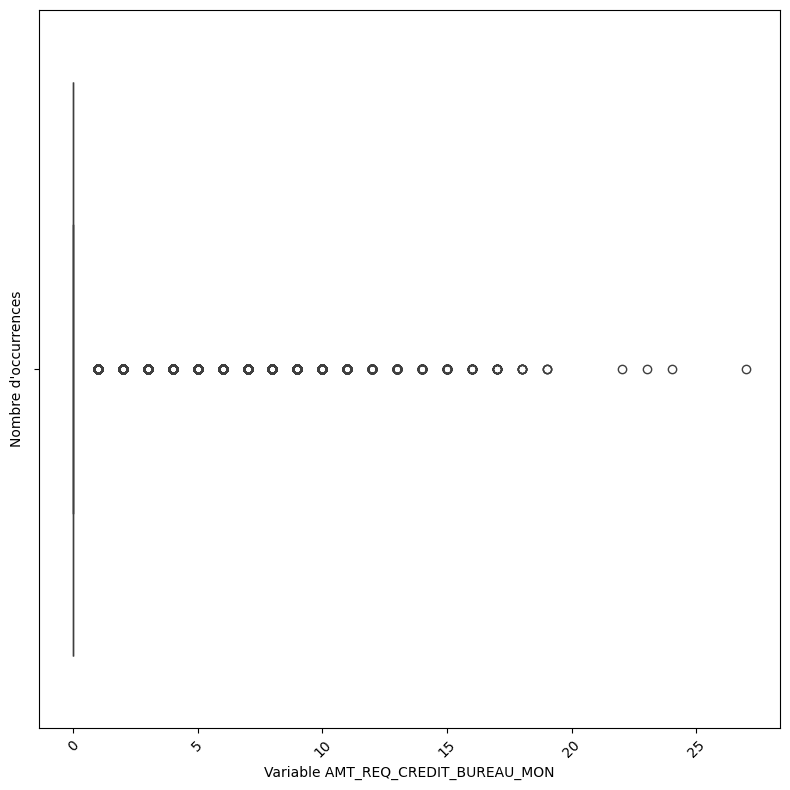

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_QRT****************************************************


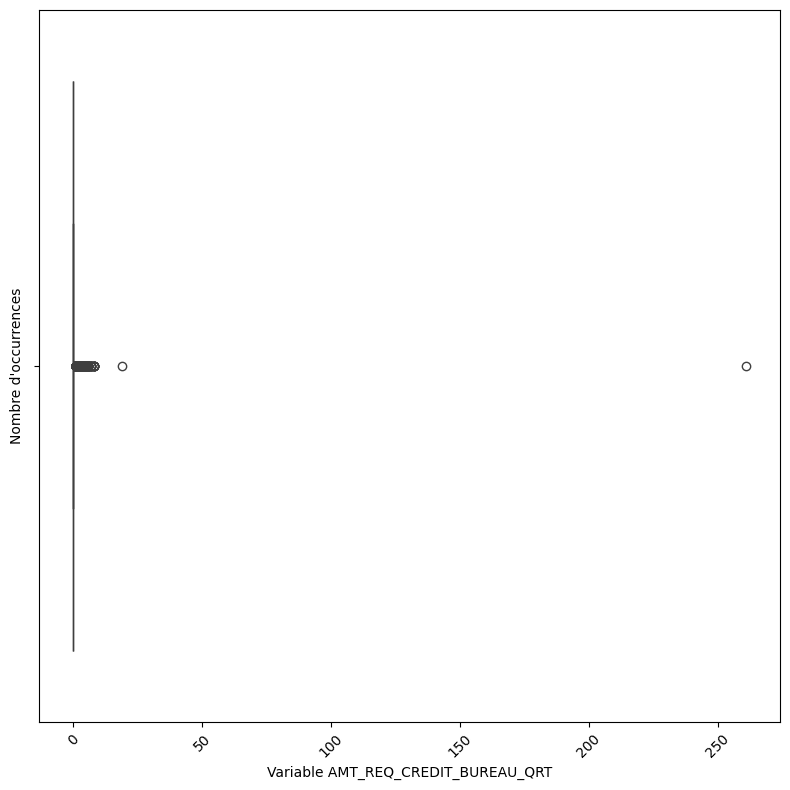

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_YEAR****************************************************


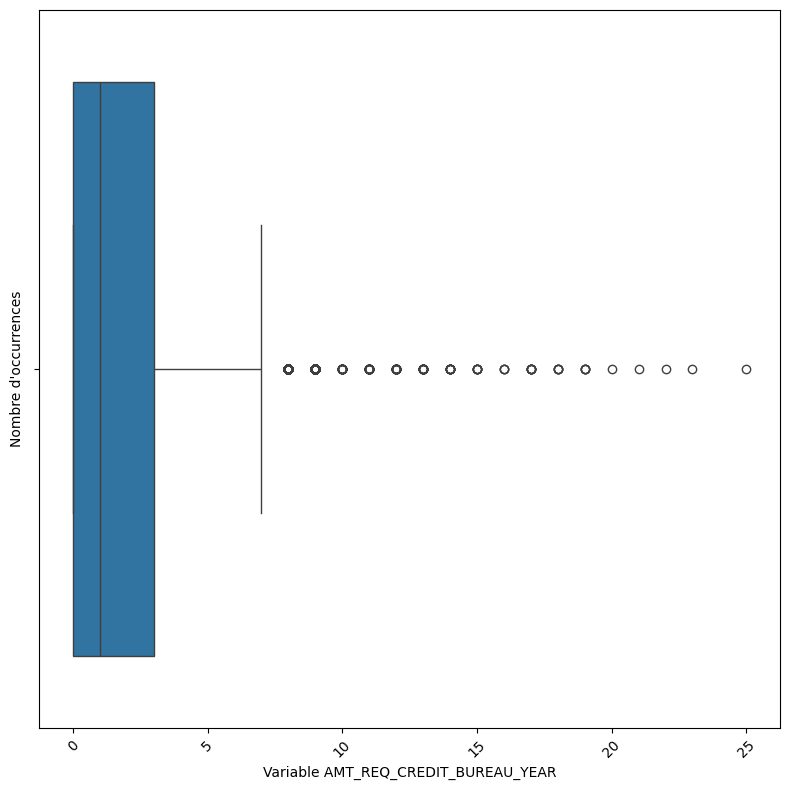

In [45]:
for col in quanti_continues.columns : 
    df_counts = None
    
    print(f"****************************************************VARIABLE {col}****************************************************")
    
    plt.figure(figsize=(8, 8))
    
    ax = sns.boxplot(data=quanti_continues, x=col)
    ax.set_xlabel(f"Variable {col}")
    ax.set_ylabel("Nombre d'occurrences")
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

****************************************************VARIABLE AMT_INCOME_TOTAL****************************************************


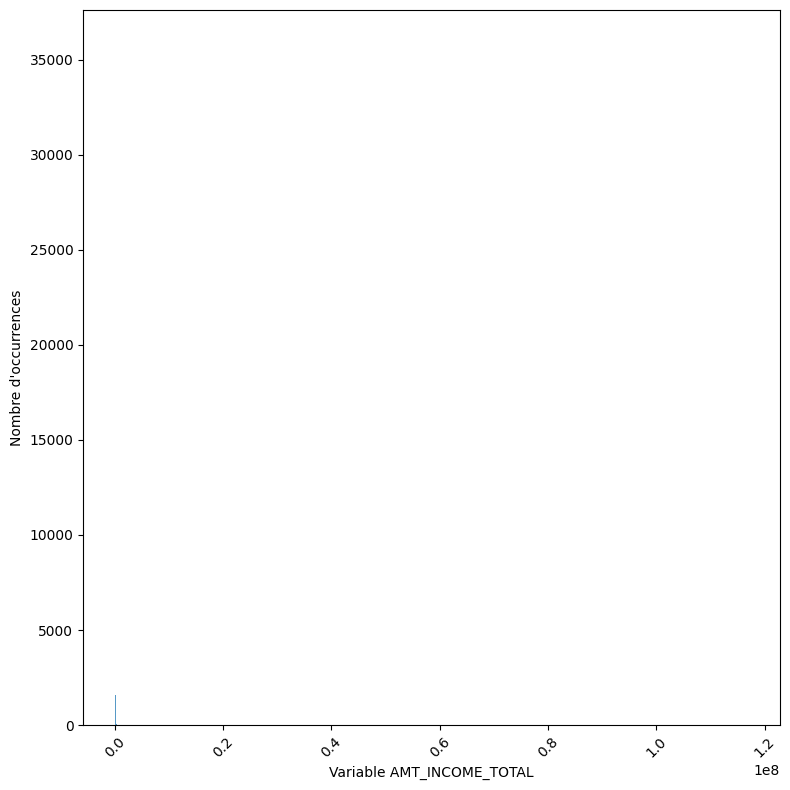

****************************************************VARIABLE AMT_CREDIT****************************************************


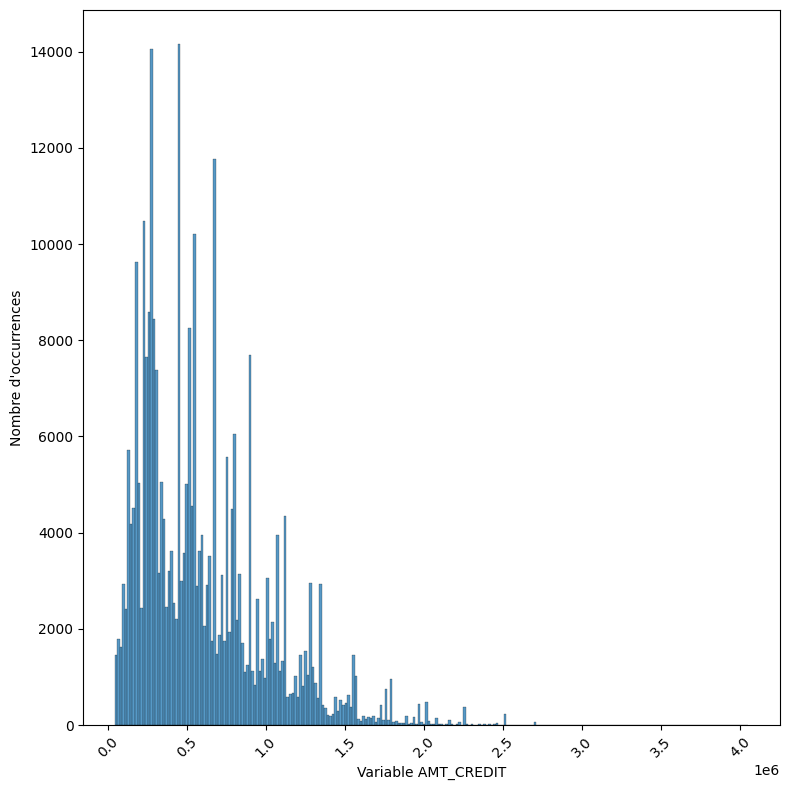

****************************************************VARIABLE AMT_ANNUITY****************************************************


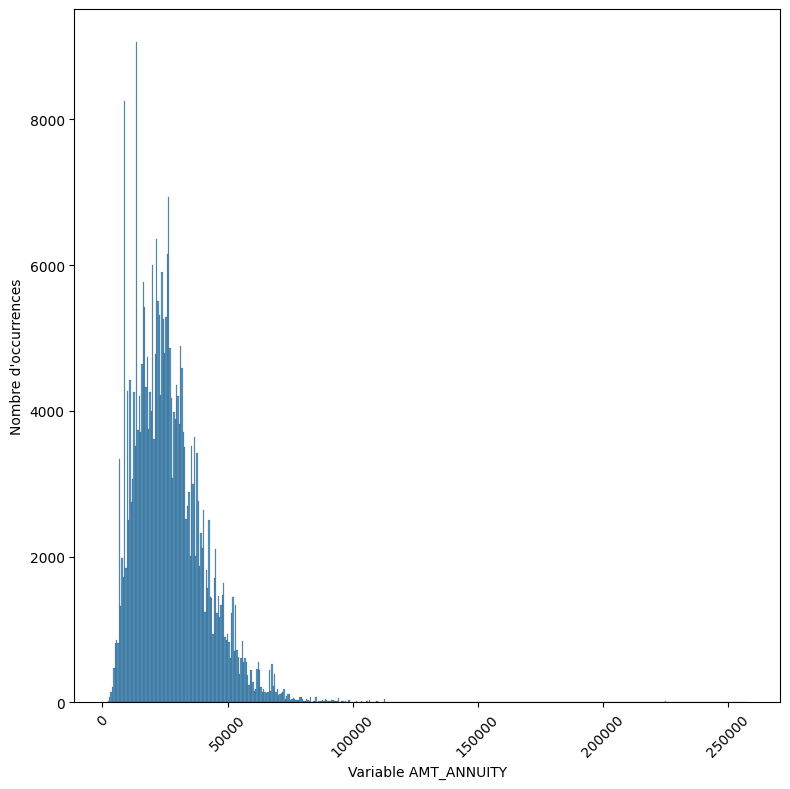

****************************************************VARIABLE AMT_GOODS_PRICE****************************************************


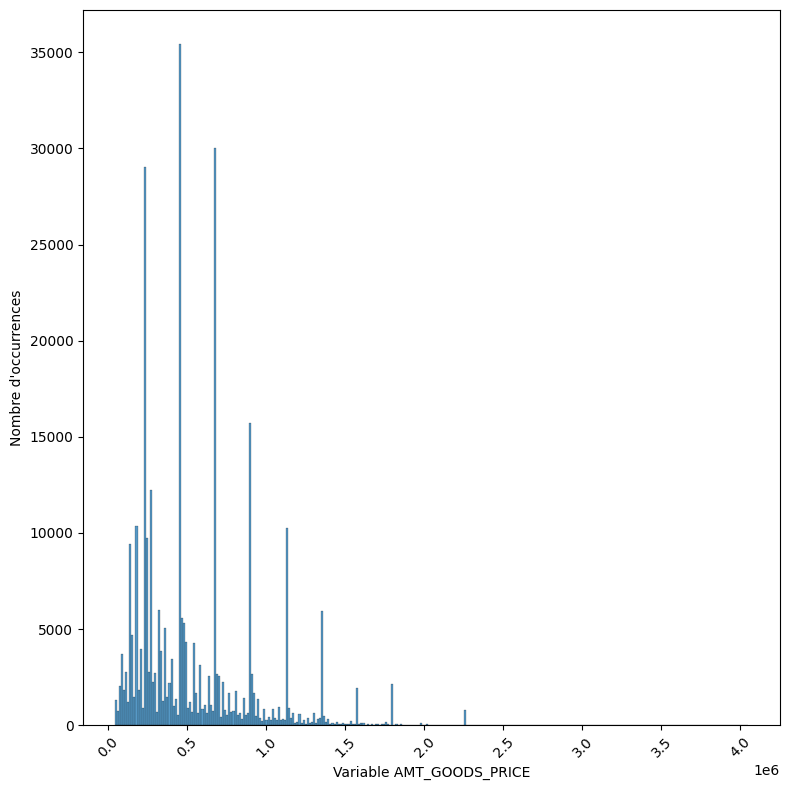

****************************************************VARIABLE REGION_POPULATION_RELATIVE****************************************************


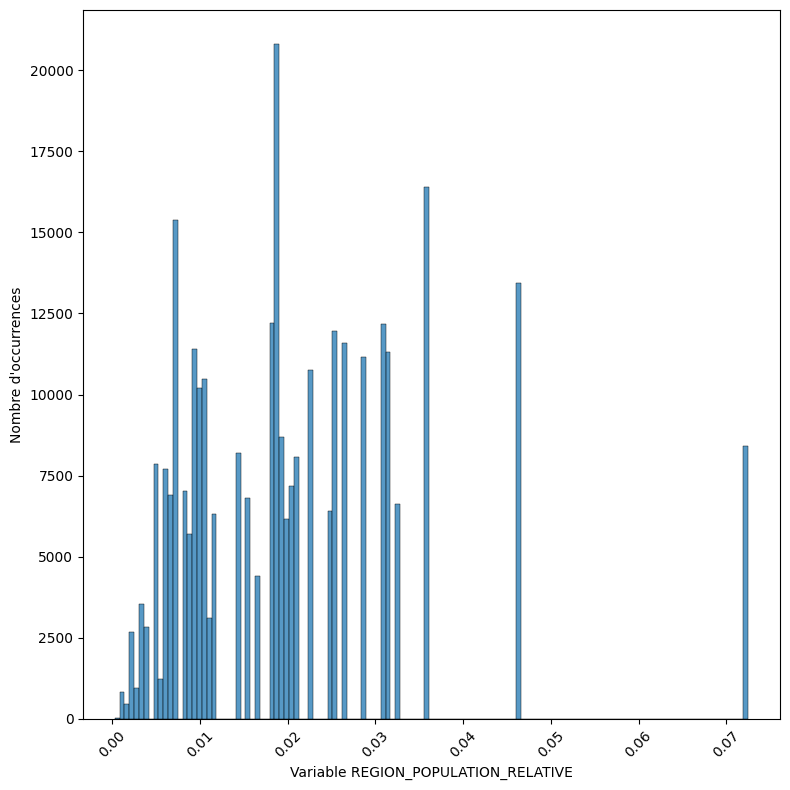

****************************************************VARIABLE DAYS_REGISTRATION****************************************************


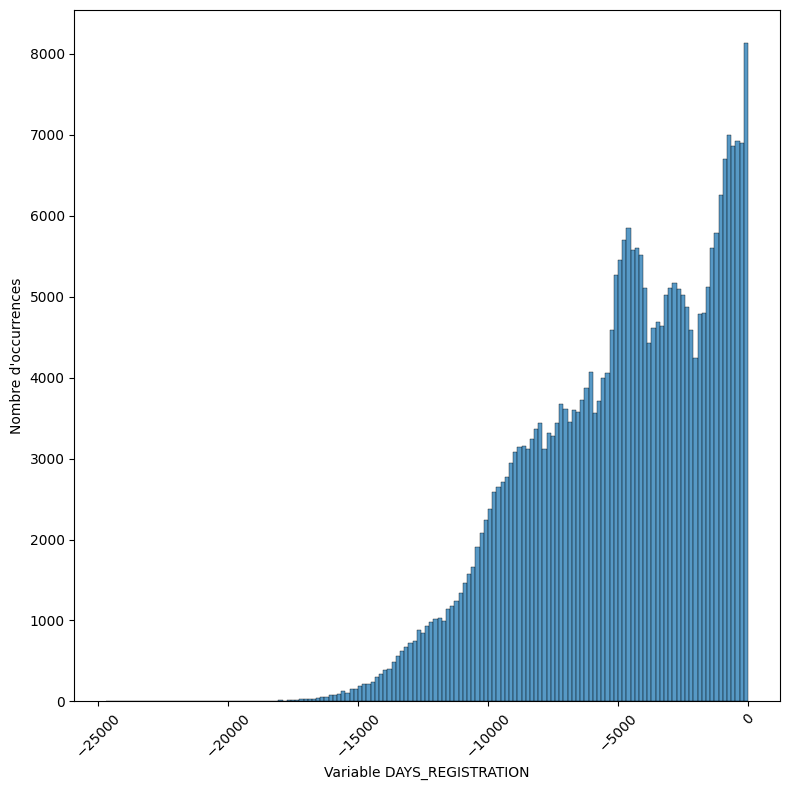

****************************************************VARIABLE OWN_CAR_AGE****************************************************


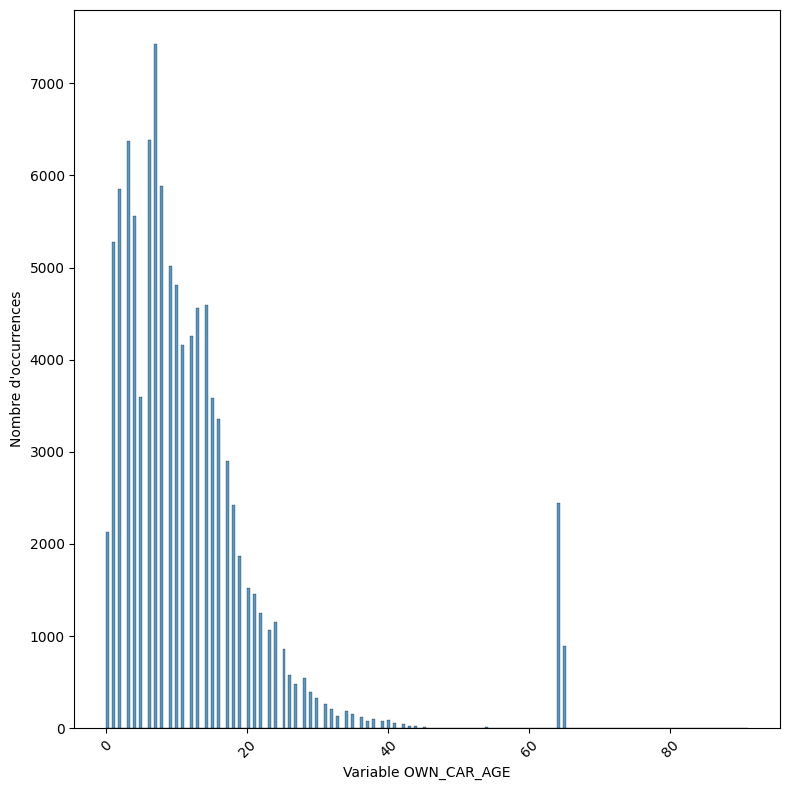

****************************************************VARIABLE CNT_FAM_MEMBERS****************************************************


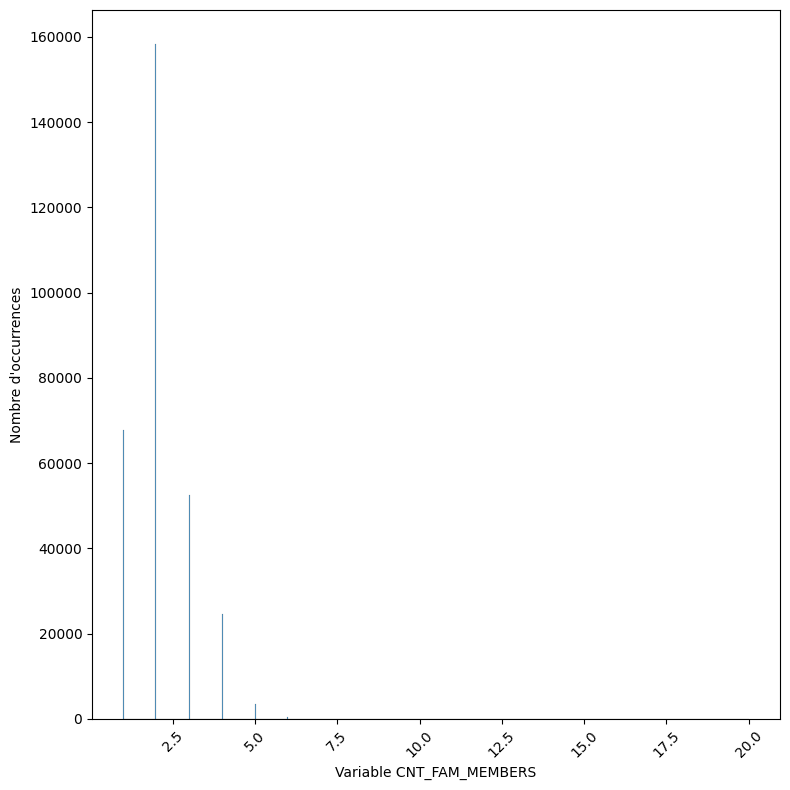

****************************************************VARIABLE EXT_SOURCE_1****************************************************


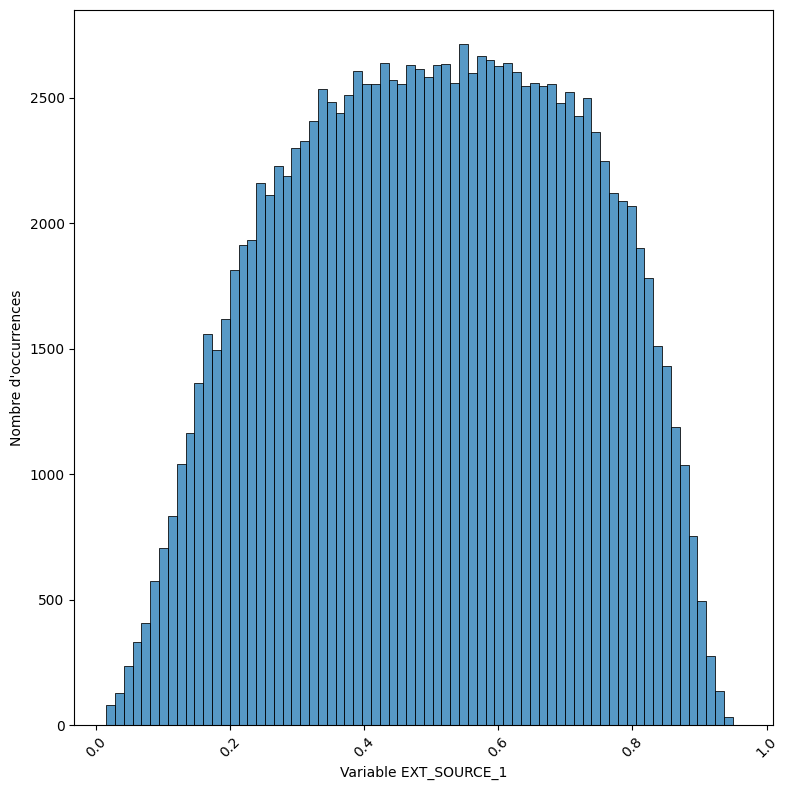

****************************************************VARIABLE EXT_SOURCE_2****************************************************


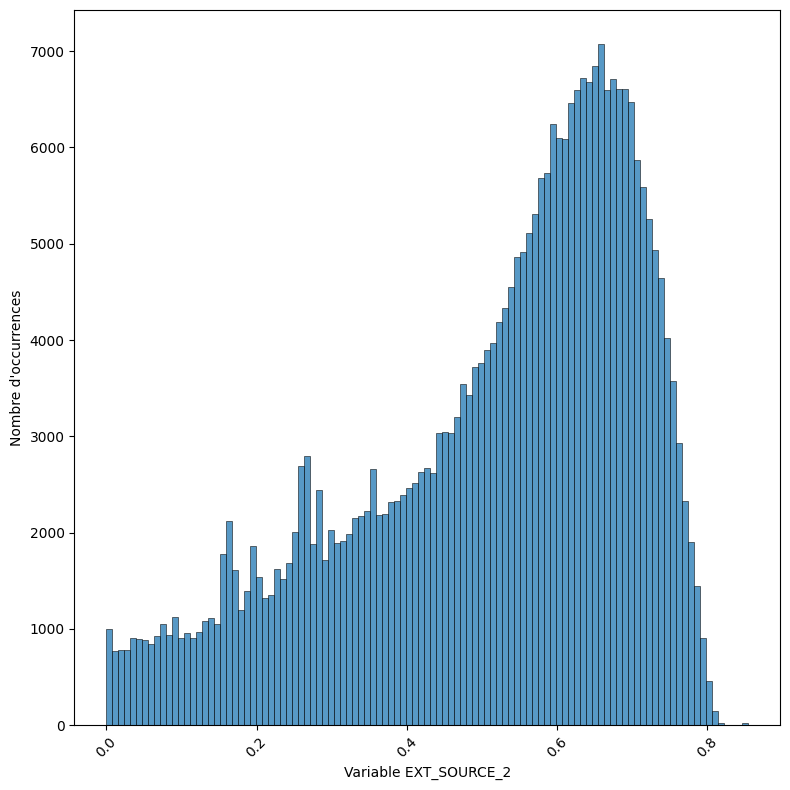

****************************************************VARIABLE EXT_SOURCE_3****************************************************


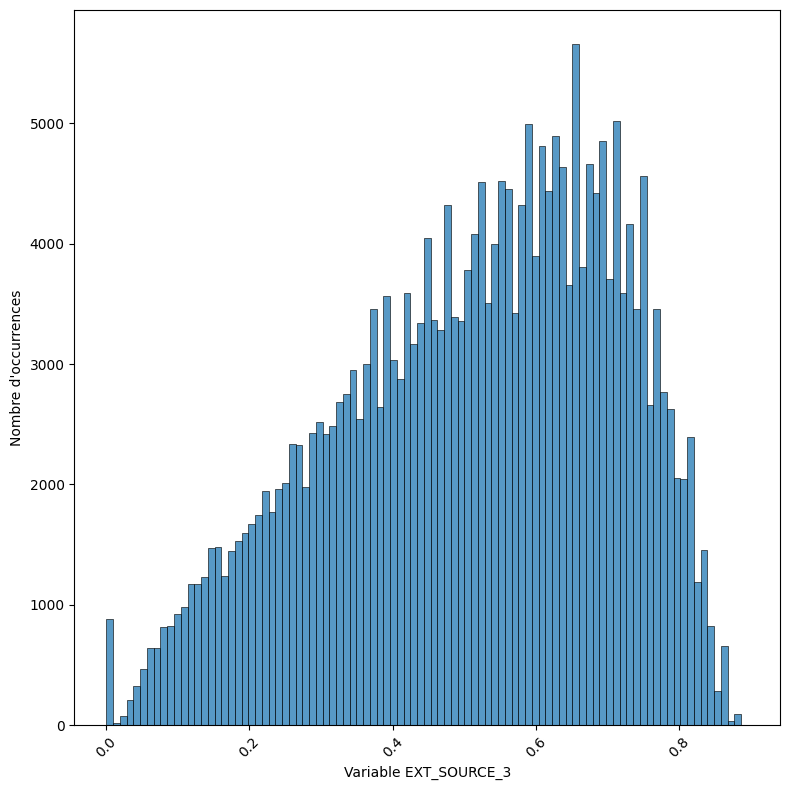

****************************************************VARIABLE APARTMENTS_AVG****************************************************


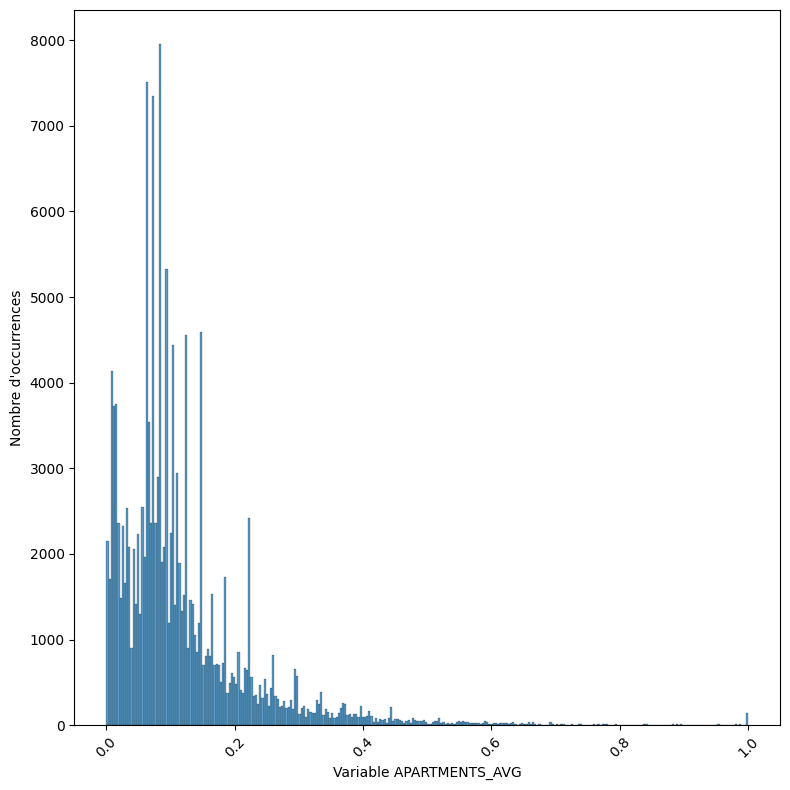

****************************************************VARIABLE BASEMENTAREA_AVG****************************************************


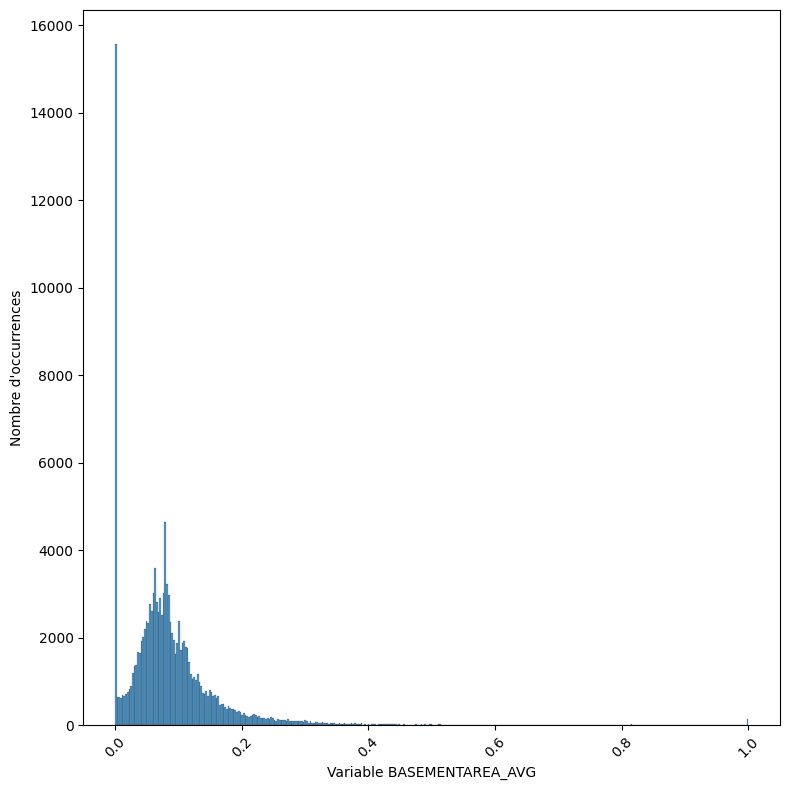

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_AVG****************************************************


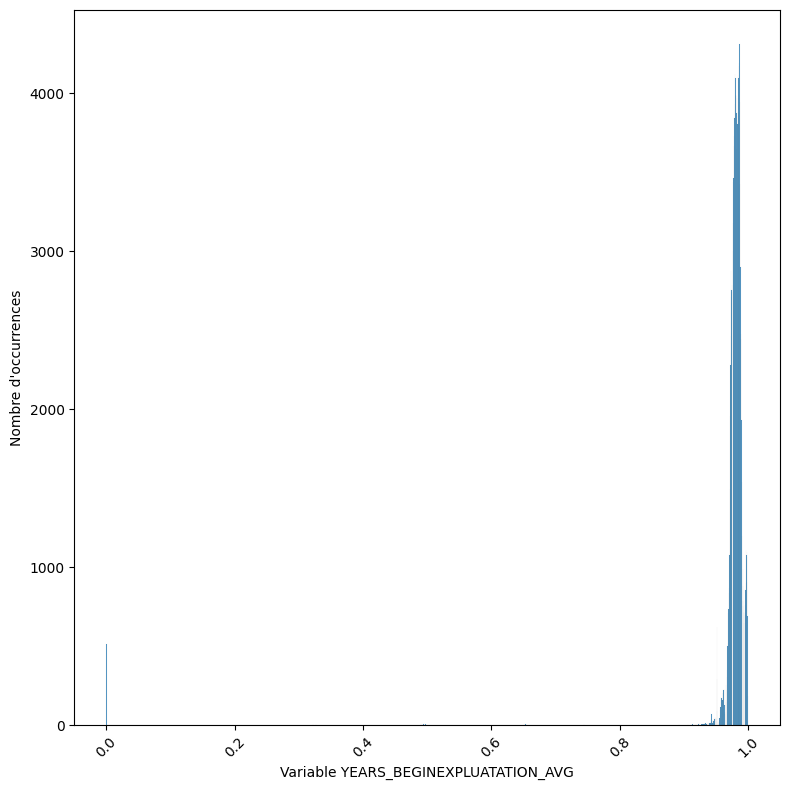

****************************************************VARIABLE YEARS_BUILD_AVG****************************************************


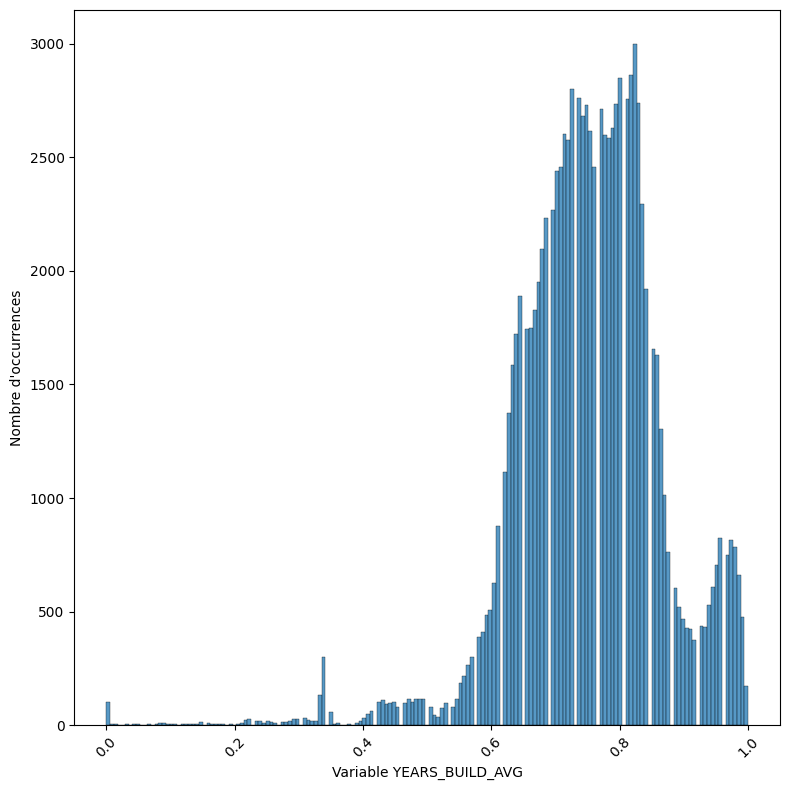

****************************************************VARIABLE COMMONAREA_AVG****************************************************


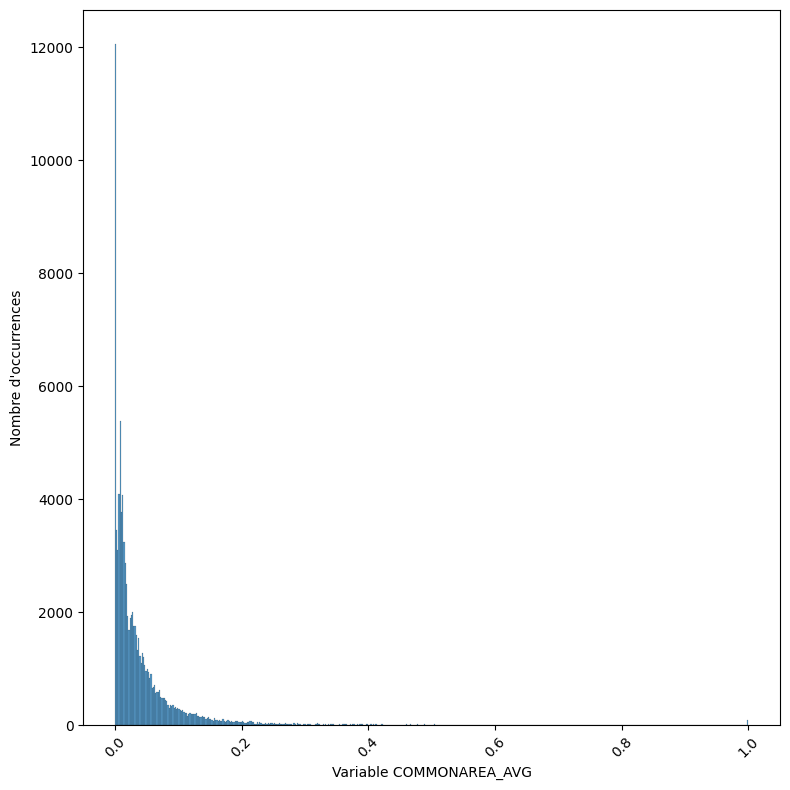

****************************************************VARIABLE ELEVATORS_AVG****************************************************


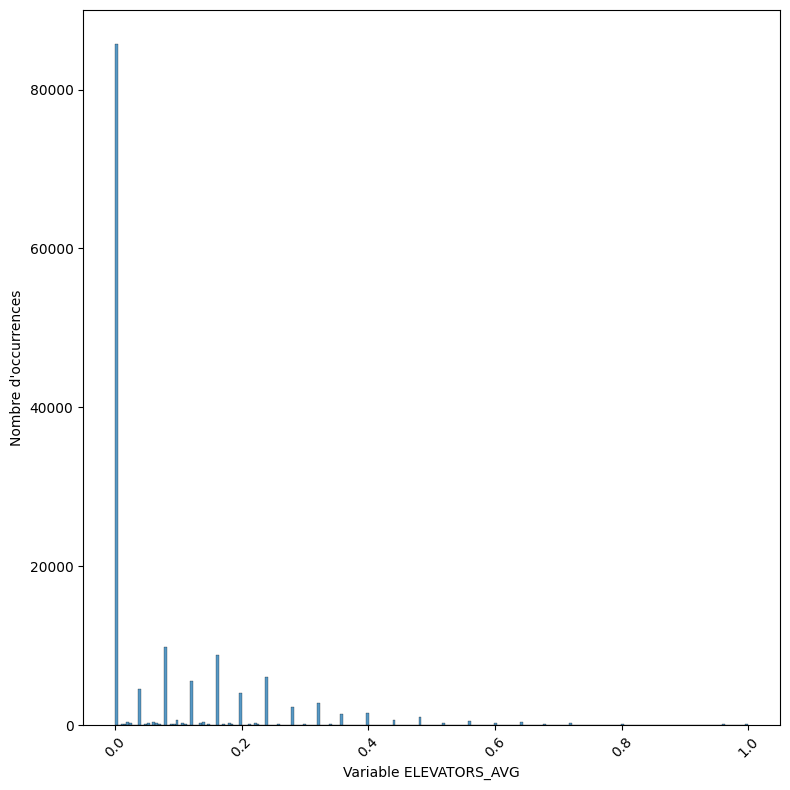

****************************************************VARIABLE ENTRANCES_AVG****************************************************


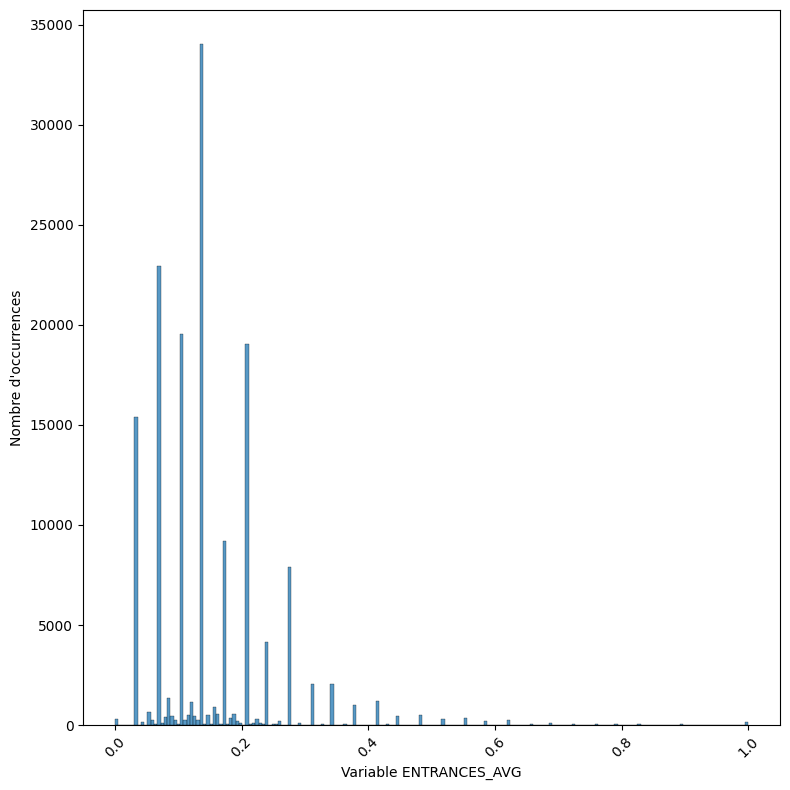

****************************************************VARIABLE FLOORSMAX_AVG****************************************************


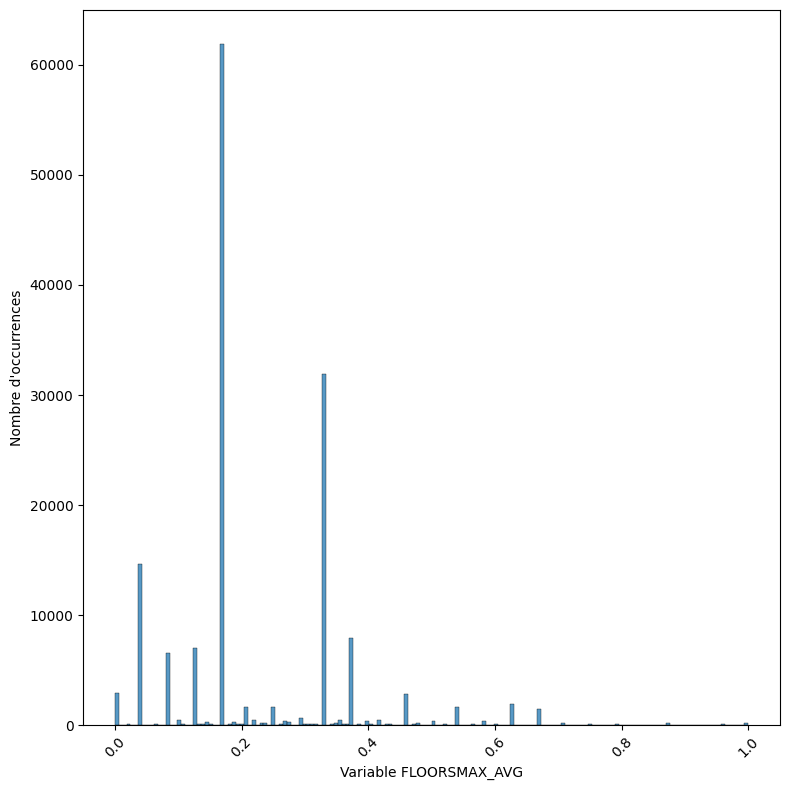

****************************************************VARIABLE FLOORSMIN_AVG****************************************************


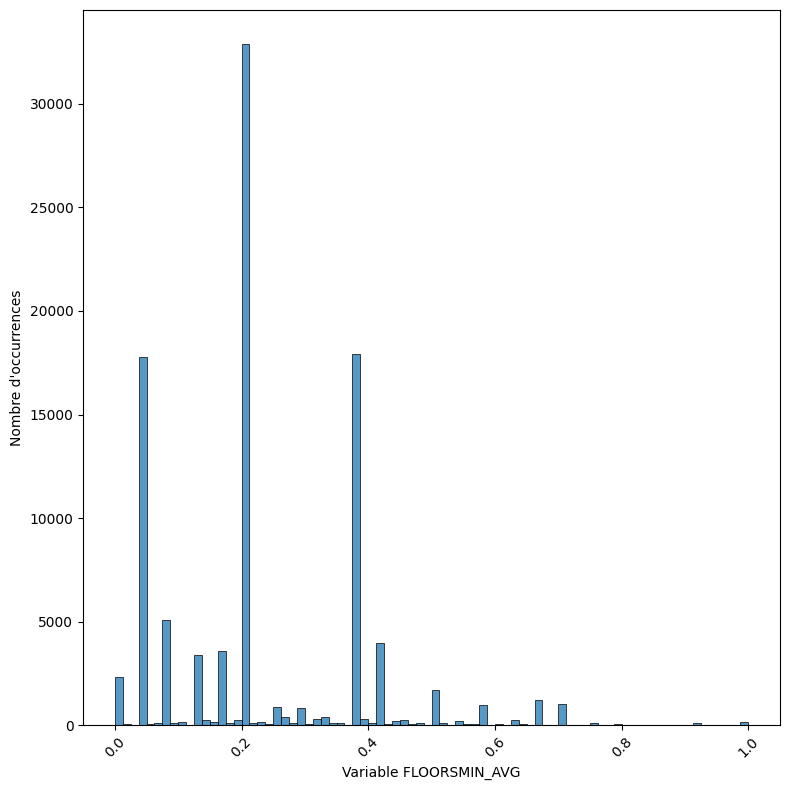

****************************************************VARIABLE LANDAREA_AVG****************************************************


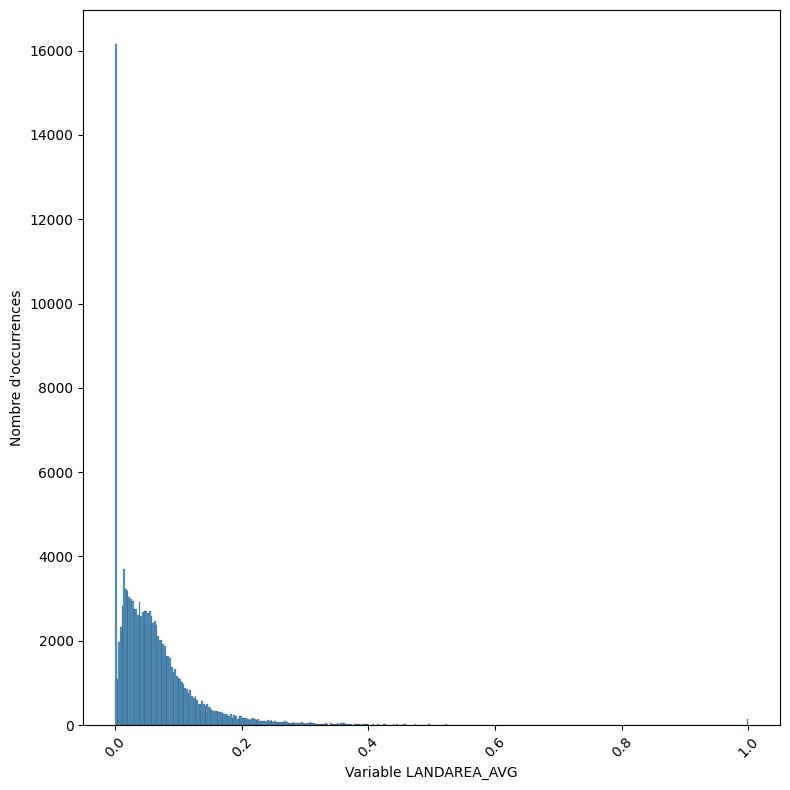

****************************************************VARIABLE LIVINGAPARTMENTS_AVG****************************************************


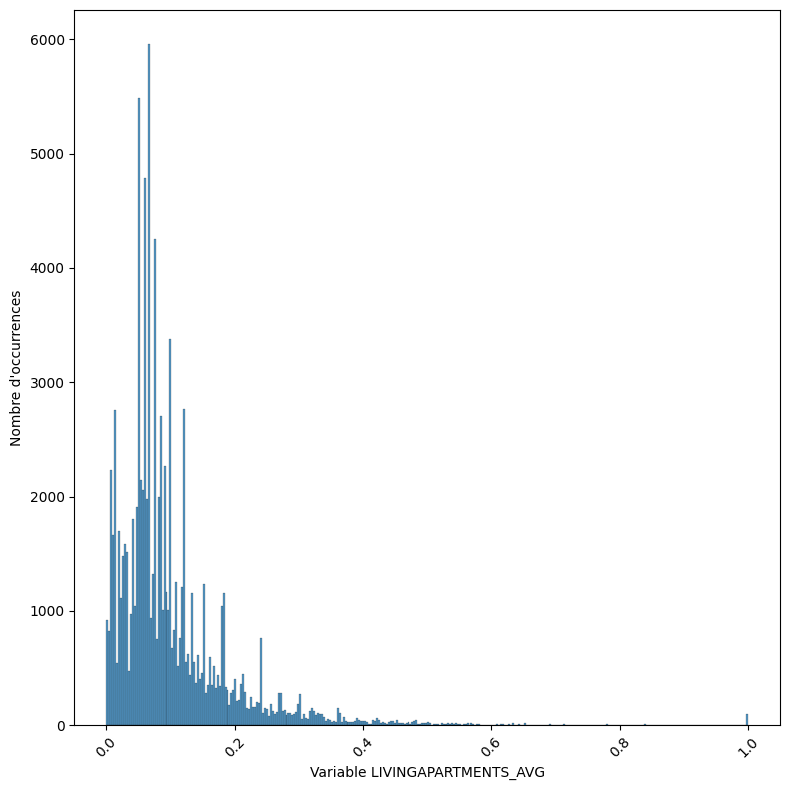

****************************************************VARIABLE LIVINGAREA_AVG****************************************************


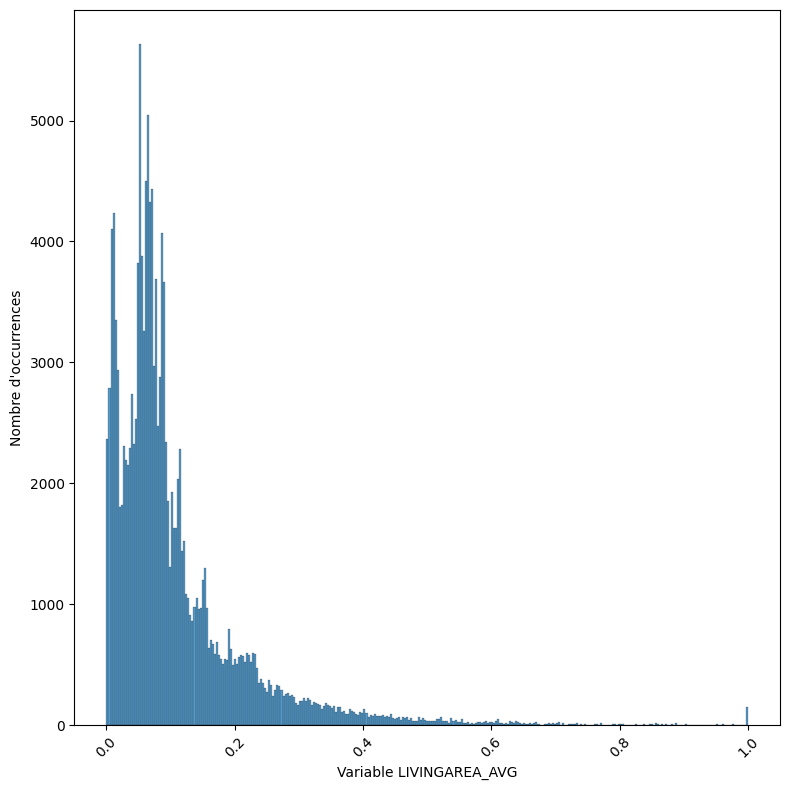

****************************************************VARIABLE NONLIVINGAPARTMENTS_AVG****************************************************


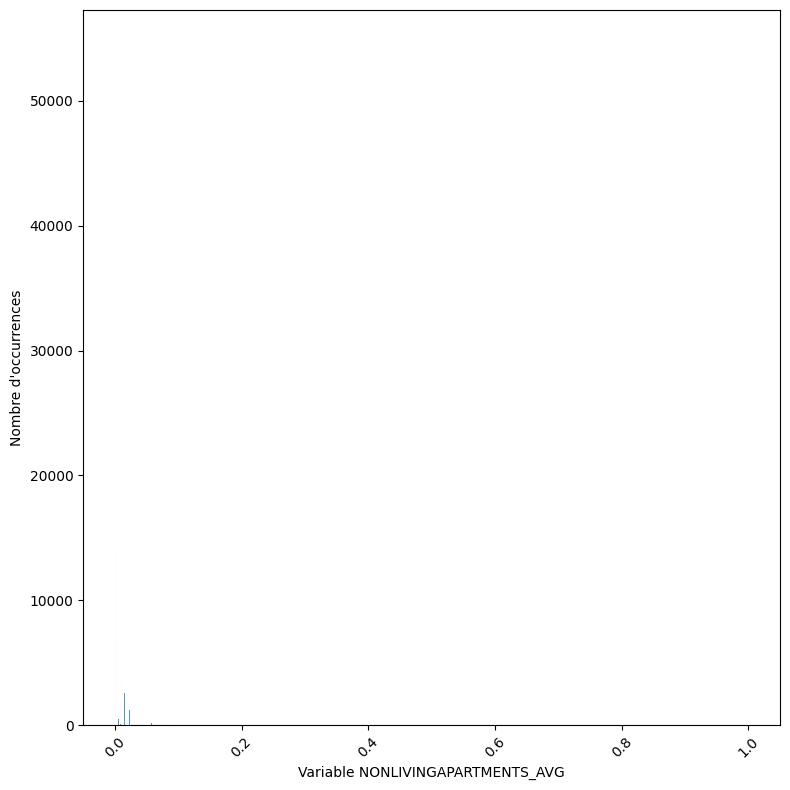

****************************************************VARIABLE NONLIVINGAREA_AVG****************************************************


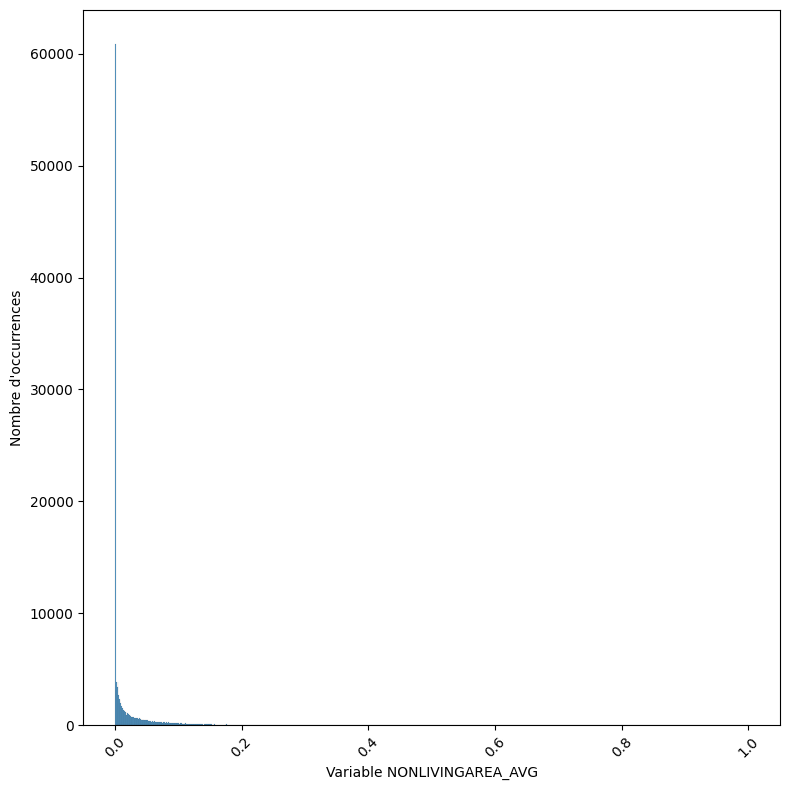

****************************************************VARIABLE APARTMENTS_MODE****************************************************


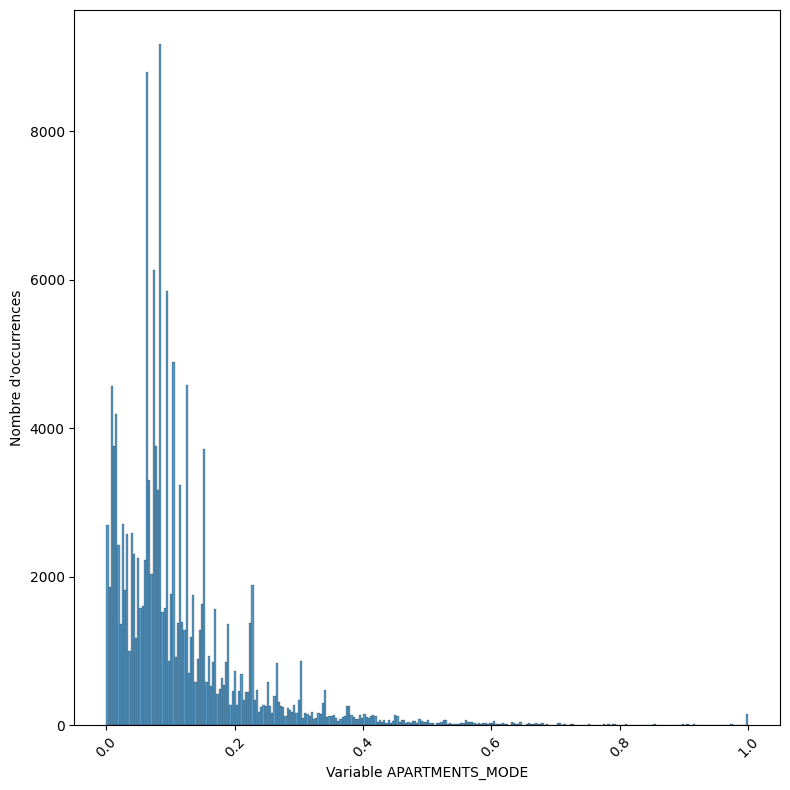

****************************************************VARIABLE BASEMENTAREA_MODE****************************************************


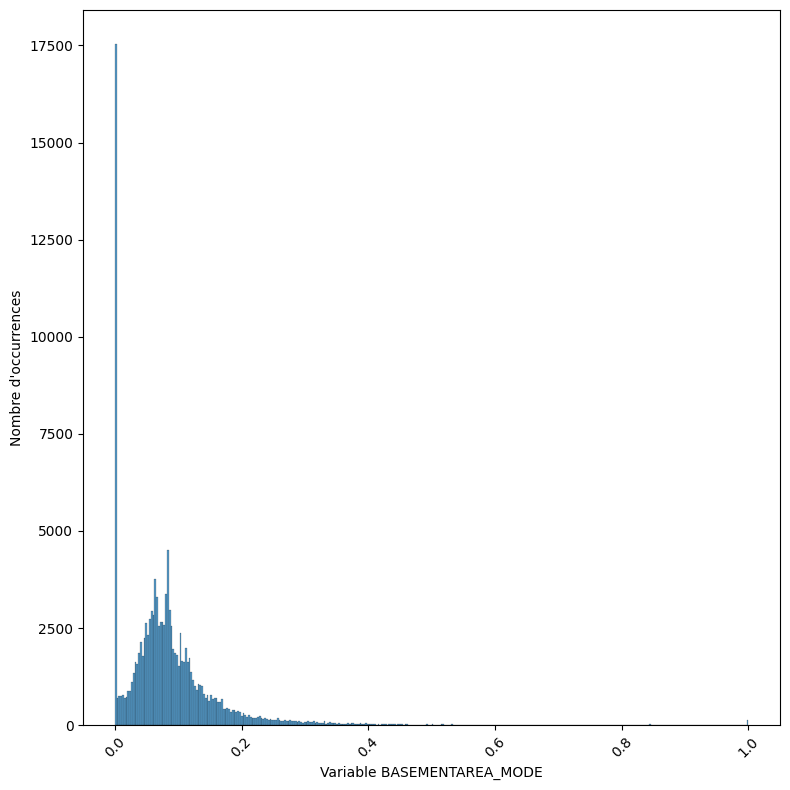

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_MODE****************************************************


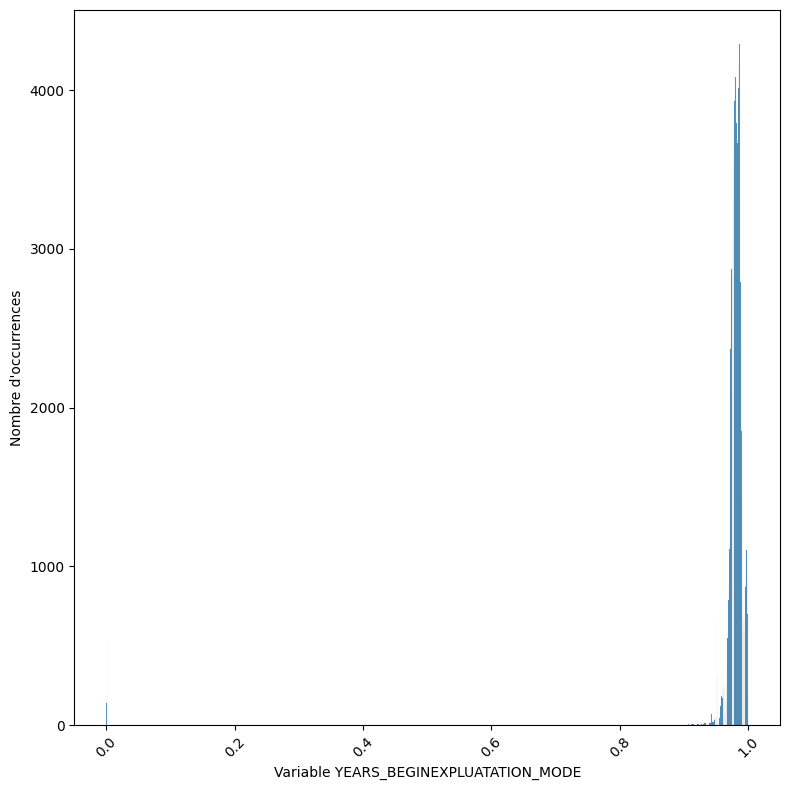

****************************************************VARIABLE YEARS_BUILD_MODE****************************************************


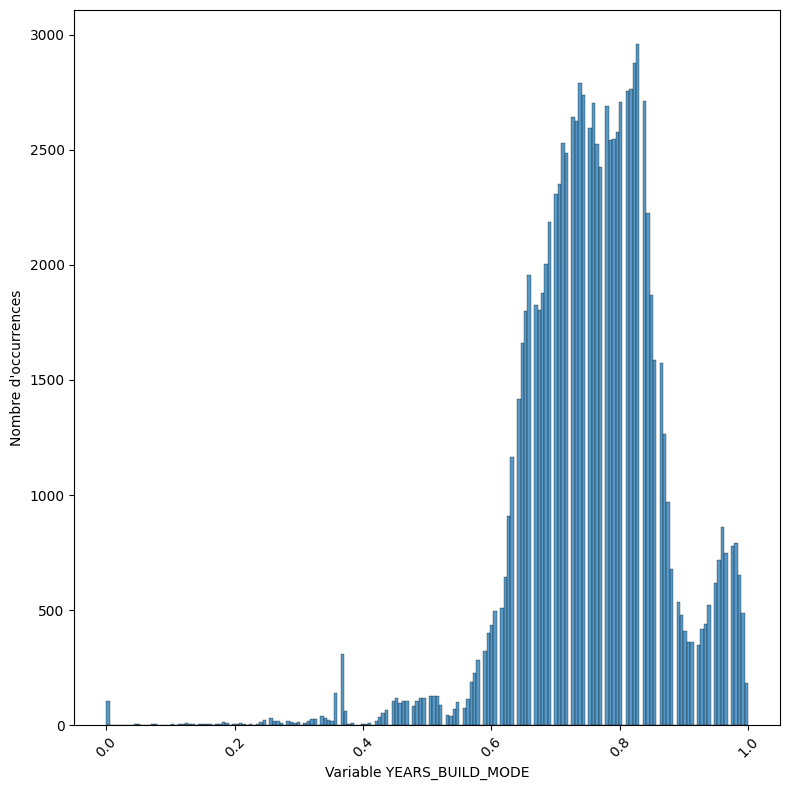

****************************************************VARIABLE COMMONAREA_MODE****************************************************


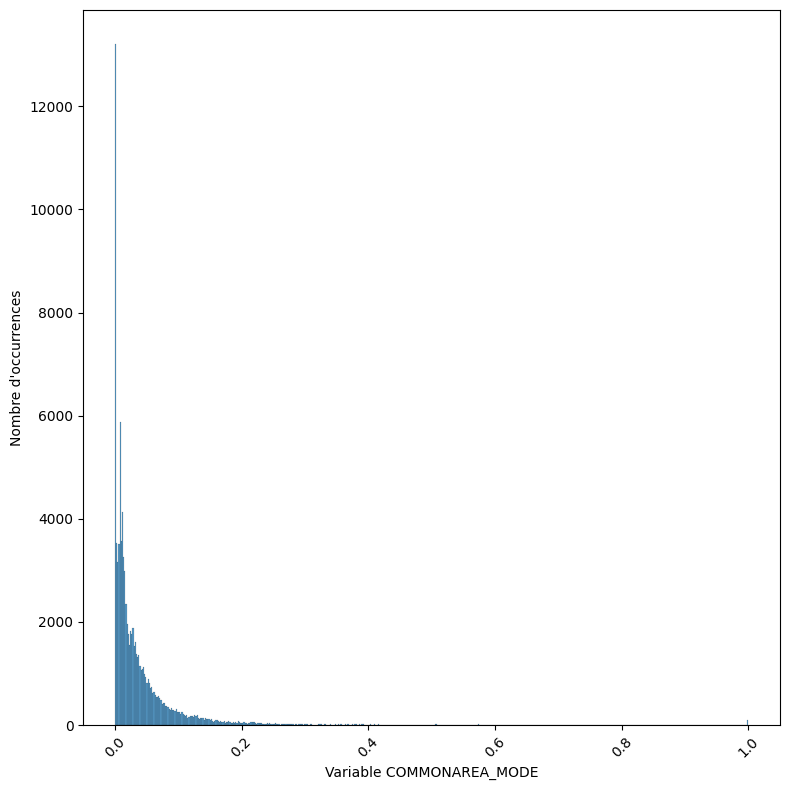

****************************************************VARIABLE ELEVATORS_MODE****************************************************


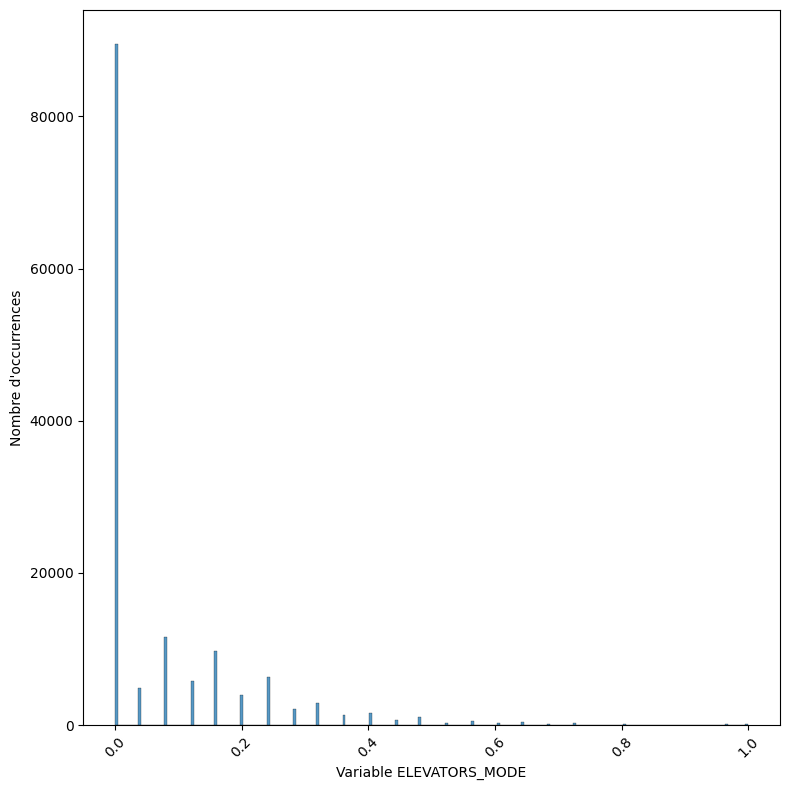

****************************************************VARIABLE ENTRANCES_MODE****************************************************


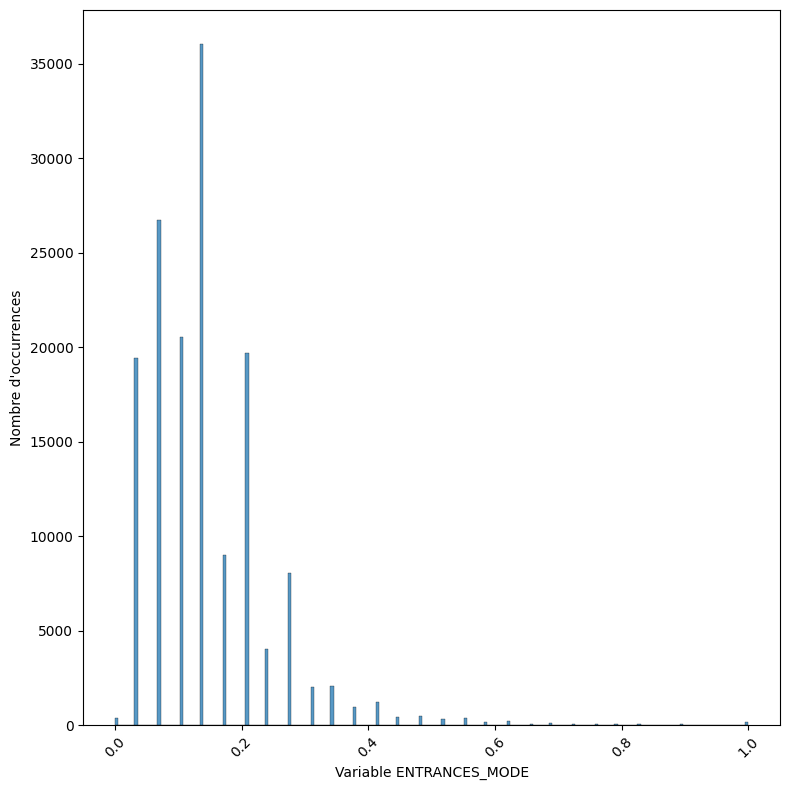

****************************************************VARIABLE FLOORSMAX_MODE****************************************************


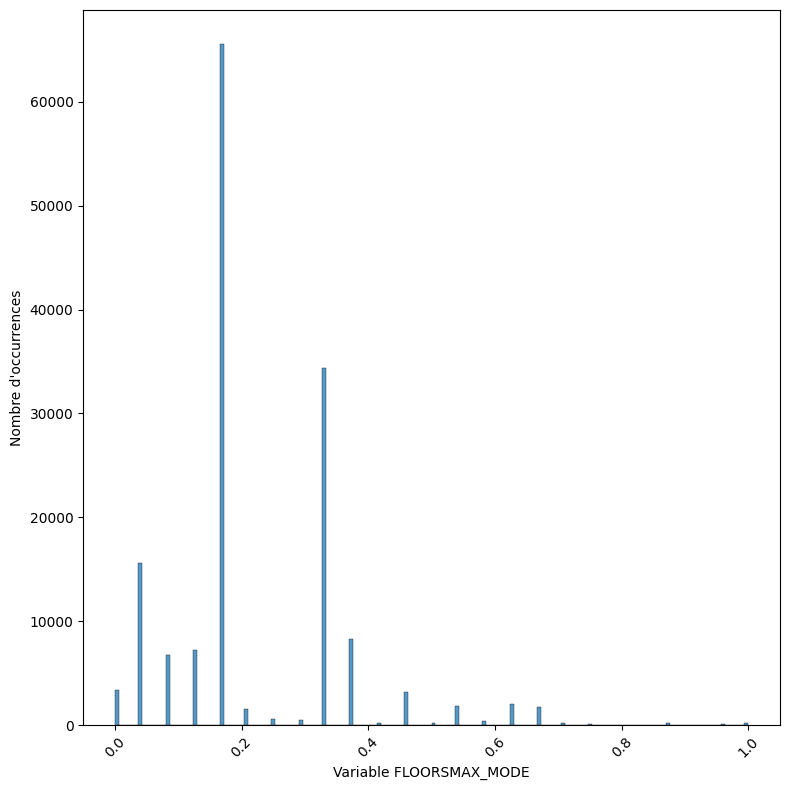

****************************************************VARIABLE FLOORSMIN_MODE****************************************************


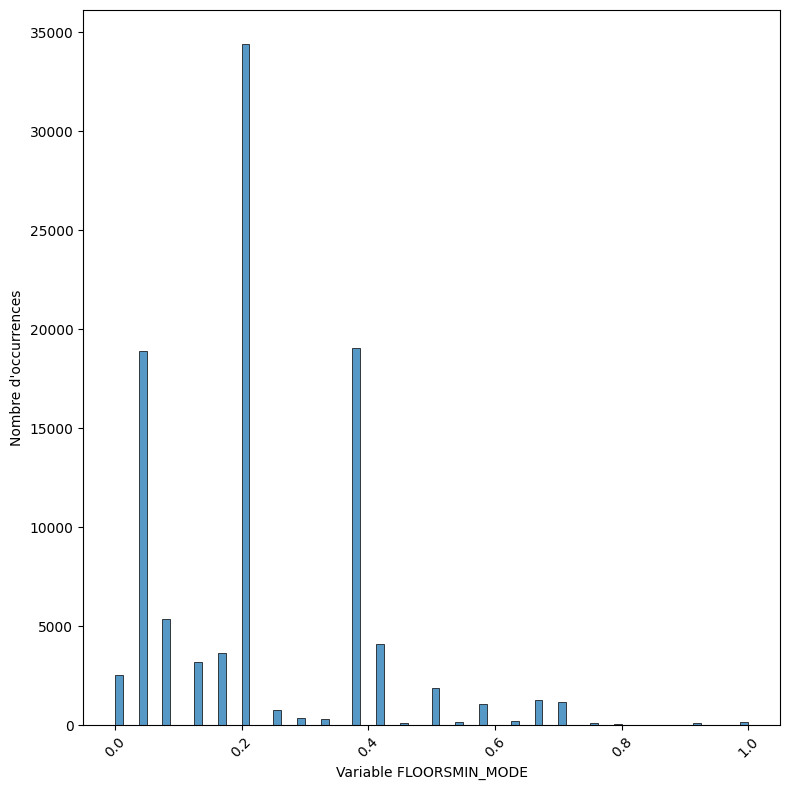

****************************************************VARIABLE LANDAREA_MODE****************************************************


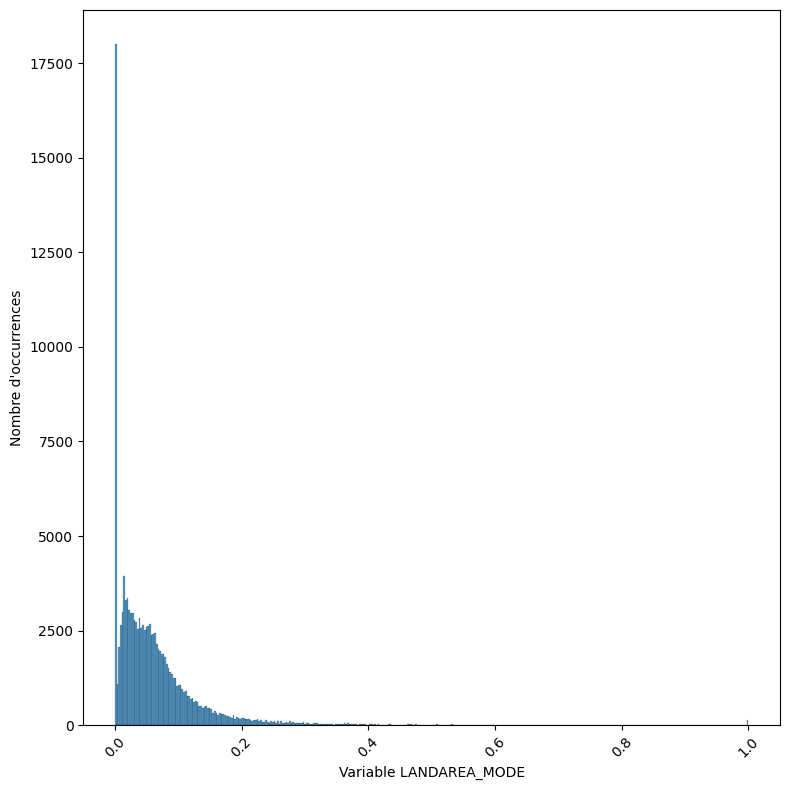

****************************************************VARIABLE LIVINGAPARTMENTS_MODE****************************************************


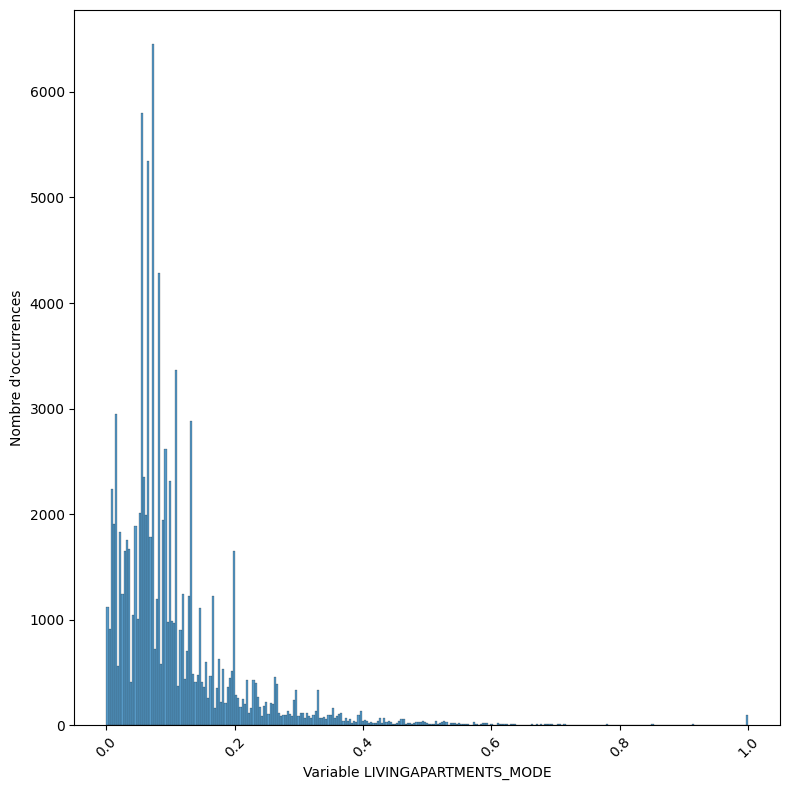

****************************************************VARIABLE LIVINGAREA_MODE****************************************************


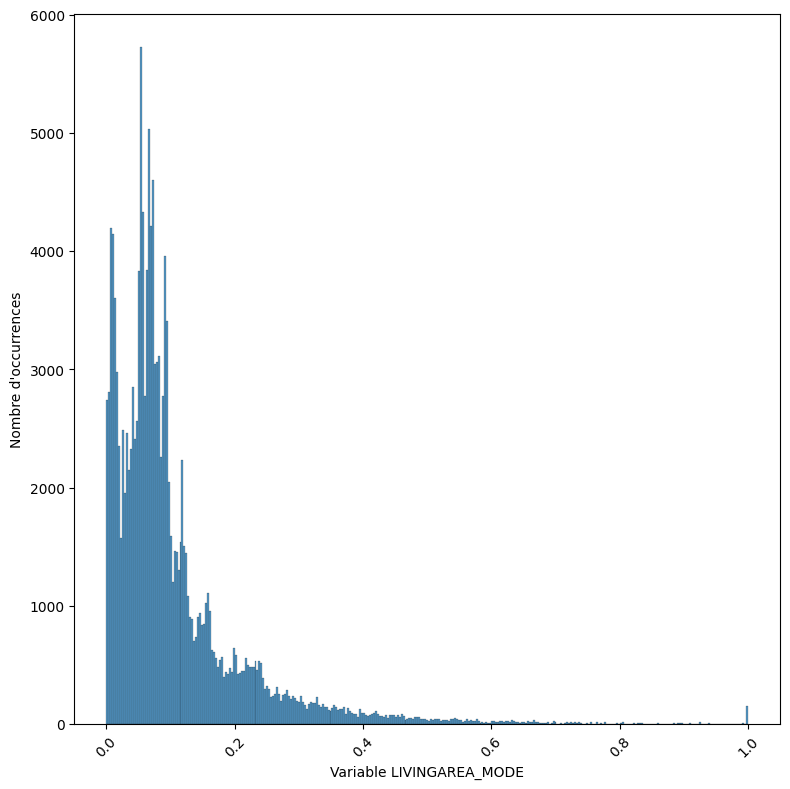

****************************************************VARIABLE NONLIVINGAPARTMENTS_MODE****************************************************


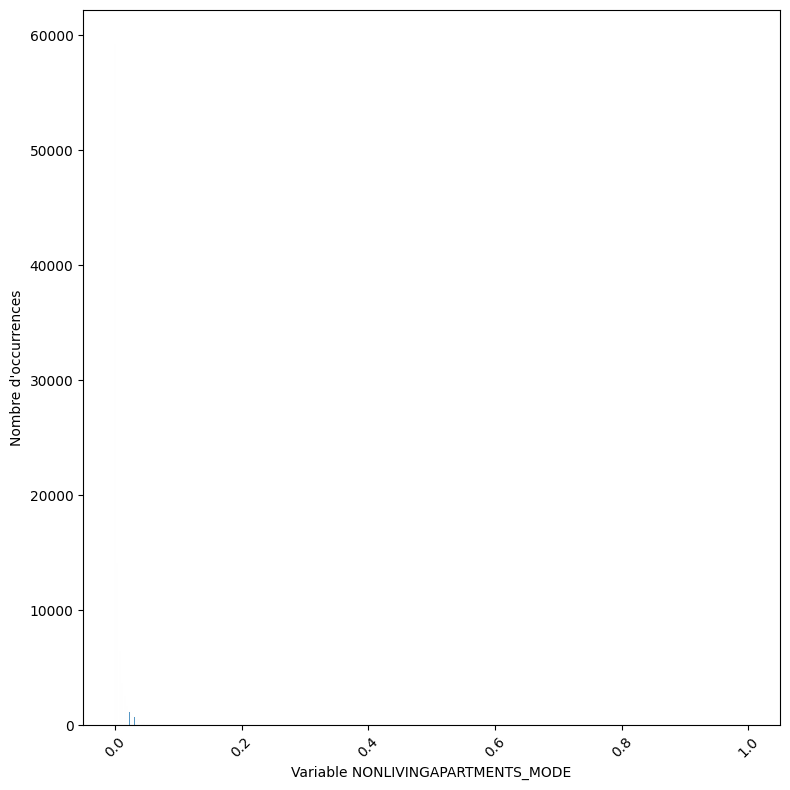

****************************************************VARIABLE NONLIVINGAREA_MODE****************************************************


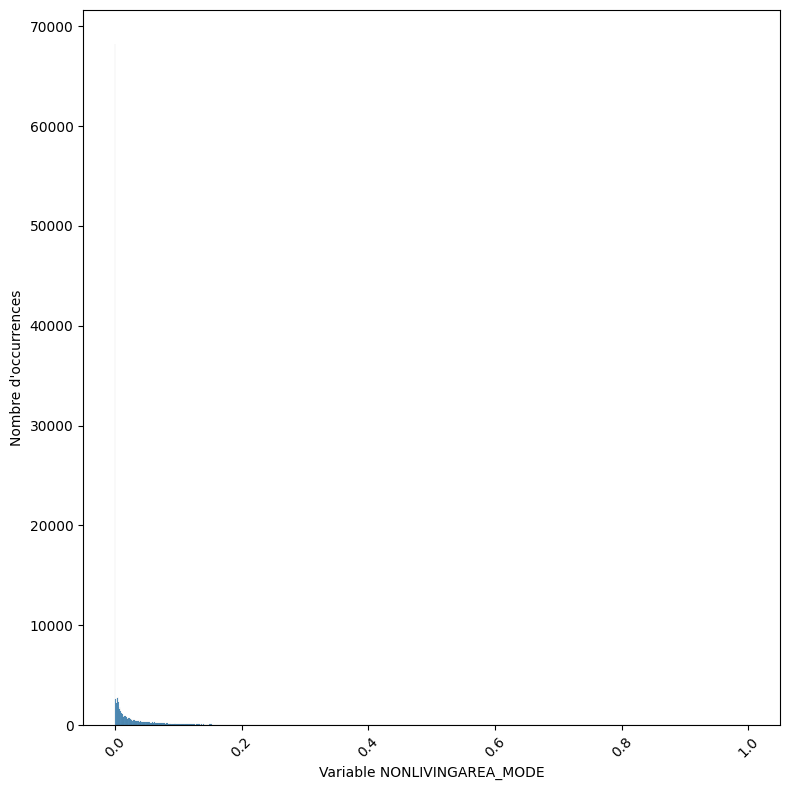

****************************************************VARIABLE APARTMENTS_MEDI****************************************************


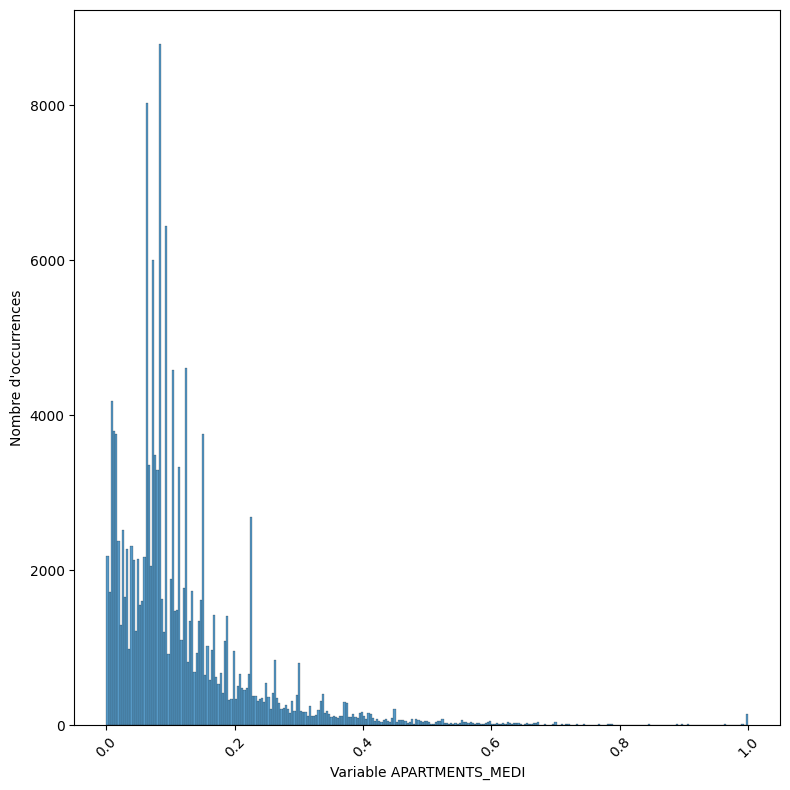

****************************************************VARIABLE BASEMENTAREA_MEDI****************************************************


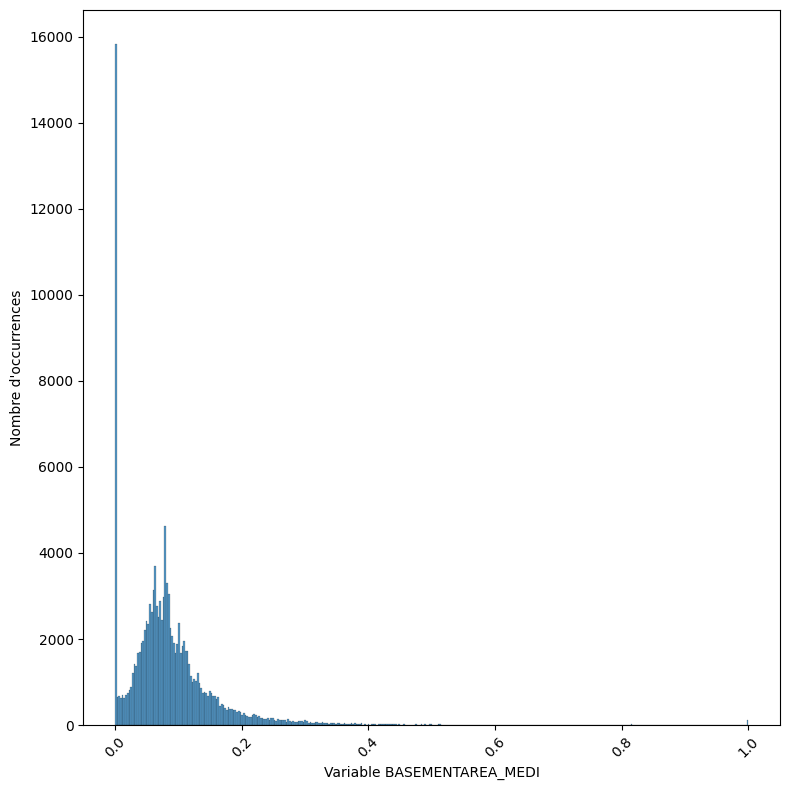

****************************************************VARIABLE YEARS_BEGINEXPLUATATION_MEDI****************************************************


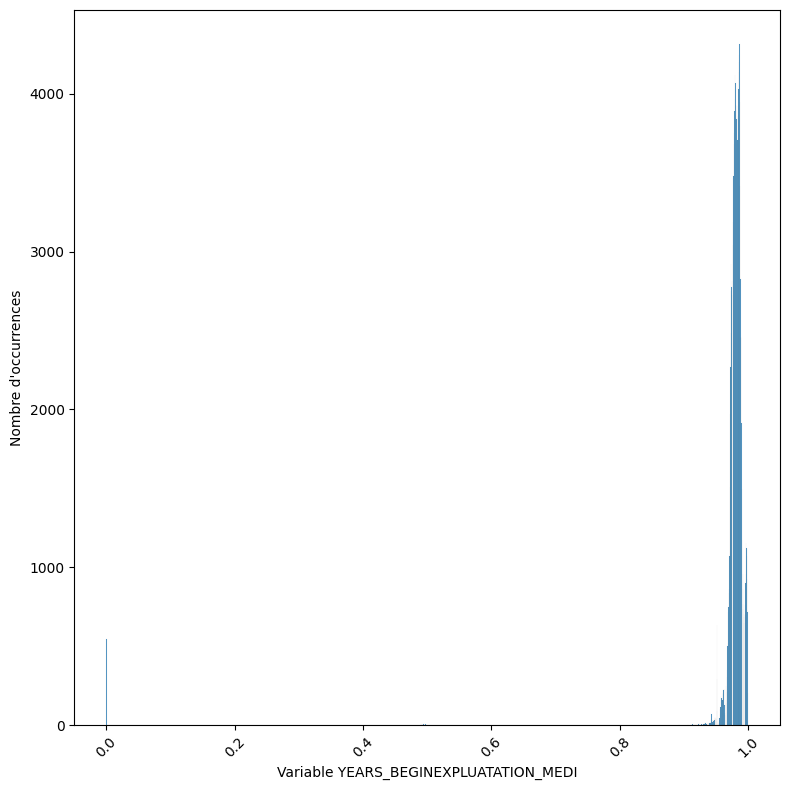

****************************************************VARIABLE YEARS_BUILD_MEDI****************************************************


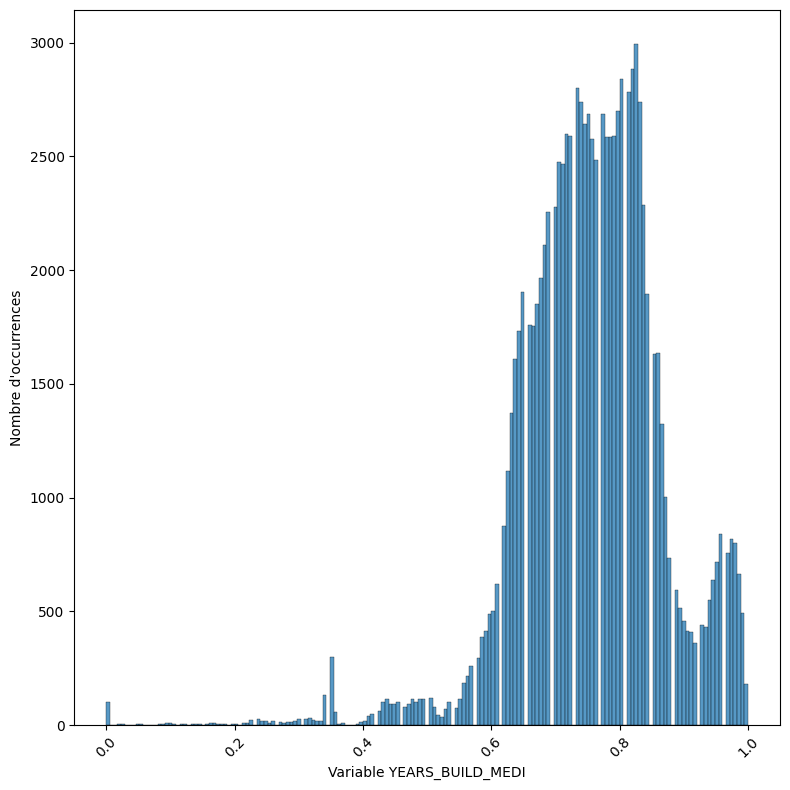

****************************************************VARIABLE COMMONAREA_MEDI****************************************************


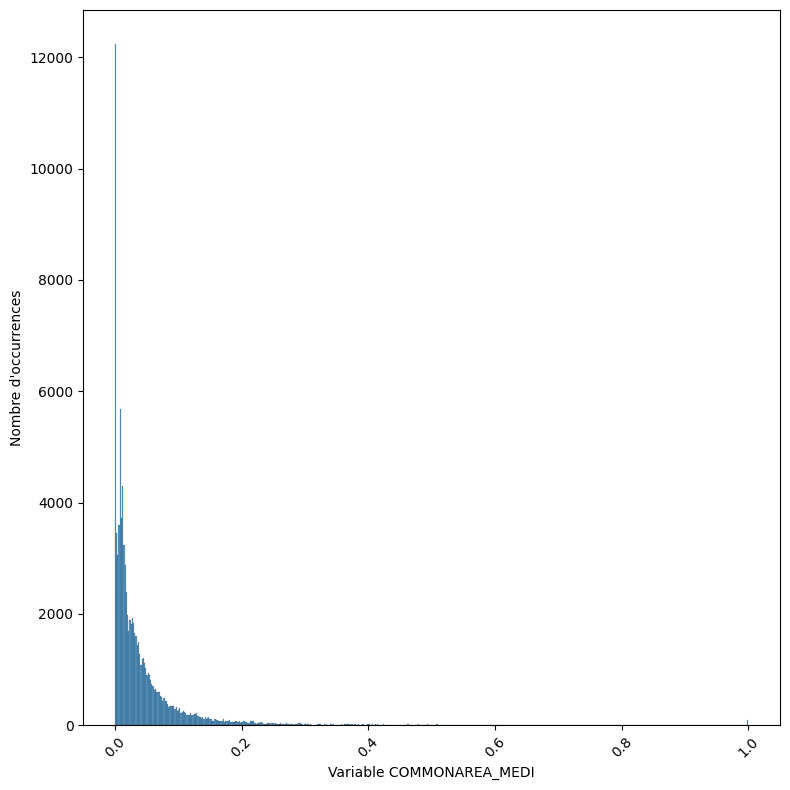

****************************************************VARIABLE ELEVATORS_MEDI****************************************************


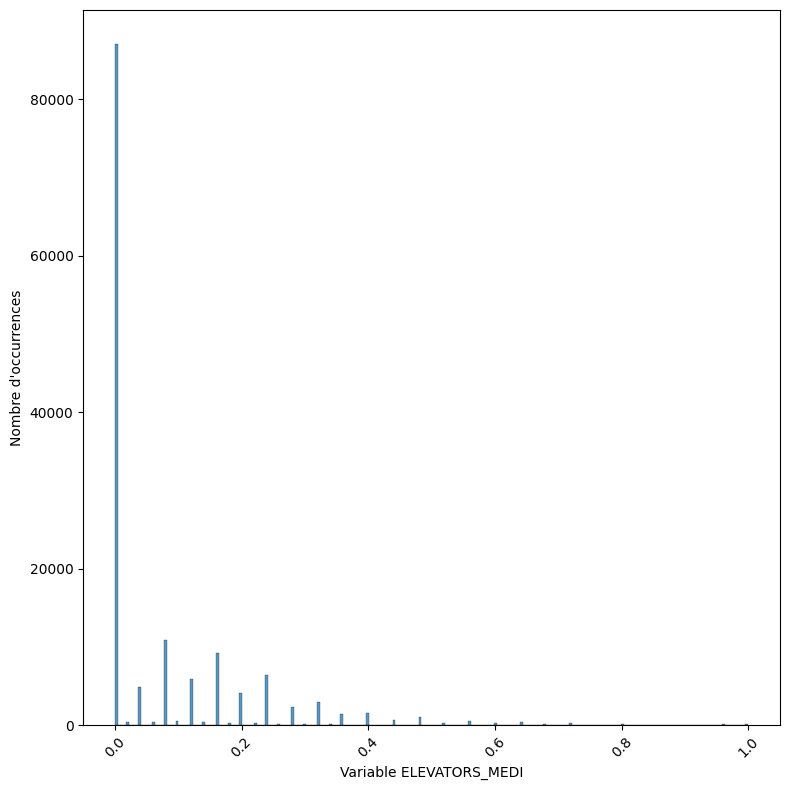

****************************************************VARIABLE ENTRANCES_MEDI****************************************************


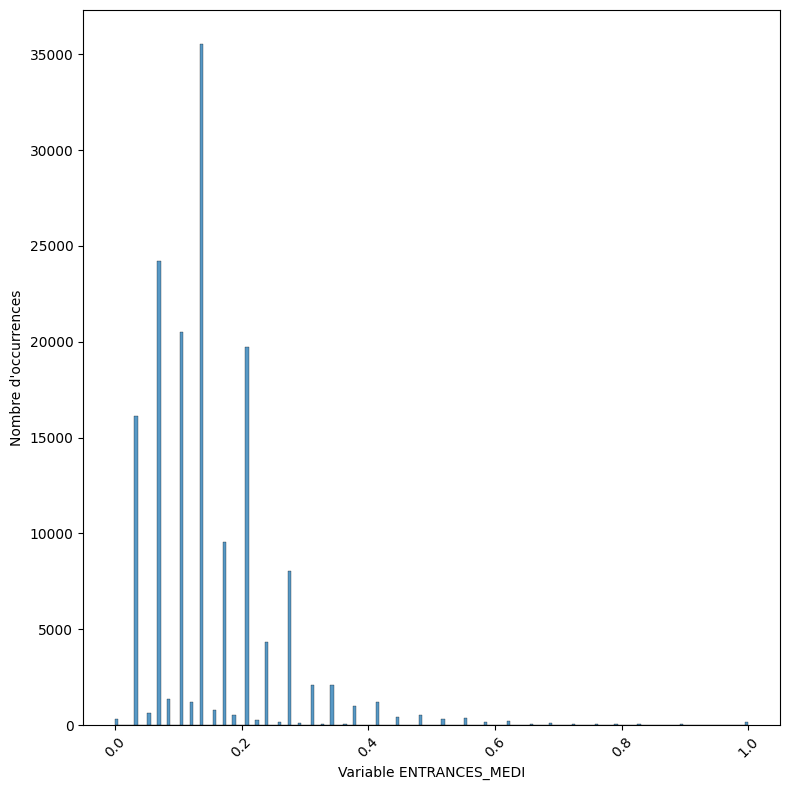

****************************************************VARIABLE FLOORSMAX_MEDI****************************************************


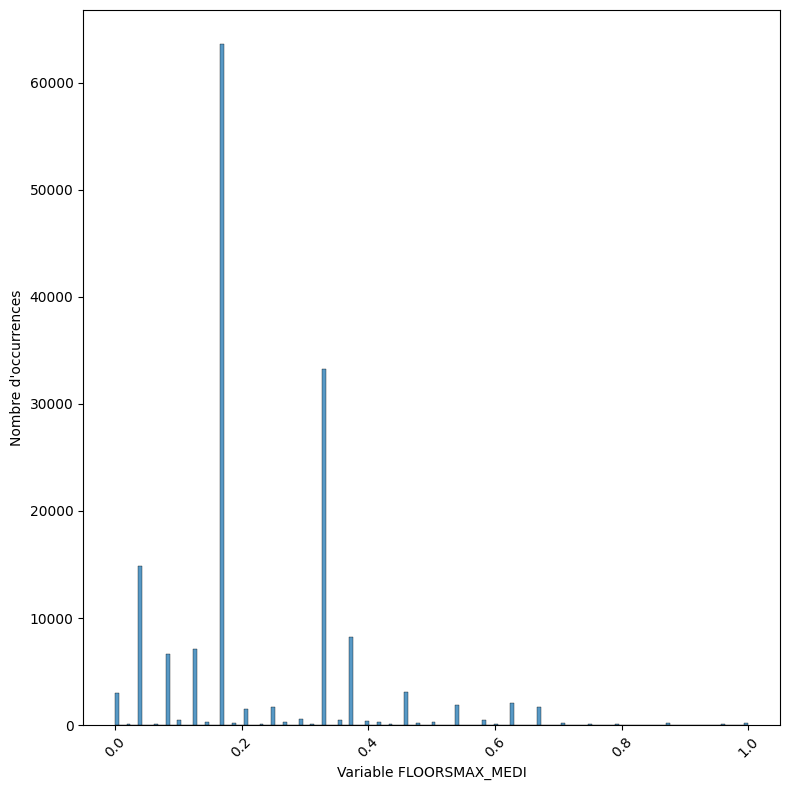

****************************************************VARIABLE FLOORSMIN_MEDI****************************************************


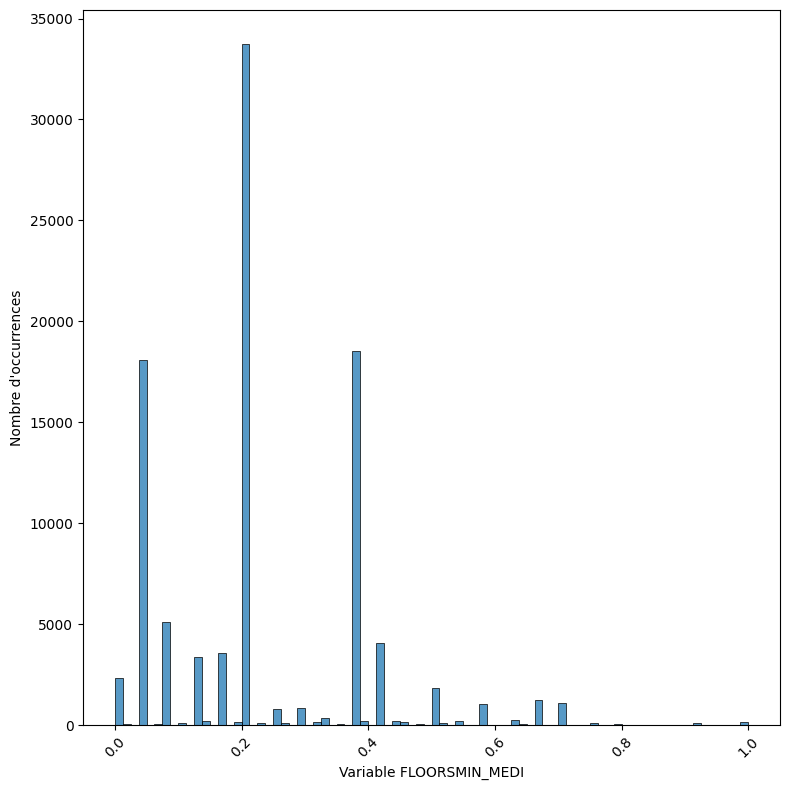

****************************************************VARIABLE LANDAREA_MEDI****************************************************


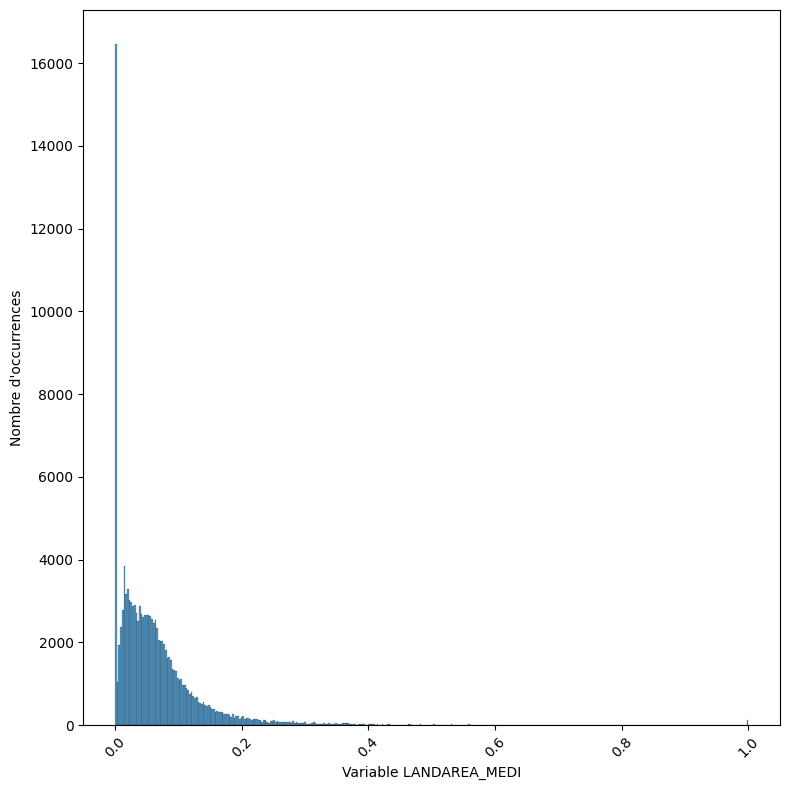

****************************************************VARIABLE LIVINGAPARTMENTS_MEDI****************************************************


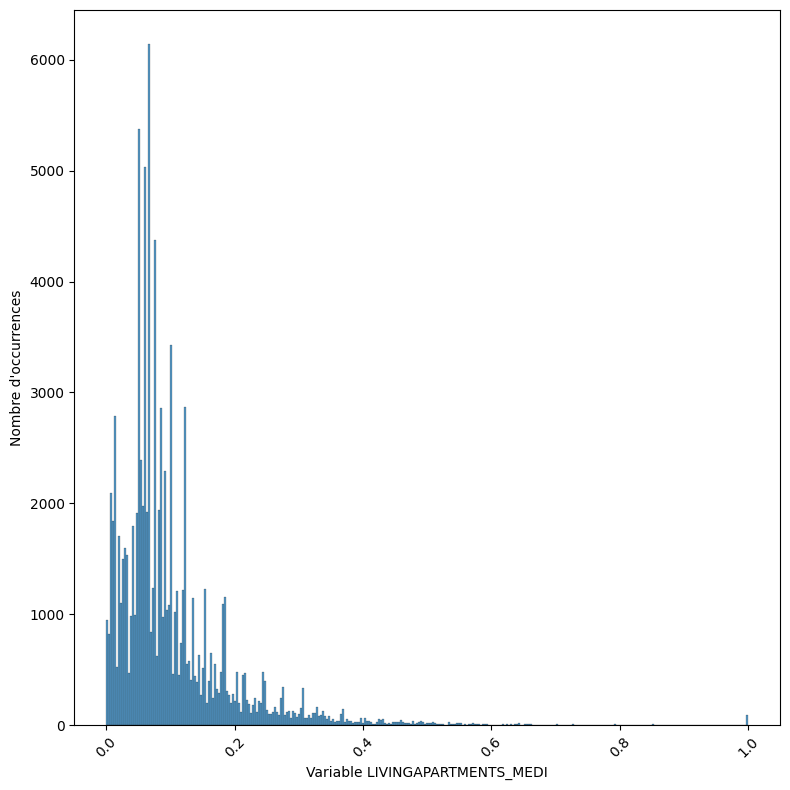

****************************************************VARIABLE LIVINGAREA_MEDI****************************************************


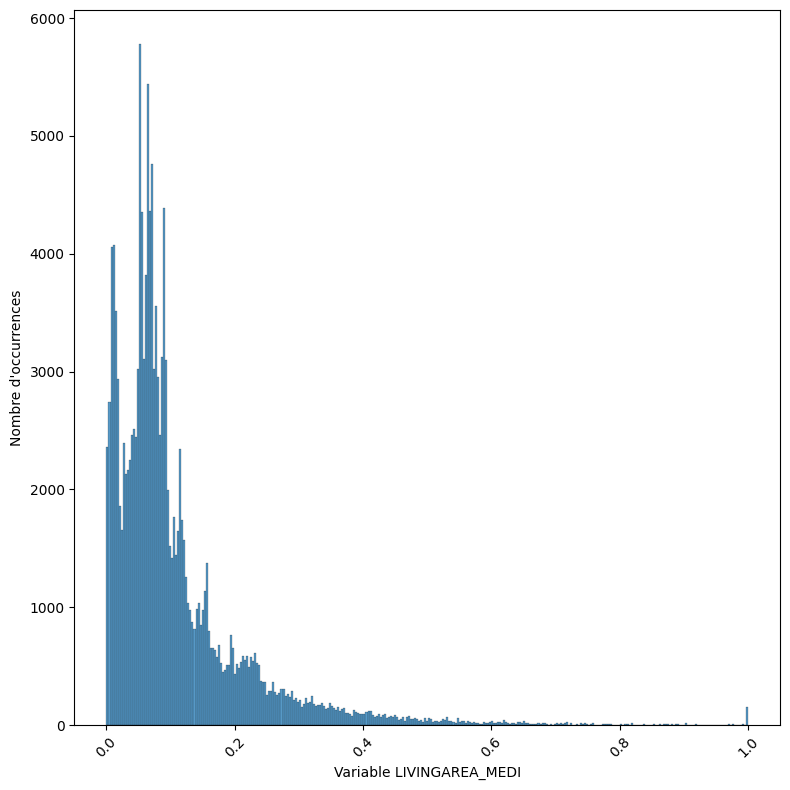

****************************************************VARIABLE NONLIVINGAPARTMENTS_MEDI****************************************************


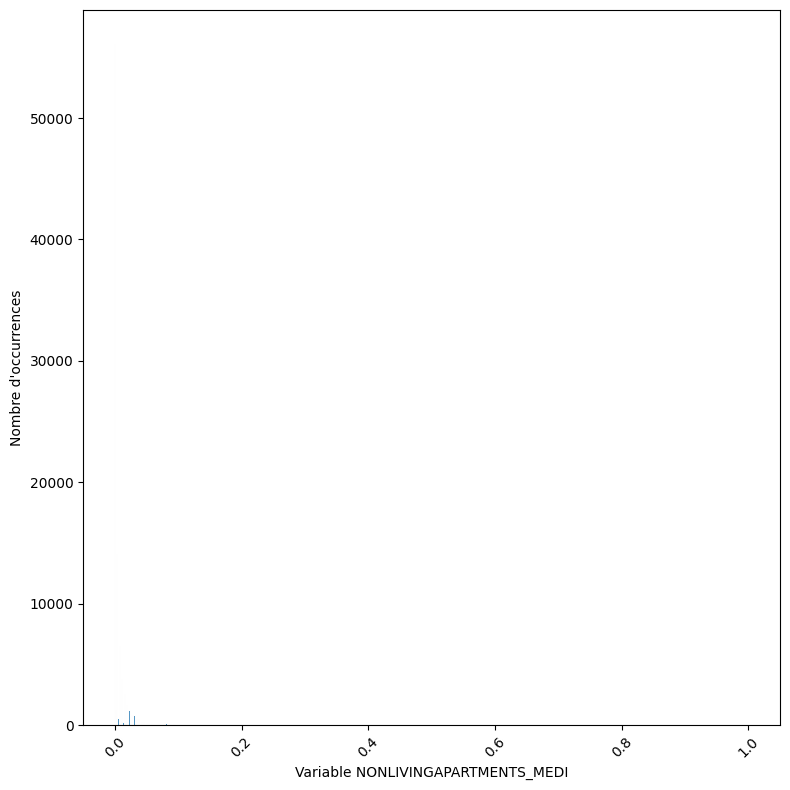

****************************************************VARIABLE NONLIVINGAREA_MEDI****************************************************


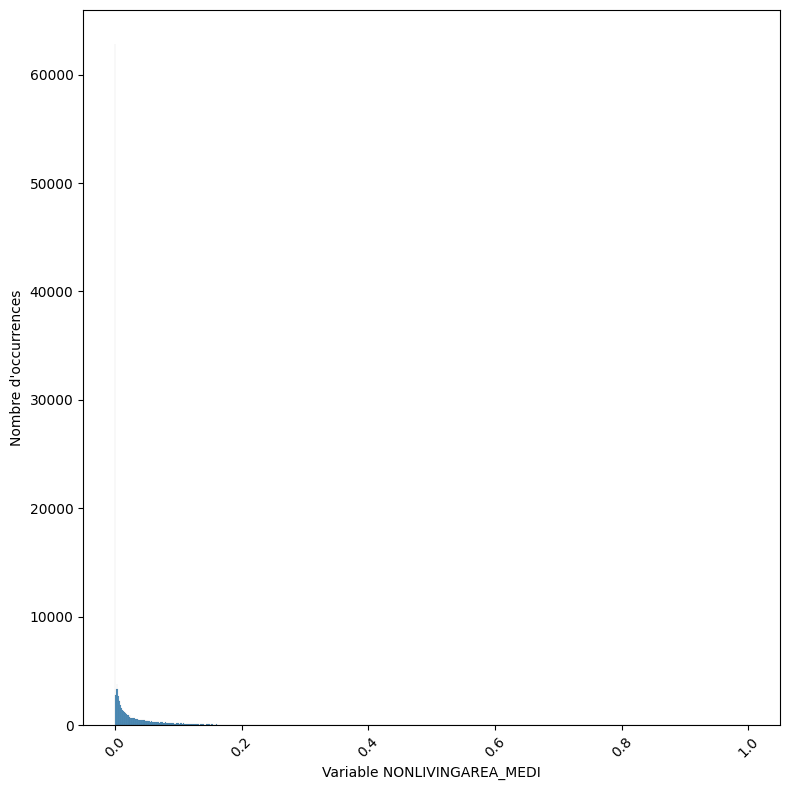

****************************************************VARIABLE TOTALAREA_MODE****************************************************


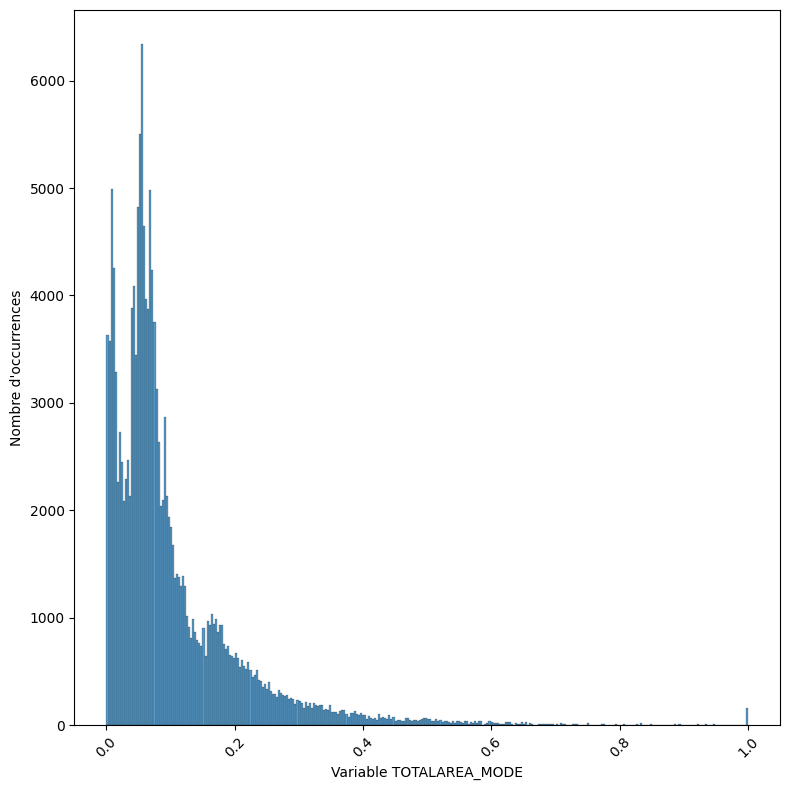

****************************************************VARIABLE OBS_30_CNT_SOCIAL_CIRCLE****************************************************


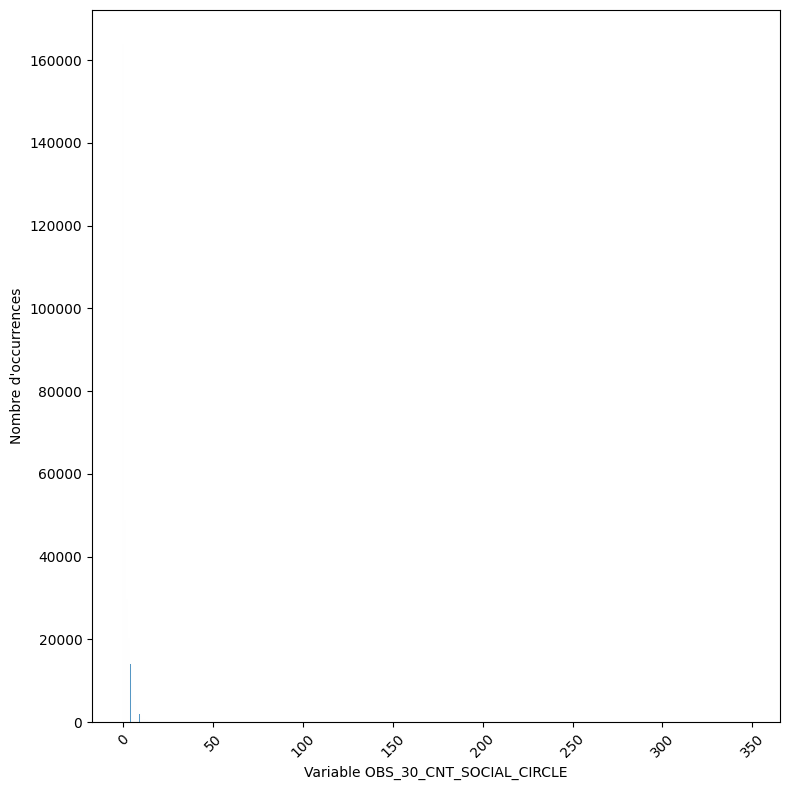

****************************************************VARIABLE DEF_30_CNT_SOCIAL_CIRCLE****************************************************


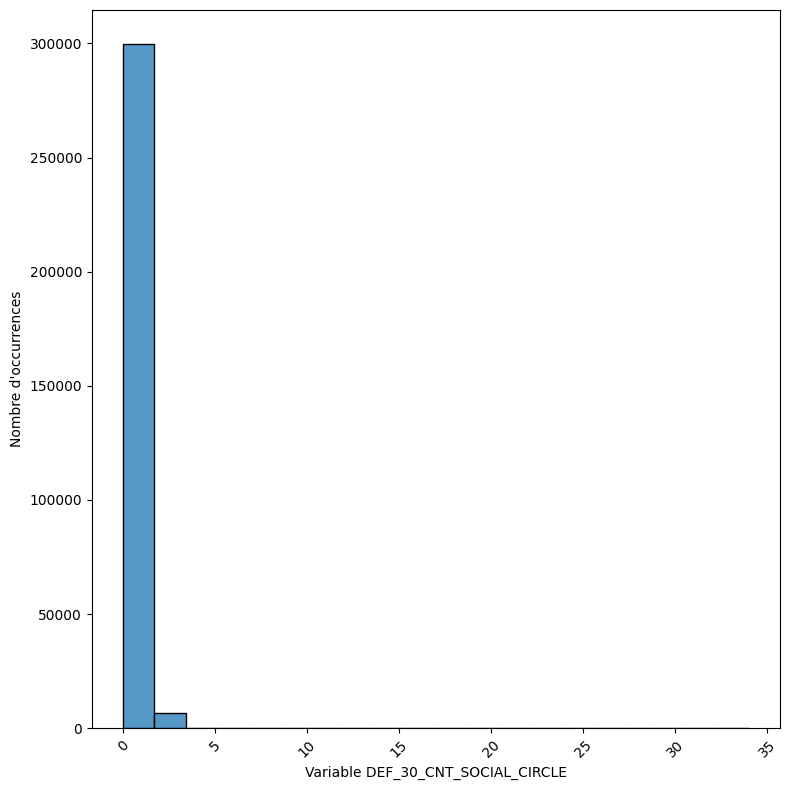

****************************************************VARIABLE OBS_60_CNT_SOCIAL_CIRCLE****************************************************


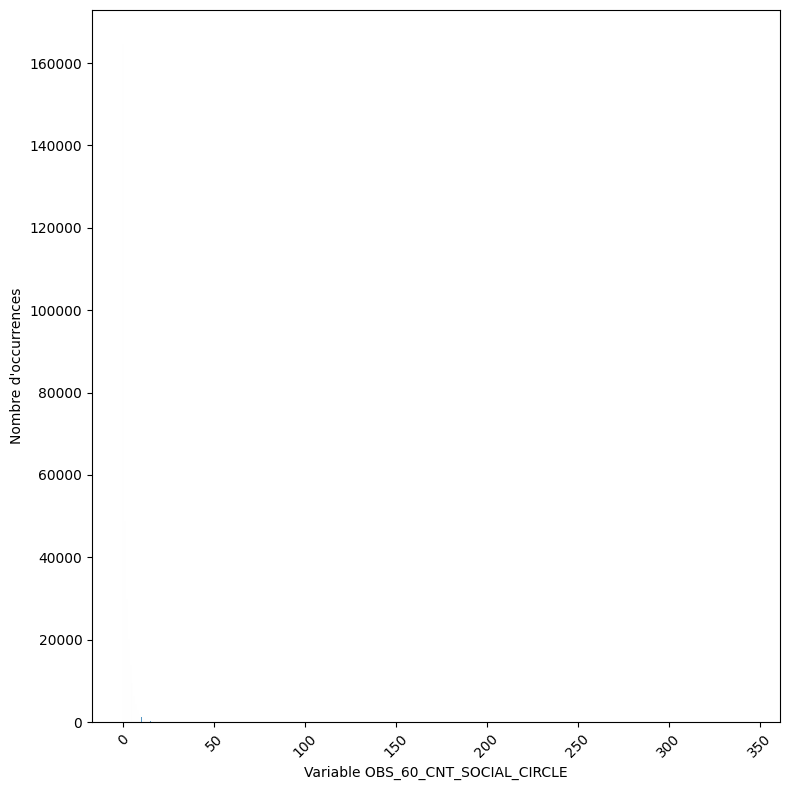

****************************************************VARIABLE DEF_60_CNT_SOCIAL_CIRCLE****************************************************


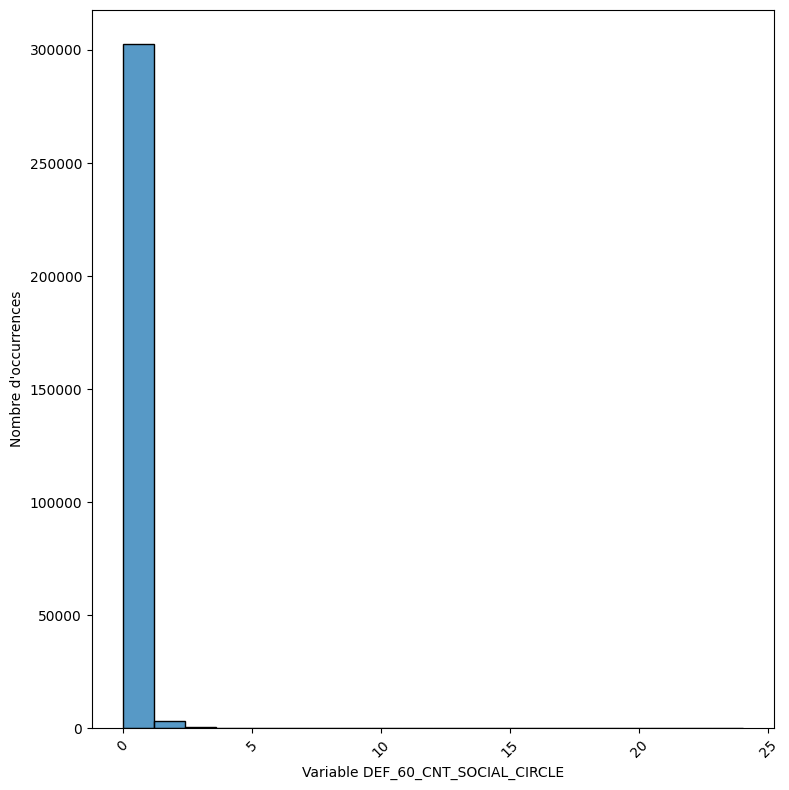

****************************************************VARIABLE DAYS_LAST_PHONE_CHANGE****************************************************


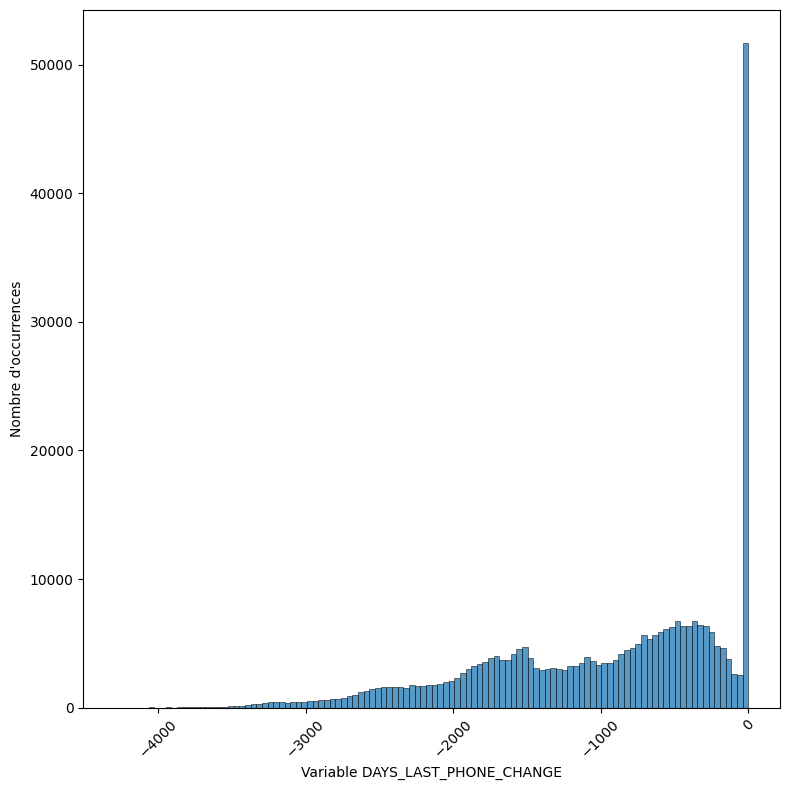

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_HOUR****************************************************


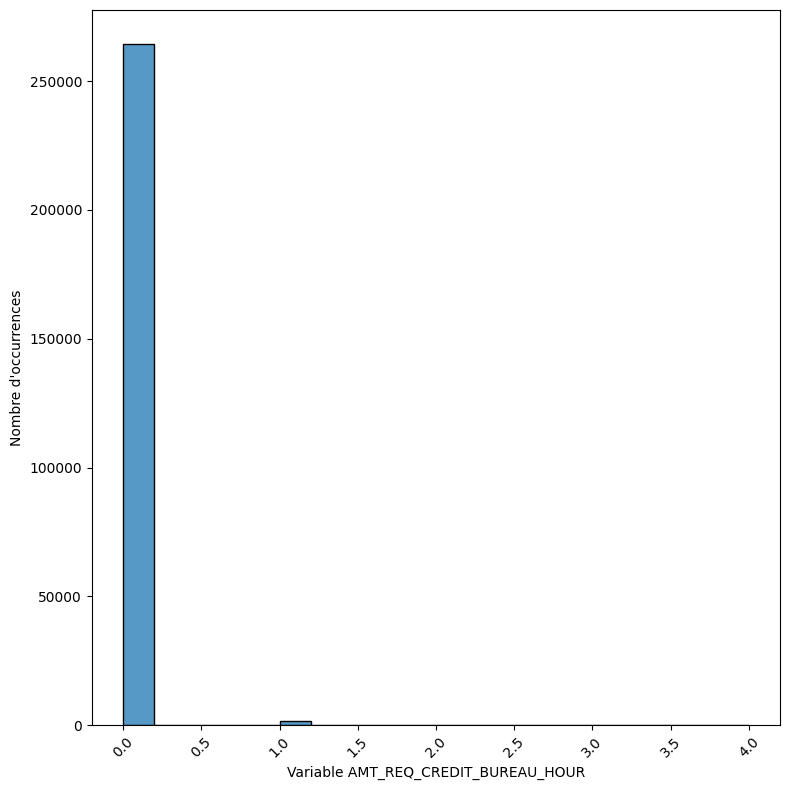

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_DAY****************************************************


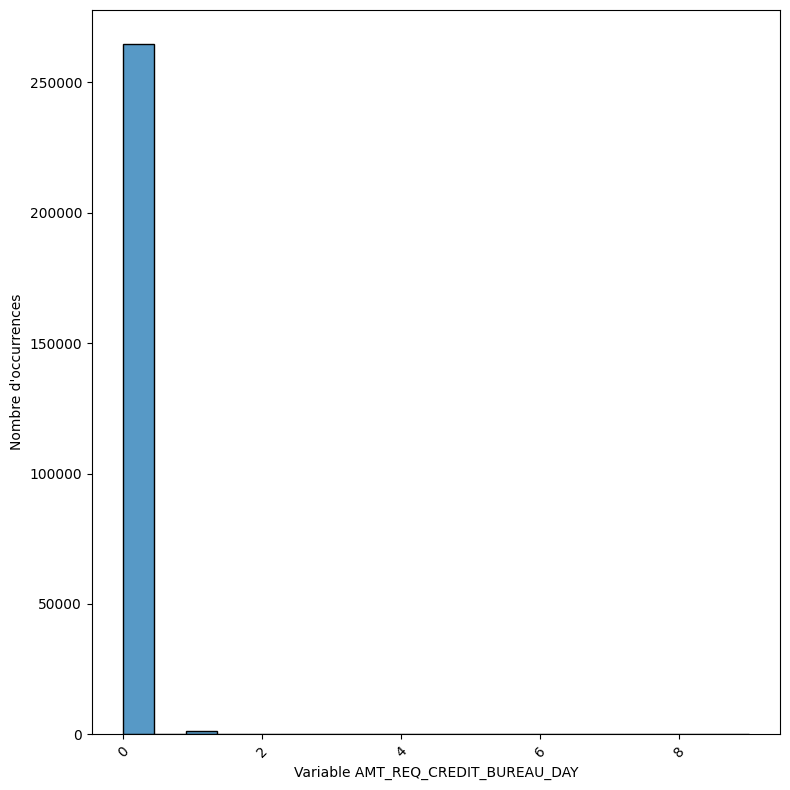

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_WEEK****************************************************


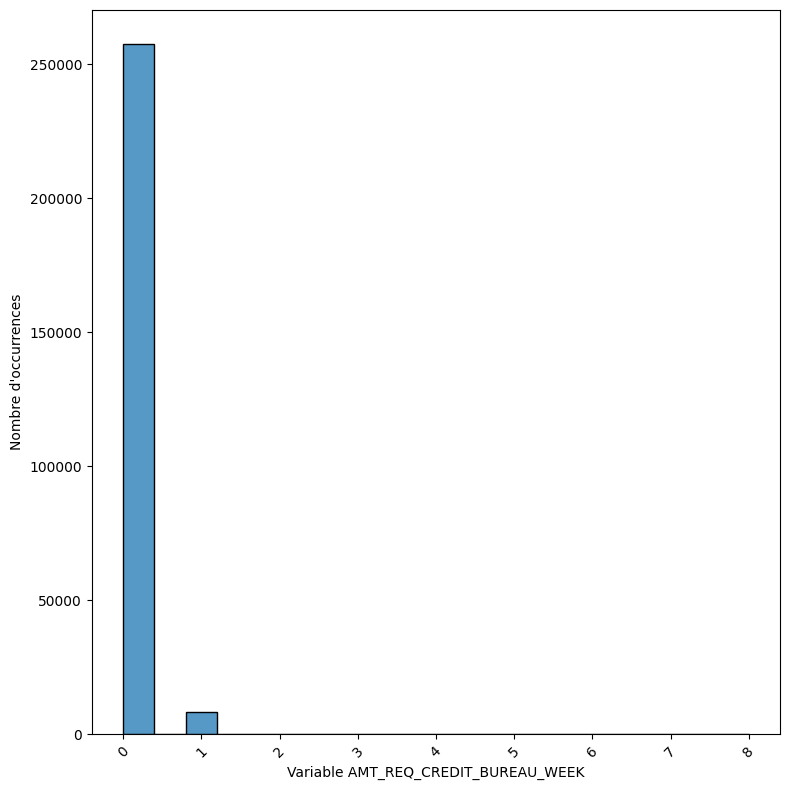

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_MON****************************************************


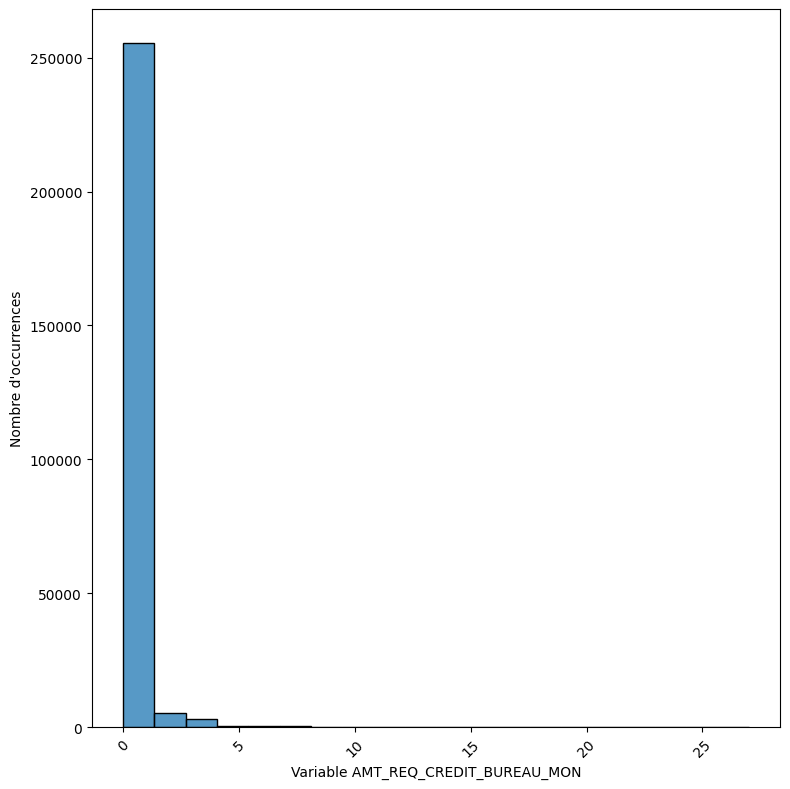

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_QRT****************************************************


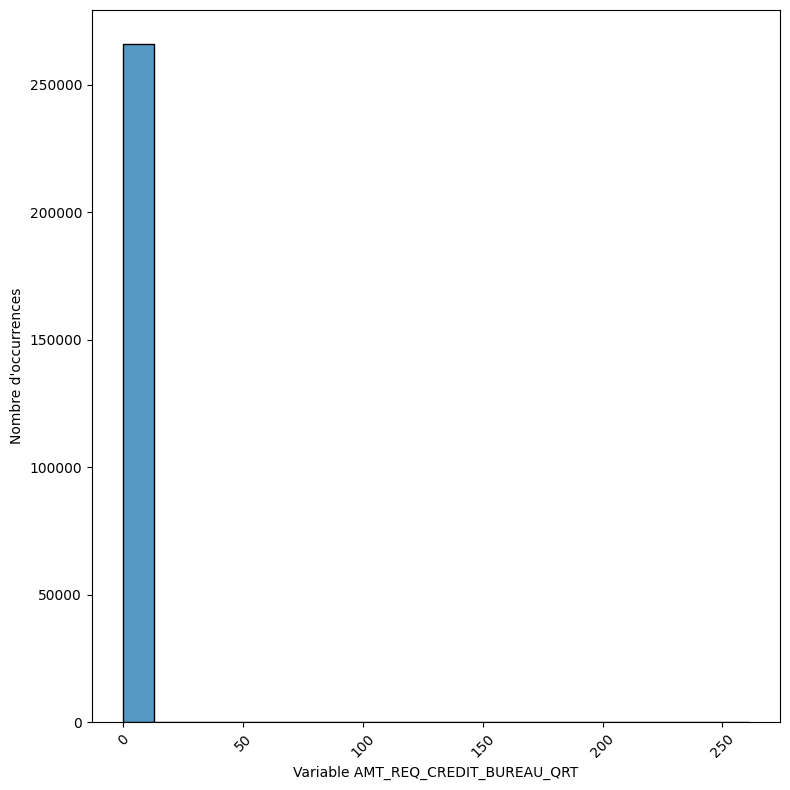

****************************************************VARIABLE AMT_REQ_CREDIT_BUREAU_YEAR****************************************************


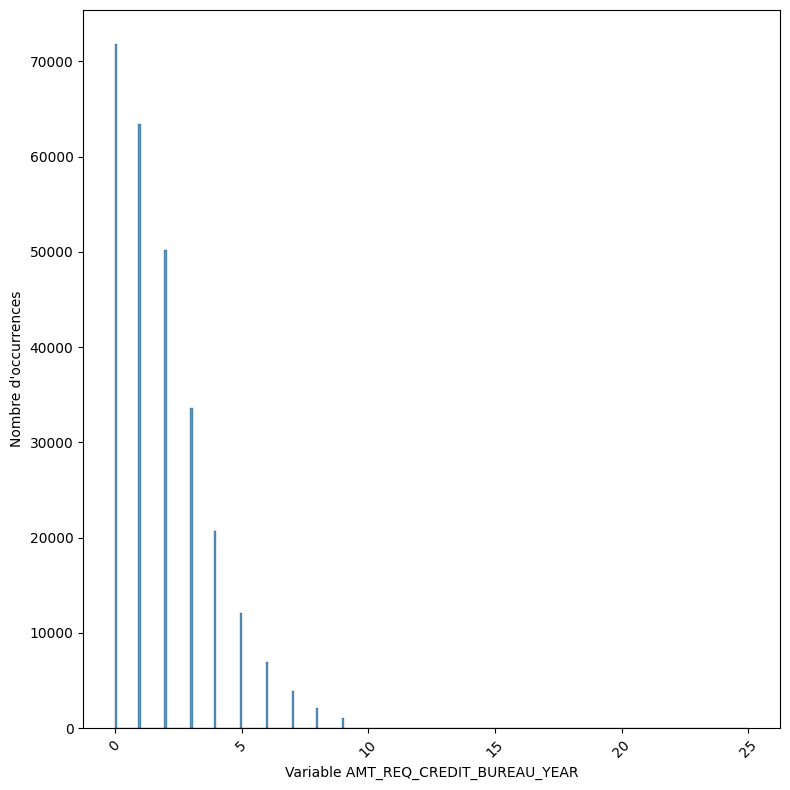

In [46]:
for col in quanti_continues.columns : 
    df_counts = None
    
    print(f"****************************************************VARIABLE {col}****************************************************")
    
    plt.figure(figsize=(8, 8))
    
    ax = sns.histplot(data=quanti_continues, x=col)
    ax.set_xlabel(f"Variable {col}")
    ax.set_ylabel("Nombre d'occurrences")
    
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

### Commentaire : <br>
-  Les variables normalisées comportent beaucoup de valeurs manquantes. On remarque aussi que les variables faisant référence à la même mesure ont des distributions quasi similaires, ce qui laisse penser que le taux de corrélation est proche de 1.<br>
-  Les variables AMT_REQ_CREDIT_BUREAU_(HOUR, DAY, WEEK, MON, QRT, YEAR) semblent avoir des valeurs essentiellement nulles

# Analyse des corrélations entre les variables

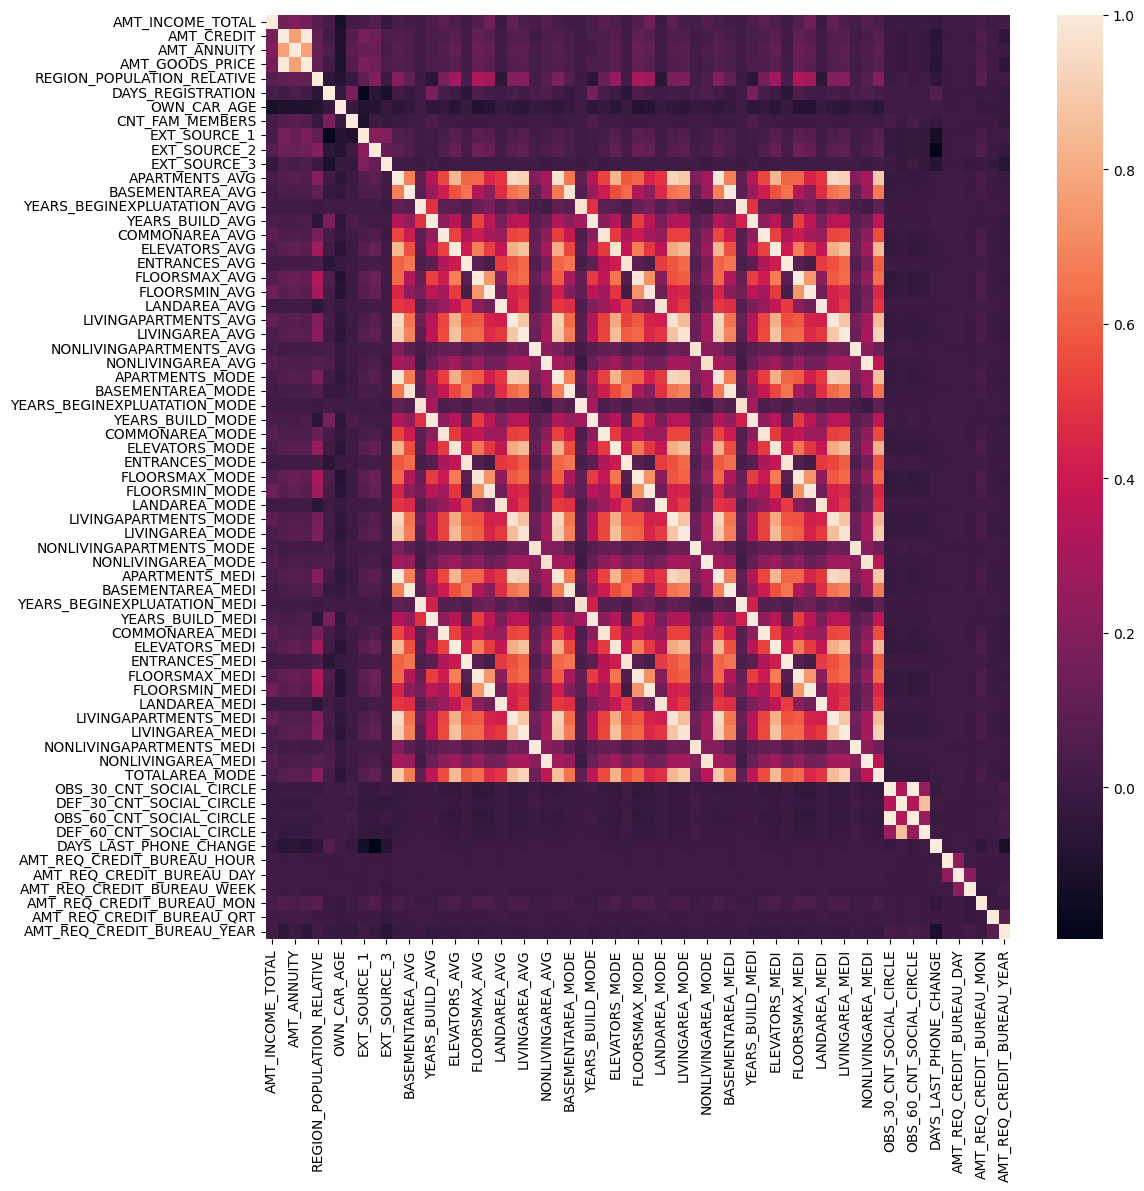

In [49]:
plt.figure(figsize=(12, 12))
sns.heatmap(quanti_continues.corr())
plt.show()

In [51]:
quanti_continues.corr().to_csv(data_path+'quanti_continues_corr.csv')

* Taux de corrélation important entre AMT_GOODS_PRICE et AMT_GOODS_PRICE (98.7%)
* Forte corrélation entre APARTMENTS_AVG et LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, APARTMENTS_MODE, LIVINGAPARTMENTS_MODE, APARTMENTS_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI
* Forte corrélation entre TOTAL_AREA_MODE et LIVINGAREA_AVG , LIVINGAREA_AVG
* Les variables OBS_60_CNT_SOCIAL_CIRCLE et OBS_30_CNT_SOCIAL_CIRCLE sont fortement corrélées (99,85%)
* Les variables faisant référence à la même mesure (AVH, MEDI, MODE) sont très correlées entre elles